In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from itertools import cycle, islice

# Data Preparation

In [2]:
starwars_filename = 'StarWars.csv'

# Column names standardized with lowercase and underscores for uniformity
starwars = pd.read_csv(starwars_filename, sep = ',', decimal = '.', skiprows=2, error_bad_lines=False, names = ['respondent_ID', 'seen_any_movies', 'consider_themselves_fan', 'seen_episode_I', 'seen_episode_II', 'seen_episode_III', 'seen_episode_IV', 'seen_episode_V', 'seen_episode_VI', 'rank_episode_I', 'rank_episode_II', 'rank_episode_III', 'rank_episode_IV', 'rank_episode_V', 'rank_episode_VI', 'affinity_han', 'affinity_luke', 'affinity_leia', 'affinity_anakin', 'affinity_obiwan', 'affinity_palpatine', 'affinity_vader', 'affinity_lando', 'affinity_bobafett', 'affinity_c3p0', 'affinity_r2d2', 'affinity_jarjar', 'affinity_padme', 'affinity_yoda', 'who_shot_first', 'expanded_universe_familiarity', 'expanded_universe_fan', 'star_trek_fan', 'gender', 'age', 'household_income', 'education', 'location'])


Filling the columns of type seen_episode_x (where x is an episode) with 'Yes' if the movie name is in that column, and 'No' if not

In [3]:
print(starwars['seen_episode_I'].value_counts())
print(starwars['seen_episode_II'].value_counts())
print(starwars['seen_episode_III'].value_counts())
print(starwars['seen_episode_IV'].value_counts())
print(starwars['seen_episode_V'].value_counts())
print(starwars['seen_episode_VI'].value_counts())


Star Wars: Episode I  The Phantom Menace    673
Name: seen_episode_I, dtype: int64
Star Wars: Episode II  Attack of the Clones    571
Name: seen_episode_II, dtype: int64
Star Wars: Episode III  Revenge of the Sith    550
Name: seen_episode_III, dtype: int64
Star Wars: Episode IV  A New Hope    607
Name: seen_episode_IV, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
Name: seen_episode_V, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
Name: seen_episode_VI, dtype: int64


In [4]:
starwars.loc[starwars['seen_episode_I'] == 'Star Wars: Episode I  The Phantom Menace', 'seen_episode_I'] = 'Yes'
starwars['seen_episode_I'] = starwars['seen_episode_I'].fillna('No')

starwars.loc[starwars['seen_episode_II'] == 'Star Wars: Episode II  Attack of the Clones', 'seen_episode_II'] = 'Yes'
starwars['seen_episode_II'] = starwars['seen_episode_II'].fillna('No')

starwars.loc[starwars['seen_episode_III'] == 'Star Wars: Episode III  Revenge of the Sith', 'seen_episode_III'] = 'Yes'
starwars['seen_episode_III'] = starwars['seen_episode_III'].fillna('No')

starwars.loc[starwars['seen_episode_IV'] == 'Star Wars: Episode IV  A New Hope', 'seen_episode_IV'] = 'Yes'
starwars['seen_episode_IV'] = starwars['seen_episode_IV'].fillna('No')

starwars.loc[starwars['seen_episode_V'] == 'Star Wars: Episode V The Empire Strikes Back', 'seen_episode_V'] = 'Yes'
starwars['seen_episode_V'] = starwars['seen_episode_V'].fillna('No')

starwars.loc[starwars['seen_episode_VI'] == 'Star Wars: Episode VI Return of the Jedi', 'seen_episode_VI'] = 'Yes'
starwars['seen_episode_VI'] = starwars['seen_episode_VI'].fillna('No')


In [5]:
print(starwars['seen_episode_I'].value_counts())
print(starwars['seen_episode_II'].value_counts())
print(starwars['seen_episode_III'].value_counts())
print(starwars['seen_episode_IV'].value_counts())
print(starwars['seen_episode_V'].value_counts())
print(starwars['seen_episode_VI'].value_counts())

Yes    673
No     513
Name: seen_episode_I, dtype: int64
No     615
Yes    571
Name: seen_episode_II, dtype: int64
No     636
Yes    550
Name: seen_episode_III, dtype: int64
Yes    607
No     579
Name: seen_episode_IV, dtype: int64
Yes    758
No     428
Name: seen_episode_V, dtype: int64
Yes    738
No     448
Name: seen_episode_VI, dtype: int64


# Data Preparation - Checking datatypes

In [6]:
# Row and column numbers are the same as the dataset
print(len(starwars))
print(len(starwars.columns))

1186
38


In [7]:
# The datatypes loaded are correct, except for the rank columns, which we will change to integers later
starwars.dtypes

respondent_ID                      int64
seen_any_movies                   object
consider_themselves_fan           object
seen_episode_I                    object
seen_episode_II                   object
seen_episode_III                  object
seen_episode_IV                   object
seen_episode_V                    object
seen_episode_VI                   object
rank_episode_I                   float64
rank_episode_II                  float64
rank_episode_III                 float64
rank_episode_IV                  float64
rank_episode_V                   float64
rank_episode_VI                  float64
affinity_han                      object
affinity_luke                     object
affinity_leia                     object
affinity_anakin                   object
affinity_obiwan                   object
affinity_palpatine                object
affinity_vader                    object
affinity_lando                    object
affinity_bobafett                 object
affinity_c3p0   

# Data Preparation - Sanitation checks for typos and incorrect values

In [8]:
# Looking over all columns and checking for typos
print("-------------------------------------------------------------------------------------------------------------------")
for column in starwars.columns:
    print(column + ": " + str(starwars[column].unique()))
    print()
print("-------------------------------------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------------------------------------
respondent_ID: [3292879998 3292879538 3292765271 ... 3288375286 3288373068 3288372923]

seen_any_movies: ['Yes' 'No' 'Yes ']

consider_themselves_fan: ['Yes' nan 'No' 'Yess' 'Noo']

seen_episode_I: ['Yes' 'No']

seen_episode_II: ['Yes' 'No']

seen_episode_III: ['Yes' 'No']

seen_episode_IV: ['Yes' 'No']

seen_episode_V: ['Yes' 'No']

seen_episode_VI: ['Yes' 'No']

rank_episode_I: [ 3. nan  1.  5.  6.  4.  2.]

rank_episode_II: [ 2. nan  6.  4.  5.  1.  3.]

rank_episode_III: [ 1. nan  3.  6.  4.  5.  2.]

rank_episode_IV: [ 4. nan  2.  6.  3.  1.  5.]

rank_episode_V: [ 5. nan  4.  1.  2.  3.  6.]

rank_episode_VI: [ 6. nan  3.  2.  1.  4.  5.]

affinity_han: ['Very favorably' nan 'Somewhat favorably'
 'Neither favorably nor unfavorably (neutral)' 'Somewhat unfavorably'
 'Unfamiliar (N/A)' 'Very unfavorably']

affinity_luke: ['Very favorably' nan 'Somewhat favorably' 'Som

Now we will correct the typos with masks

In [9]:
starwars['consider_themselves_fan'].value_counts()

Yes     551
No      283
Yess      1
Noo       1
Name: consider_themselves_fan, dtype: int64

In [10]:
starwars.loc[starwars['consider_themselves_fan'] == 'Yess', 'consider_themselves_fan'] = 'Yes'  
starwars.loc[starwars['consider_themselves_fan'] == 'Noo', 'consider_themselves_fan'] = 'No'


In [11]:
starwars['consider_themselves_fan'].value_counts()

Yes    552
No     284
Name: consider_themselves_fan, dtype: int64

In [12]:
starwars['expanded_universe_fan'].value_counts()

No      114
Yes      98
Yess      1
Name: expanded_universe_fan, dtype: int64

In [13]:
starwars.loc[starwars['expanded_universe_fan'] == 'Yess', 'expanded_universe_fan'] = 'Yes'  

In [14]:
starwars['expanded_universe_fan'].value_counts()

No     114
Yes     99
Name: expanded_universe_fan, dtype: int64

In [15]:
starwars['star_trek_fan'].value_counts()

No     639
Yes    426
yes      1
no       1
Noo      1
Name: star_trek_fan, dtype: int64

In [16]:
starwars.loc[starwars['star_trek_fan'] == 'yes', 'star_trek_fan'] = 'Yes'  
starwars.loc[starwars['star_trek_fan'] == 'Noo', 'star_trek_fan'] = 'No'
starwars.loc[starwars['star_trek_fan'] == 'no ', 'star_trek_fan'] = 'No'
starwars.loc[starwars['star_trek_fan'] == 'no', 'star_trek_fan'] = 'No'


In [17]:
starwars['star_trek_fan'].value_counts()

No     641
Yes    427
Name: star_trek_fan, dtype: int64

In [18]:
starwars['gender'].value_counts()

Female    546
Male      496
female      2
F           1
male        1
Name: gender, dtype: int64

In [19]:
starwars.loc[starwars['gender'] == 'female', 'gender'] = 'Female'
starwars.loc[starwars['gender'] == 'male', 'gender'] = 'Male'
starwars.loc[starwars['gender'] == 'F', 'gender'] = 'Female'


In [20]:
starwars['gender'].value_counts()

Female    549
Male      497
Name: gender, dtype: int64

In [21]:
starwars['age'].value_counts()

45-60    291
> 60     269
30-44    268
18-29    217
500        1
Name: age, dtype: int64

In [22]:
starwars.loc[starwars['age'] == '500', 'age'] = -1

In [23]:
starwars['age'].value_counts()

45-60    291
> 60     269
30-44    268
18-29    217
-1         1
Name: age, dtype: int64

In [24]:
starwars.columns

Index(['respondent_ID', 'seen_any_movies', 'consider_themselves_fan',
       'seen_episode_I', 'seen_episode_II', 'seen_episode_III',
       'seen_episode_IV', 'seen_episode_V', 'seen_episode_VI',
       'rank_episode_I', 'rank_episode_II', 'rank_episode_III',
       'rank_episode_IV', 'rank_episode_V', 'rank_episode_VI', 'affinity_han',
       'affinity_luke', 'affinity_leia', 'affinity_anakin', 'affinity_obiwan',
       'affinity_palpatine', 'affinity_vader', 'affinity_lando',
       'affinity_bobafett', 'affinity_c3p0', 'affinity_r2d2',
       'affinity_jarjar', 'affinity_padme', 'affinity_yoda', 'who_shot_first',
       'expanded_universe_familiarity', 'expanded_universe_fan',
       'star_trek_fan', 'gender', 'age', 'household_income', 'education',
       'location'],
      dtype='object')

# Data Preparation - Converting string values to uppercase and stripping extra whitespaces

In [25]:
for column in starwars.columns:
    try:
        starwars[column] = starwars[column].str.strip()
        starwars[column] = starwars[column].str.upper()
    except:
        print(column + " is not a string-value column")
    
    print(column + ": " + str(starwars[column].unique()))
    print()
    print('---------------------------------------------------------------------------------------')

respondent_ID is not a string-value column
respondent_ID: [3292879998 3292879538 3292765271 ... 3288375286 3288373068 3288372923]

---------------------------------------------------------------------------------------
seen_any_movies: ['YES' 'NO']

---------------------------------------------------------------------------------------
consider_themselves_fan: ['YES' nan 'NO']

---------------------------------------------------------------------------------------
seen_episode_I: ['YES' 'NO']

---------------------------------------------------------------------------------------
seen_episode_II: ['YES' 'NO']

---------------------------------------------------------------------------------------
seen_episode_III: ['YES' 'NO']

---------------------------------------------------------------------------------------
seen_episode_IV: ['YES' 'NO']

---------------------------------------------------------------------------------------
seen_episode_V: ['YES' 'NO']

-------------------------

# Data Preparation - Dealing with missing values

- Didn't use dropna() because we don't want to drop the entire row, some columns may still have useful data
- Putting a -1 allows us to easily identify occurences of missing values in each column via indexing with boolean conditions
- Column-wise mean doesn't work for most columns as most columns aren't numeric, and the ones that are represent ordinal data
- Column-wise median could be used, but doesn't necessarily reflect the truth accurately in this case, because some columns are interdependent. 
    For example, it doesn't make sense to fill the column rank_episode_I with the median value because there might be people who may not have seen_episode_I. 
    Also we don't want to assume values for people, that defeats the purpose of exploring the data


In [26]:
starwars = starwars.fillna(-1)

# Data Preparation - Converting columns' datatype to integer

In [27]:
starwars = starwars.astype({"rank_episode_I": int, "rank_episode_II": int, "rank_episode_III": int, "rank_episode_IV": int, "rank_episode_V": int ,"rank_episode_VI": int})


In [28]:
starwars['affinity_luke'].value_counts()

VERY FAVORABLY                                 552
-1                                             355
SOMEWHAT FAVORABLY                             219
NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)     38
SOMEWHAT UNFAVORABLY                            13
UNFAMILIAR (N/A)                                 6
VERY UNFAVORABLY                                 3
Name: affinity_luke, dtype: int64

In [29]:
# Note - not converting NaN values in character_affinity columns to UNFAMILAR (N/A), even though it may seem logical because it is interesting to know people who have watched the movies, and yet can remember/not remember certain characters
starwars

respondent_ID seen_any_movies consider_themselves_fan seen_episode_I  \
0        3292879998             YES                     YES            YES   
1        3292879538              NO                      -1             NO   
2        3292765271             YES                      NO            YES   
3        3292763116             YES                     YES            YES   
4        3292731220             YES                     YES            YES   
...             ...             ...                     ...            ...   
1181     3288388730             YES                     YES            YES   
1182     3288378779             YES                     YES            YES   
1183     3288375286              NO                      -1             NO   
1184     3288373068             YES                     YES            YES   
1185     3288372923             YES                      NO            YES   

     seen_episode_II seen_episode_III seen_episode_IV seen_episode_V  \
0                YES              YES             YES            YES   
1                 NO               NO              NO             NO   
2                YES              YES              NO             NO   
3                YES              YES             YES            YES   
4                YES              YES             YES            YES   
...              ...              ...             ...            ...   
1181             YES              YES             YES            YES   
1182             YES              YES             YES            YES   
1183              NO               NO              NO             NO   
1184             YES              YES             YES            YES   
1185             YES               NO              NO            YES   

     seen_episode_VI  rank_episode_I  ...       affinity_yoda  \
0                YES               3  ...      VERY FAVORABLY   
1                 NO              -1  ...                  -1   
2                 NO               1  ...    UNFAMILIAR (N/A)   
3                YES               5  ...      VERY FAVORABLY   
4                YES               5  ...  SOMEWHAT FAVORABLY   
...              ...             ...  ...                 ...   
1181             YES               5  ...      VERY FAVORABLY   
1182             YES               4  ...      VERY FAVORABLY   
1183              NO              -1  ...                  -1   
1184             YES               4  ...      VERY FAVORABLY   
1185             YES               6  ...    VERY UNFAVORABLY   

                        who_shot_first  expanded_universe_familiarity  \
0     I DON'T UNDERSTAND THIS QUESTION                            YES   
1                                   -1                             -1   
2     I DON'T UNDERSTAND THIS QUESTION                             NO   
3     I DON'T UNDERSTAND THIS QUESTION                             NO   
4                               GREEDO                            YES   
...                                ...                            ...   
1181                               HAN                             NO   
1182  I DON'T UNDERSTAND THIS QUESTION                             NO   
1183                                -1                             -1   
1184                               HAN                             NO   
1185  I DON'T UNDERSTAND THIS QUESTION                             NO   

      expanded_universe_fan  star_trek_fan  gender    age  \
0                        NO             NO    MALE  18-29   
1                        -1            YES    MALE  18-29   
2                        -1             NO    MALE  18-29   
3                        -1            YES    MALE  18-29   
4                        NO             NO    MALE  18-29   
...                     ...            ...     ...    ...   
1181                     -1            YES  FEMALE  18-29   
1182                     -1            YES  FEMALE  30-44 

# Data Exploration - How people rank Star Wars movies

People who have not seen episode I, yet have ranked it. This is something that happens for each episode, therefore we will ignore these rows when comparing how people rank the movies

In [30]:
starwars[['seen_episode_I','rank_episode_I']][starwars['seen_episode_I']=='NO'][starwars['rank_episode_I']!=-1]

C:\Users\nishq\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


seen_episode_I  rank_episode_I
9                NO               1
16               NO               4
33               NO               6
61               NO               1
76               NO               3
...             ...             ...
1155             NO               4
1158             NO               2
1163             NO               5
1172             NO               2
1179             NO               3

[162 rows x 2 columns]

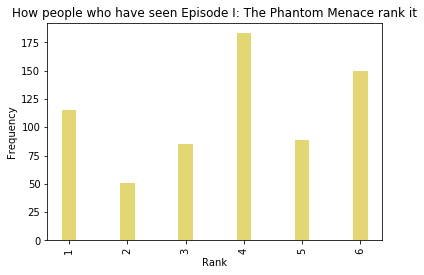

In [31]:
# Histogram of people who have seen episode I, and how they rank it 
starwars['rank_episode_I'][starwars['seen_episode_I']=='YES'][starwars['rank_episode_I'] != -1].value_counts().sort_index().plot(kind='bar', color=(0.886, 0.843, 0.450),  width=0.25)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('How people who have seen Episode I: The Phantom Menace rank it')
plt.show()

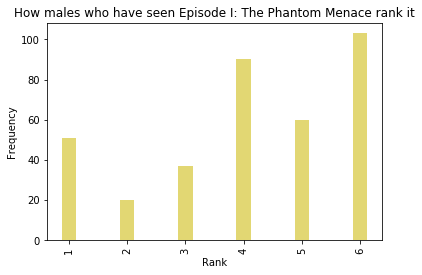

In [32]:
# Histogram of males who have seen episode I, and how they rank it 
starwars['rank_episode_I'][starwars['seen_episode_I']=='YES'][starwars['rank_episode_I'] != -1][starwars['gender']=='MALE'].value_counts().sort_index().plot(kind='bar', color=(0.886, 0.843, 0.450),  width=0.25)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('How males who have seen Episode I: The Phantom Menace rank it')
plt.show()

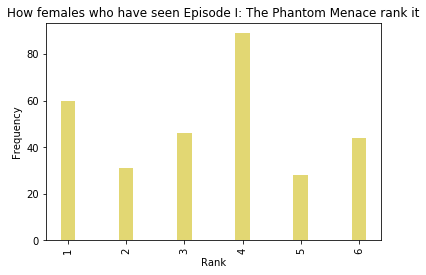

In [33]:
# Histogram of females who have seen star wars episode I, and how they rank it 
starwars['rank_episode_I'][starwars['seen_episode_I']=='YES'][starwars['rank_episode_I'] != -1][starwars['gender']=='FEMALE'].value_counts().sort_index().plot(kind='bar', color=(0.886, 0.843, 0.450),  width=0.25)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('How females who have seen Episode I: The Phantom Menace rank it')
plt.show()

While the last 2 graphs are effective, they don't allow us to directly compare each segment within each different demographic, Therefore, we can also use the the mean from the rankings, and while the rankings don't necessarily correspond to an exact score, since it's comparative to each other movie, the mean segmented by the different demographics gives an interesting insight

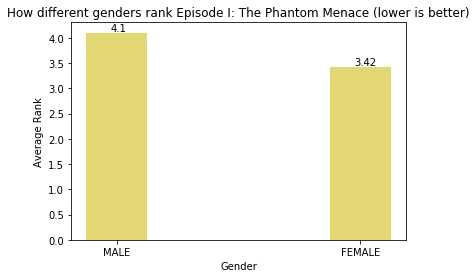

In [34]:
male_episode_I_rank = starwars['rank_episode_I'][starwars['seen_episode_I']=='YES'][starwars['rank_episode_I'] != -1][starwars['gender']=='MALE'].mean()
female_episode_I_rank = starwars['rank_episode_I'][starwars['seen_episode_I']=='YES'][starwars['rank_episode_I'] != -1][starwars['gender']=='FEMALE'].mean()
rate = [male_episode_I_rank, female_episode_I_rank]
plt.bar(list(range(2)), rate, color=(0.886, 0.843, 0.450), width = 0.25)
plt.xticks(list(range(2)), ['MALE', 'FEMALE'])
plt.xlabel('Gender')
plt.ylabel('Average Rank')
plt.title('How different genders rank Episode I: The Phantom Menace (lower is better)')

for index, value in enumerate(rate):
    plt.text(index-0.025, value+0.025, str(round(value,2)))

We can now take the idea from above, and loop through each episode, demographic and each unique segment

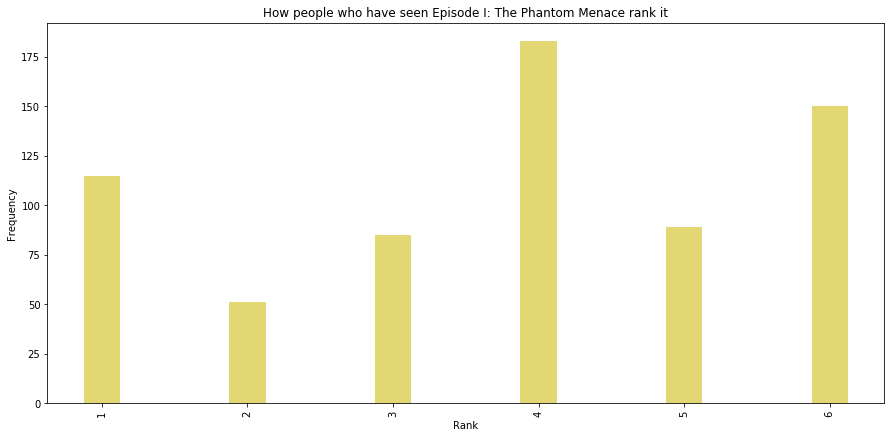

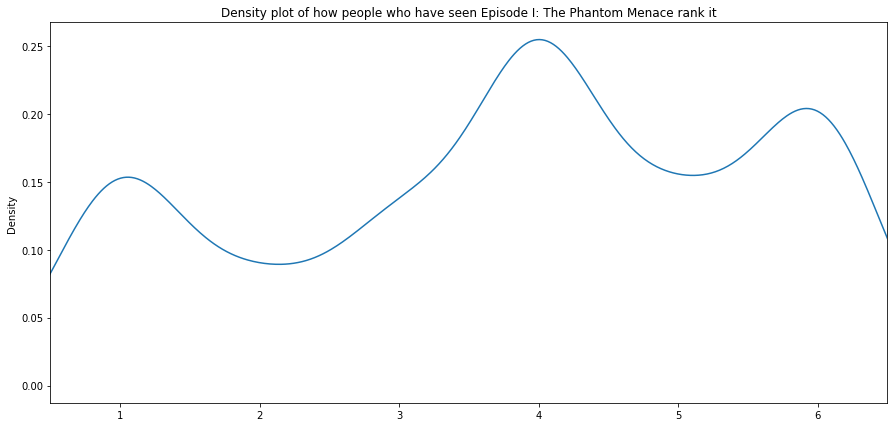

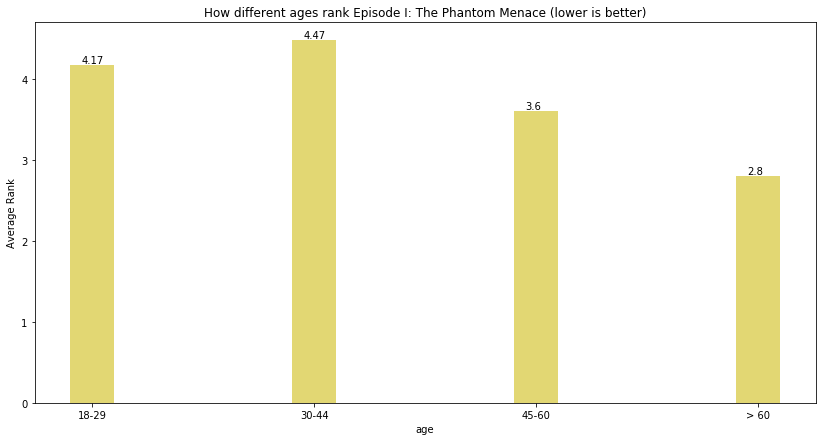

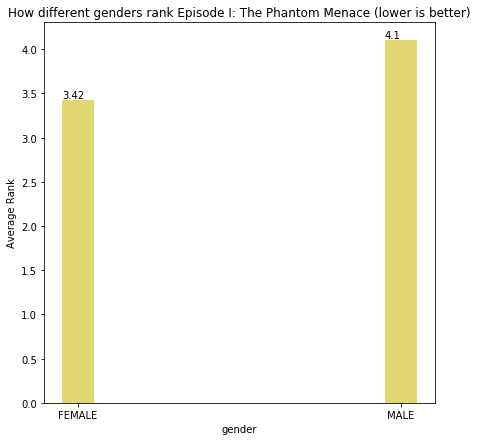

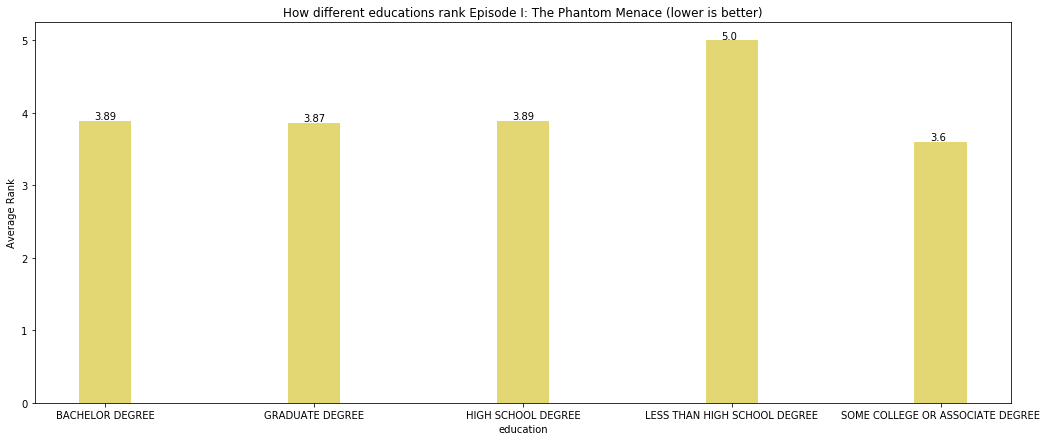

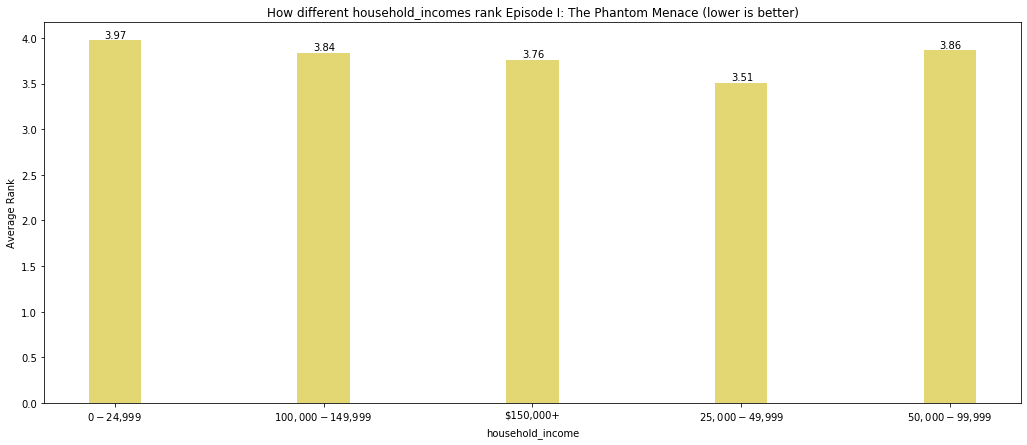

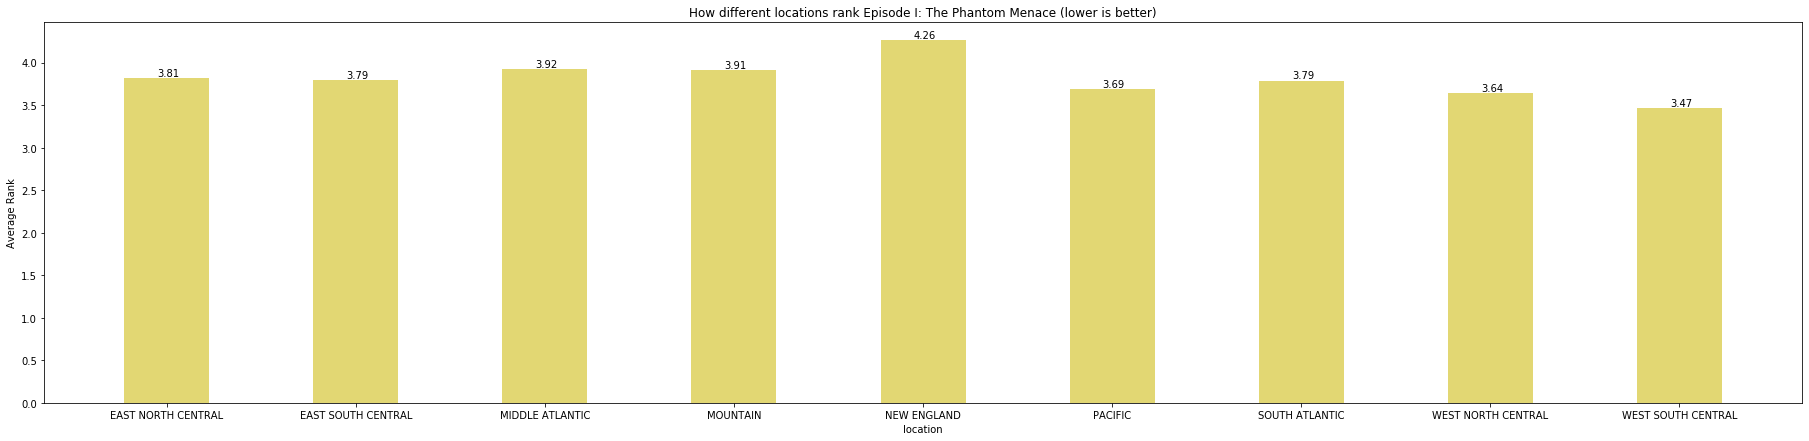

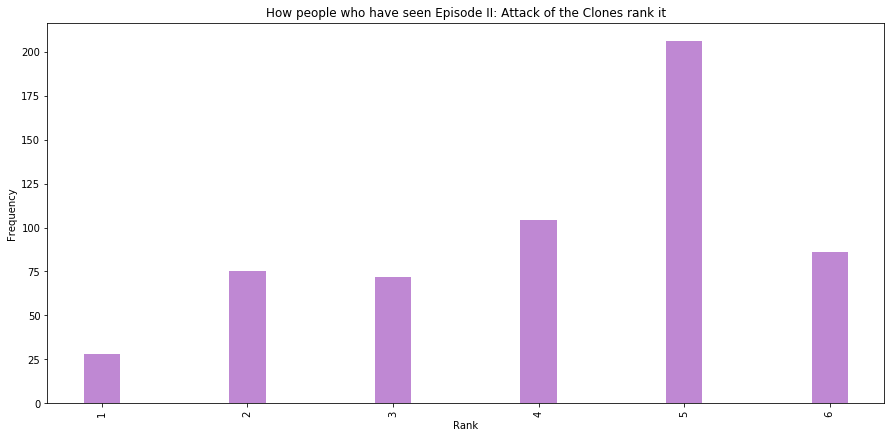

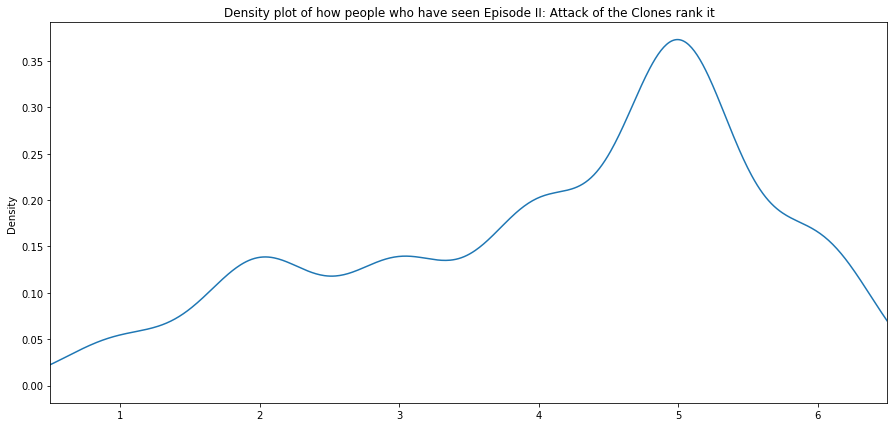

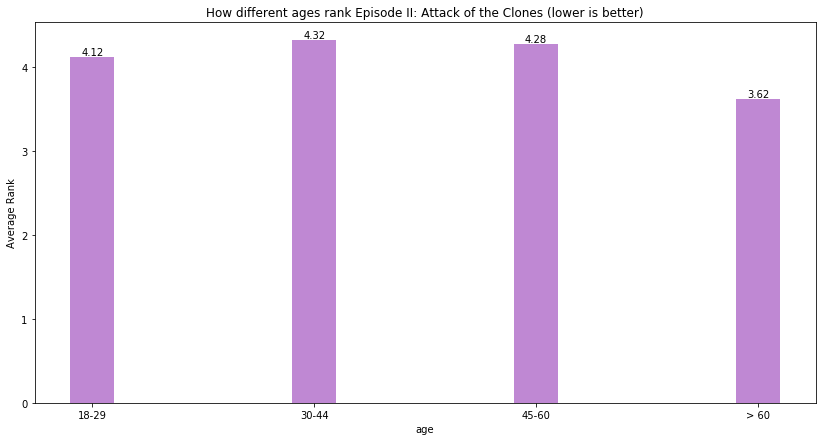

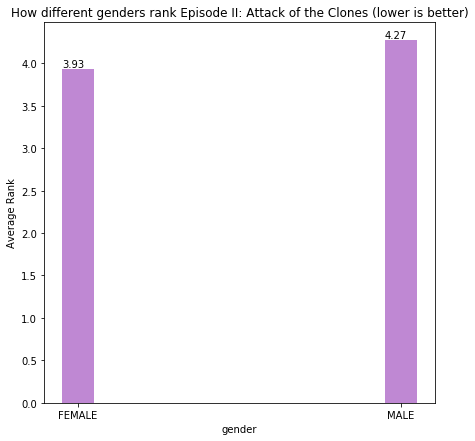

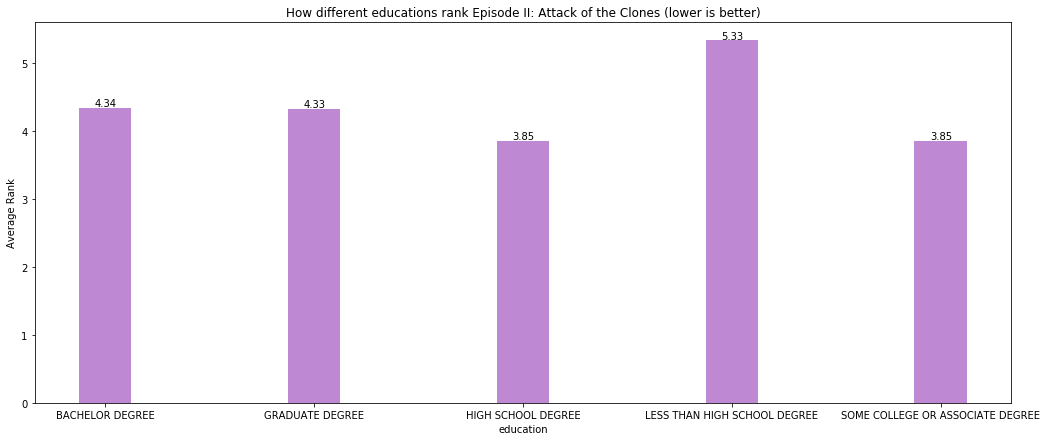

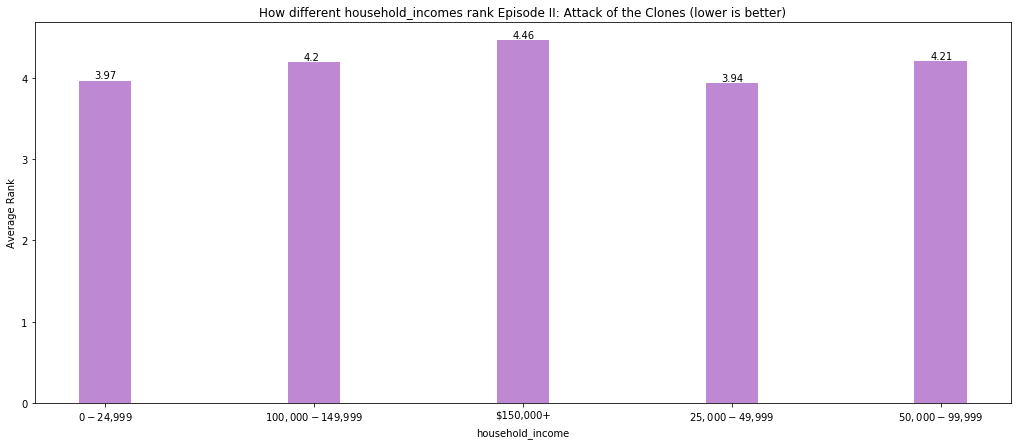

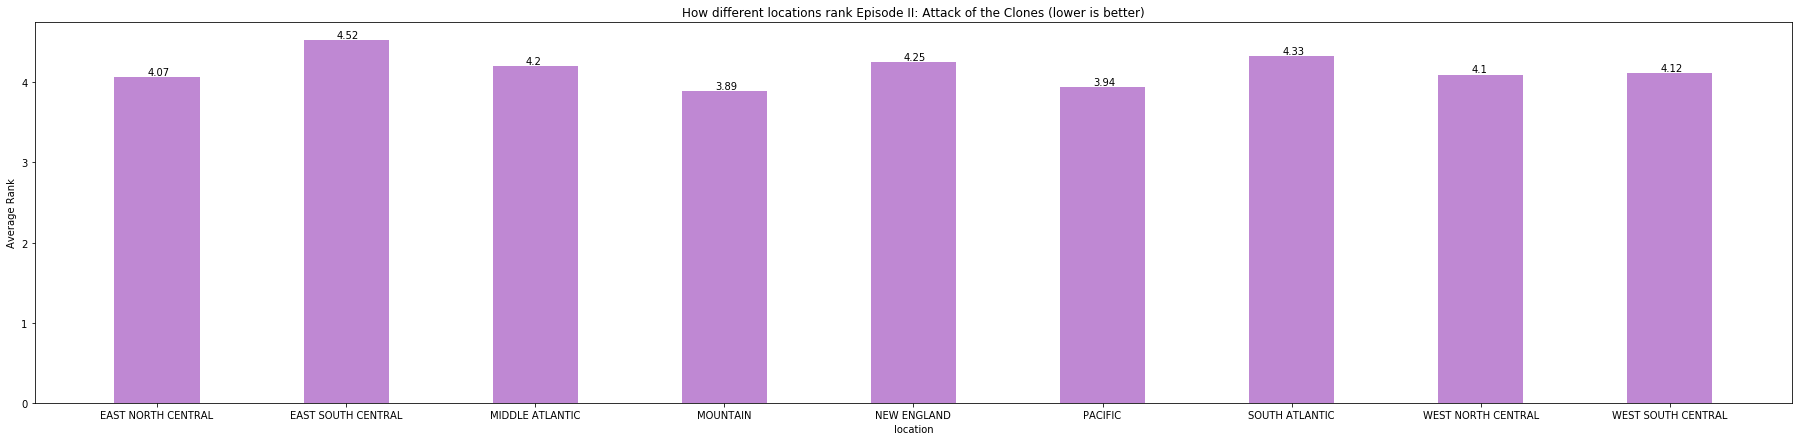

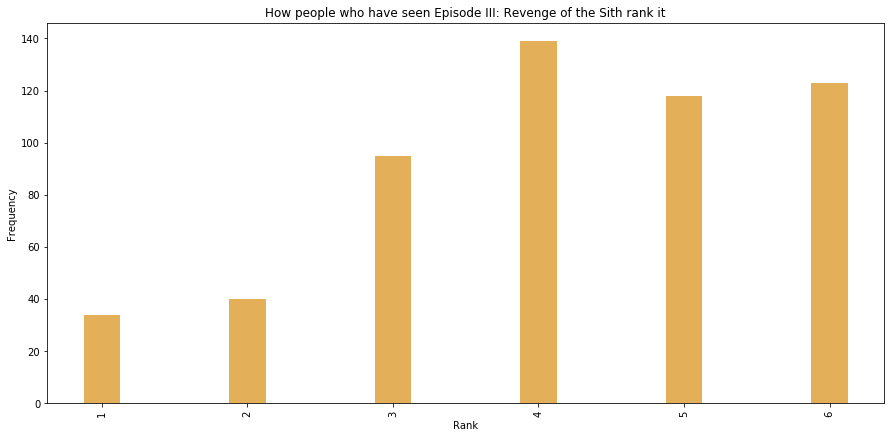

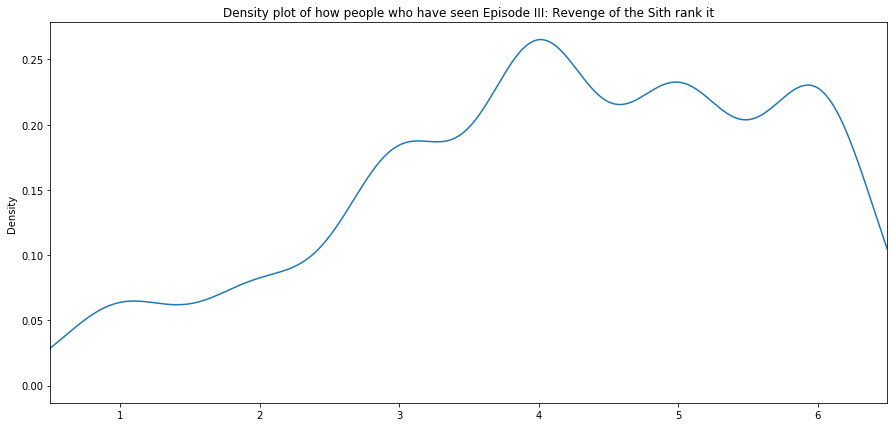

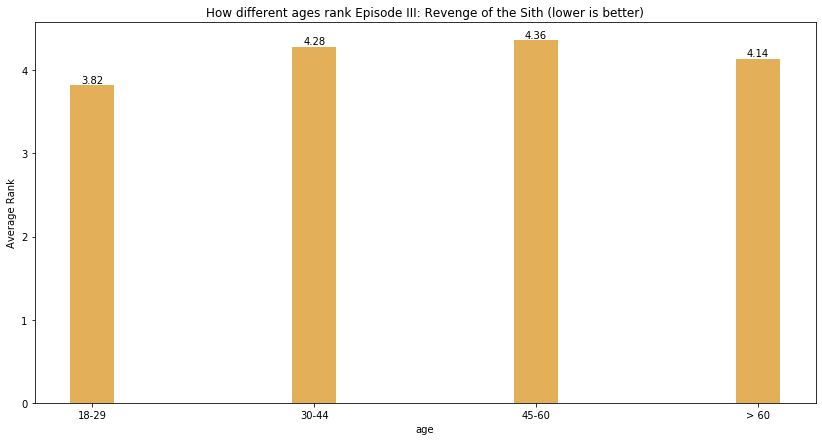

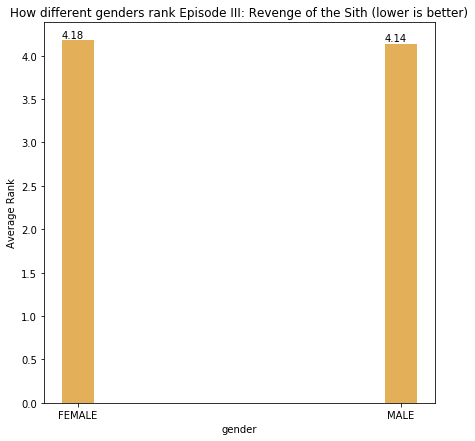

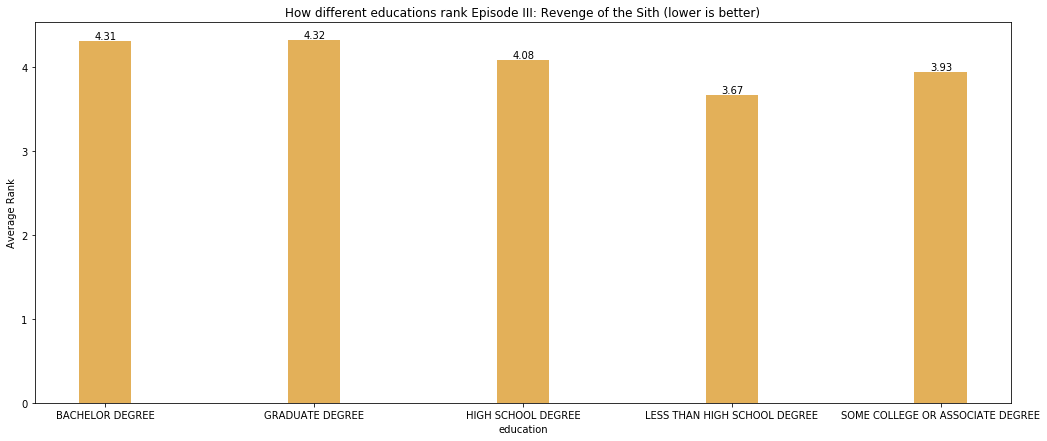

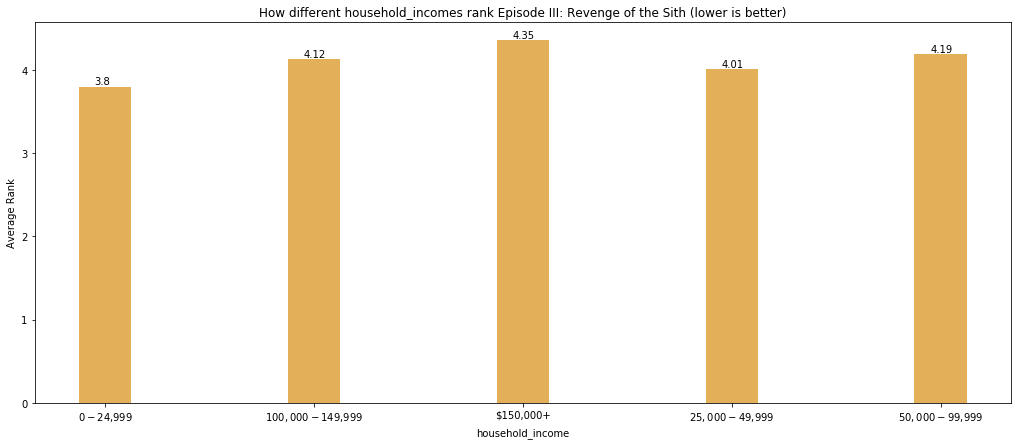

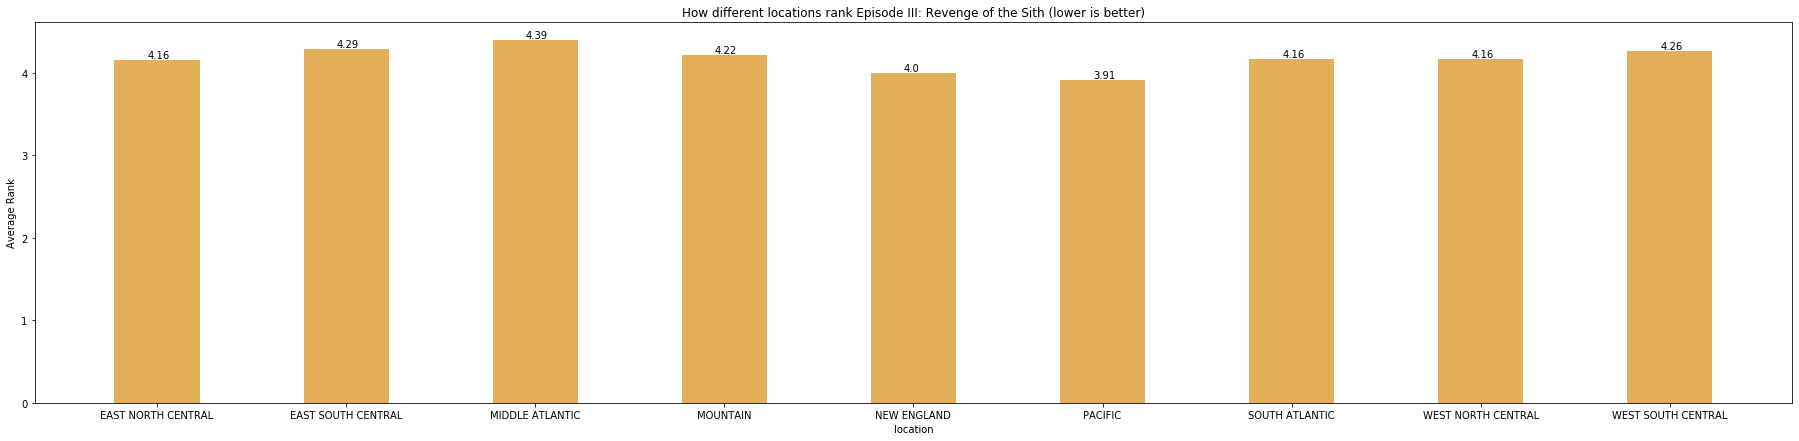

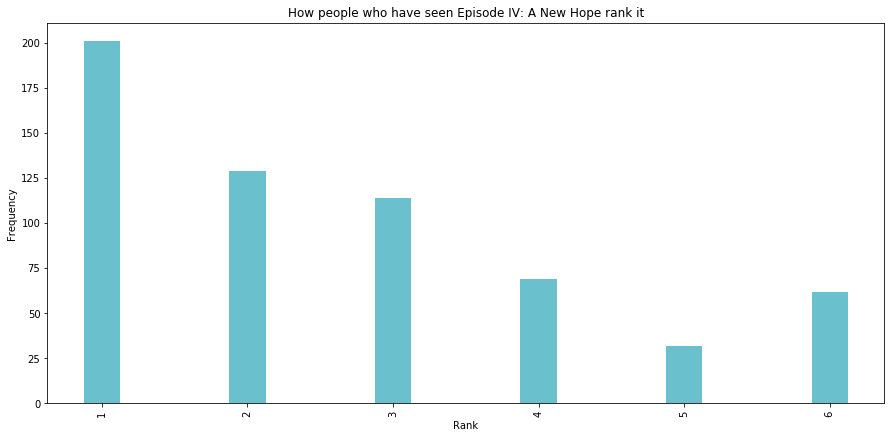

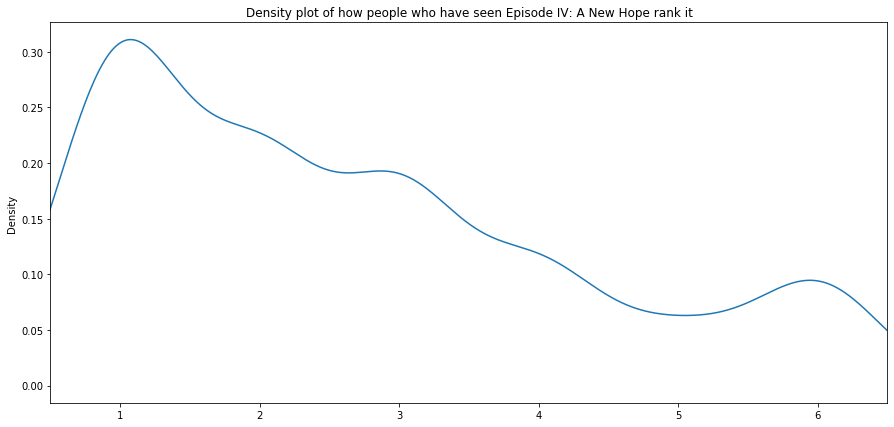

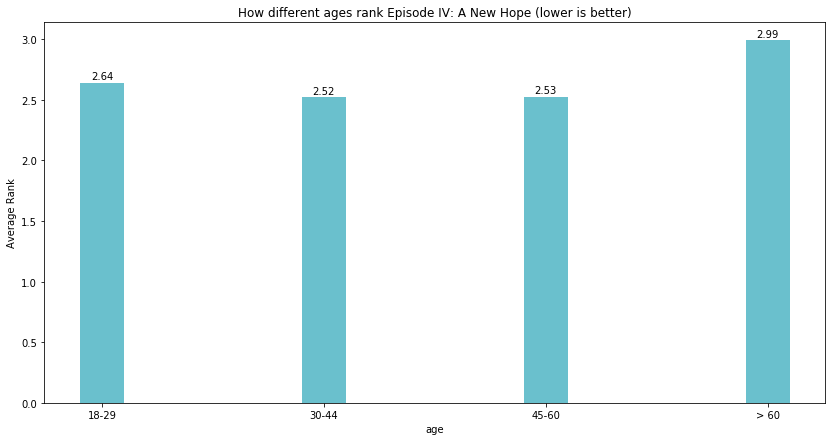

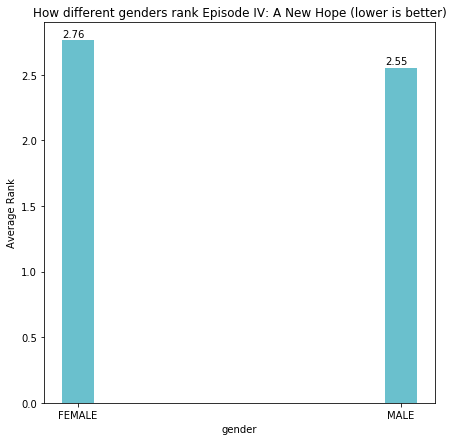

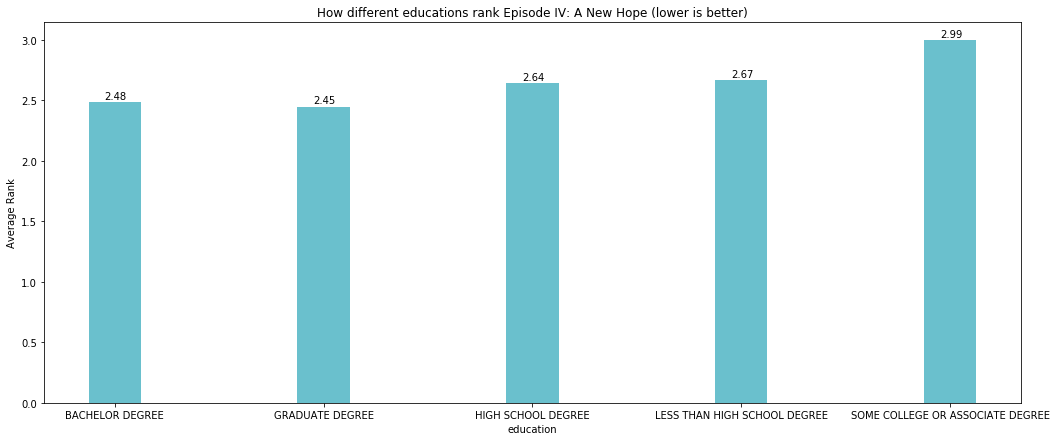

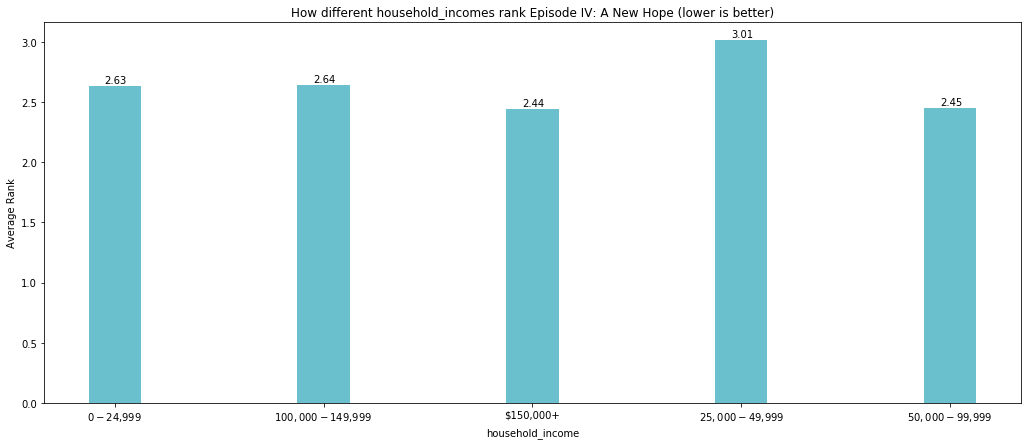

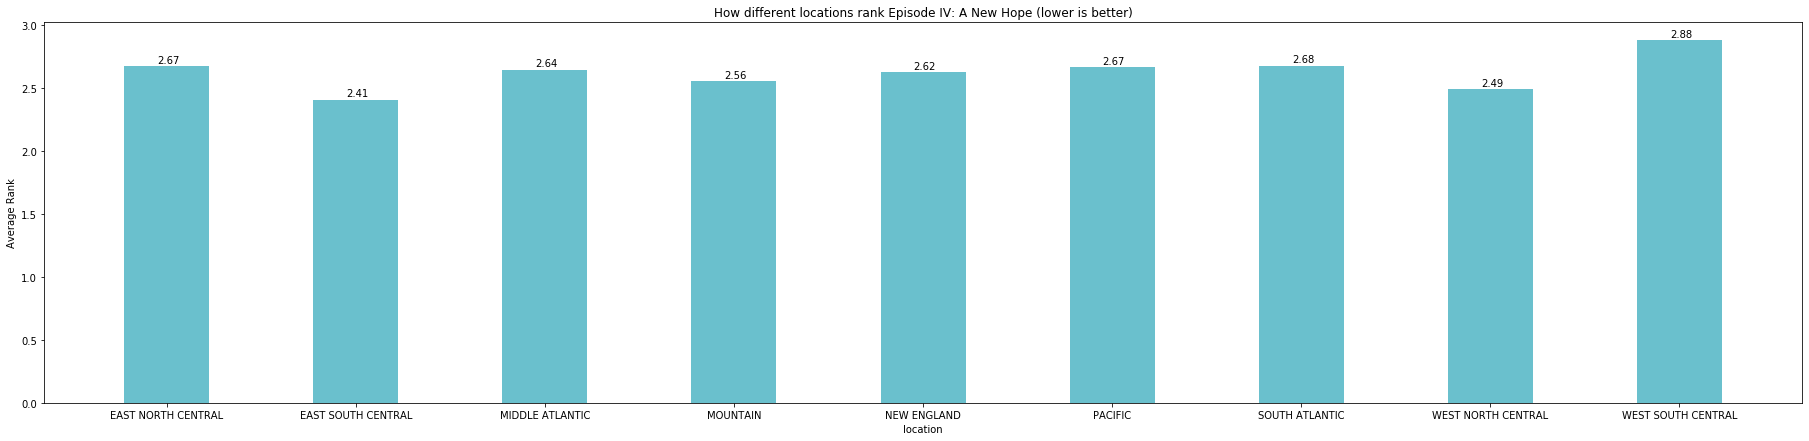

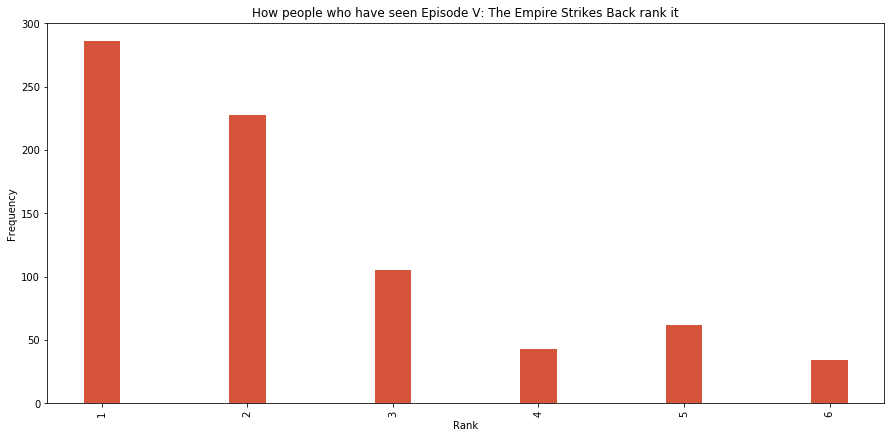

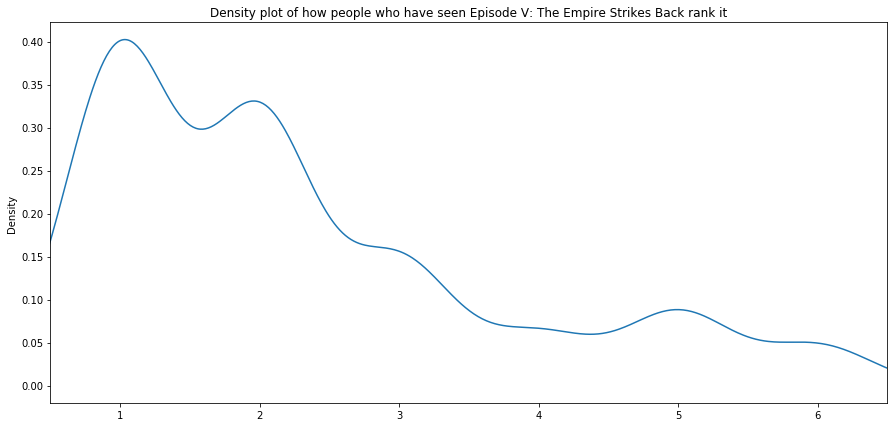

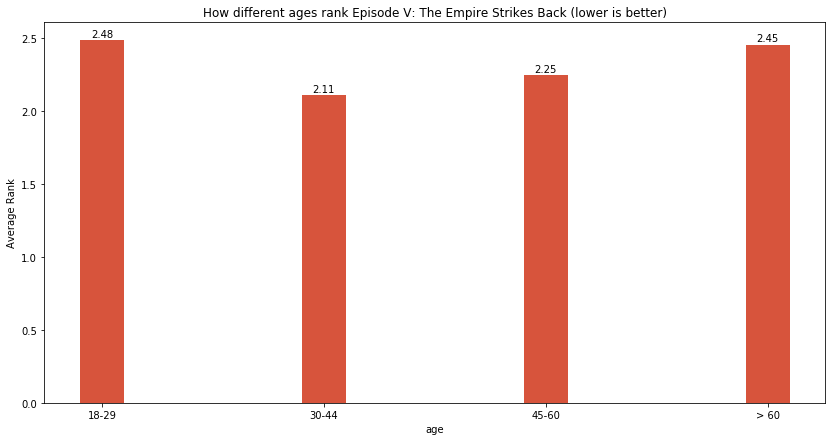

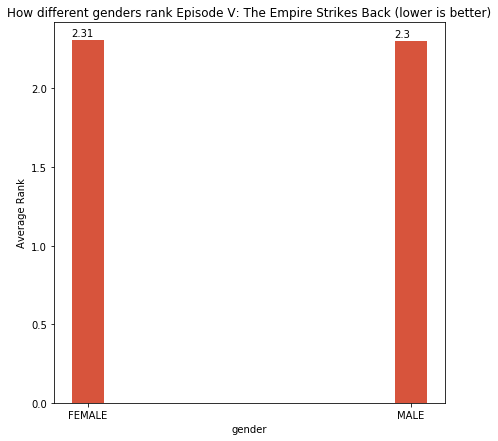

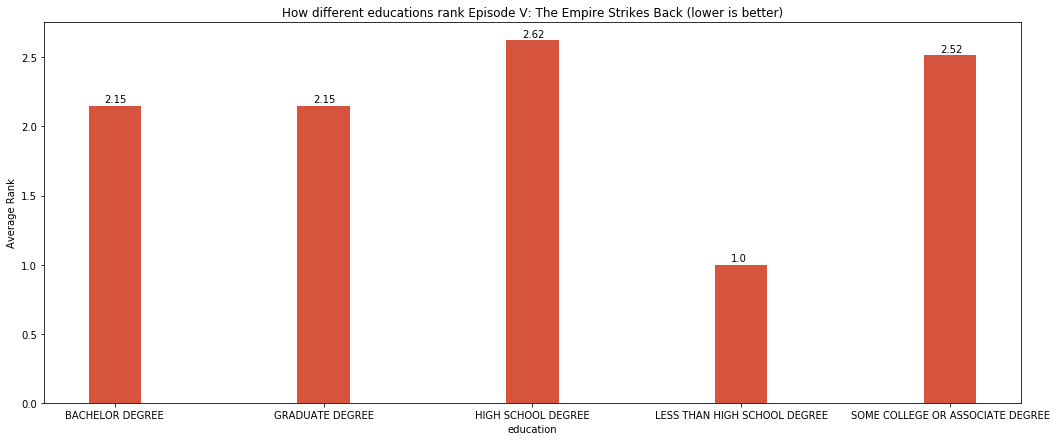

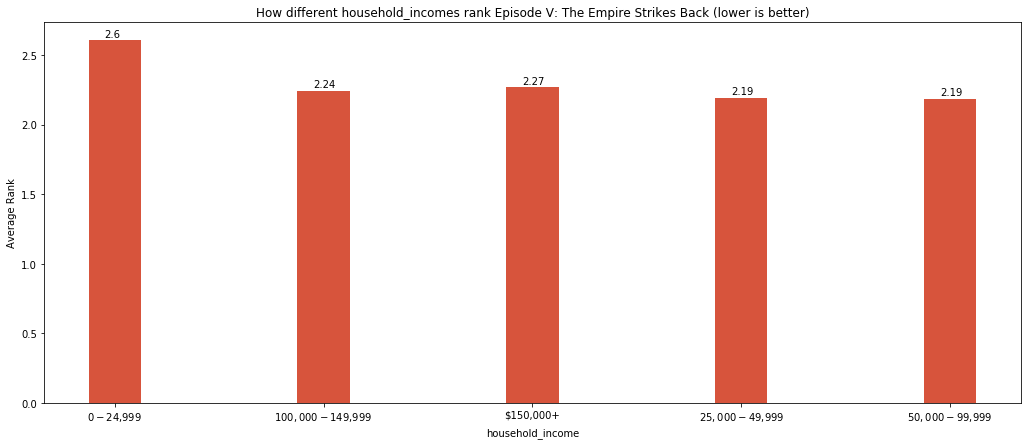

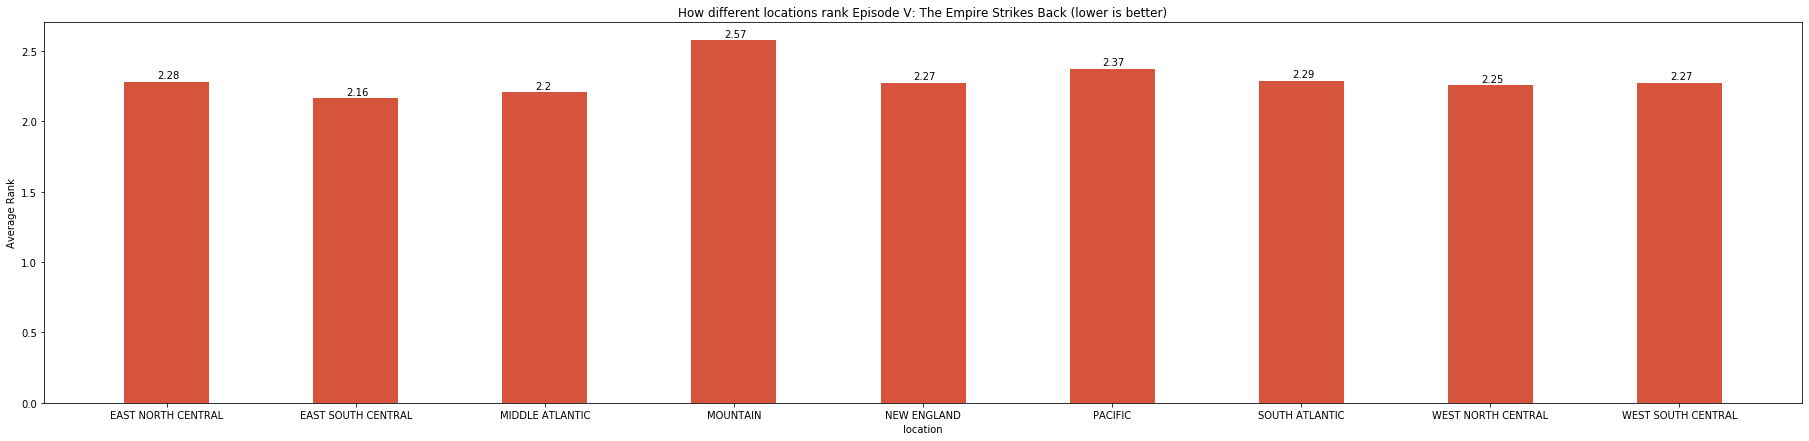

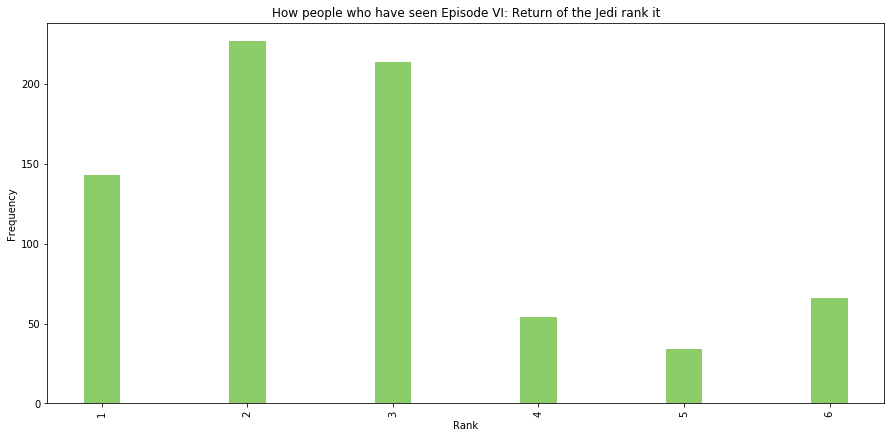

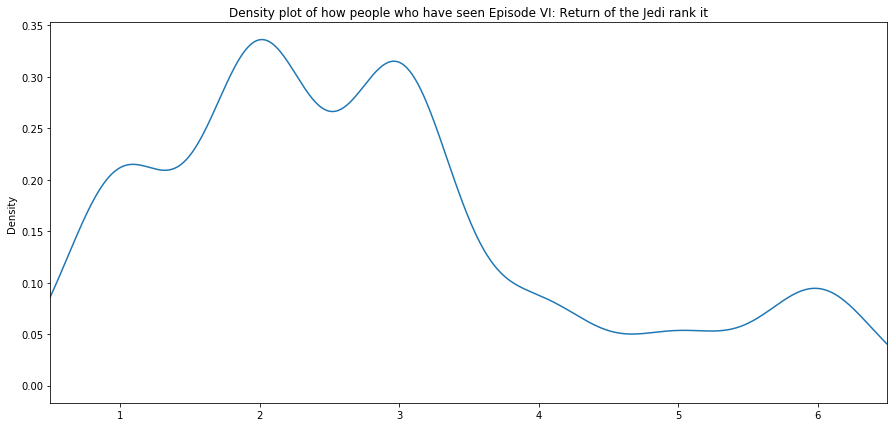

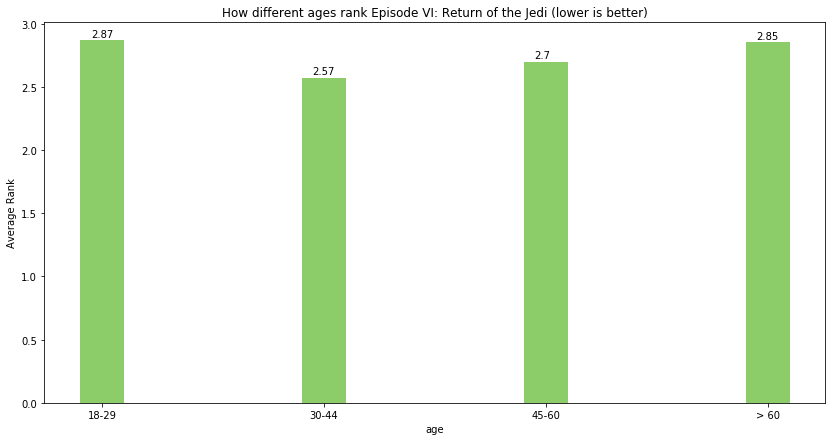

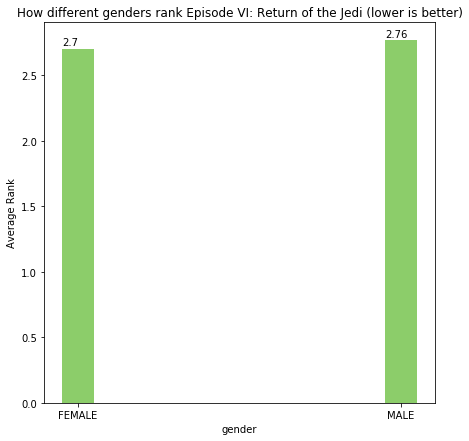

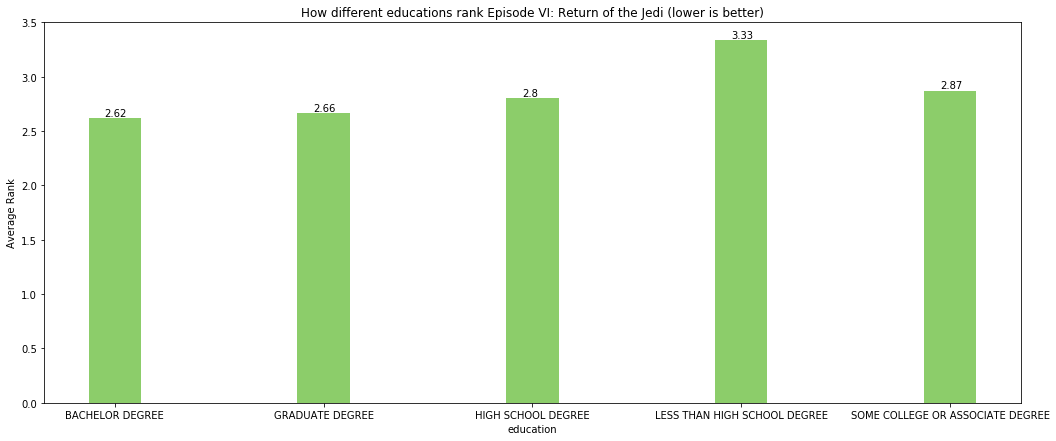

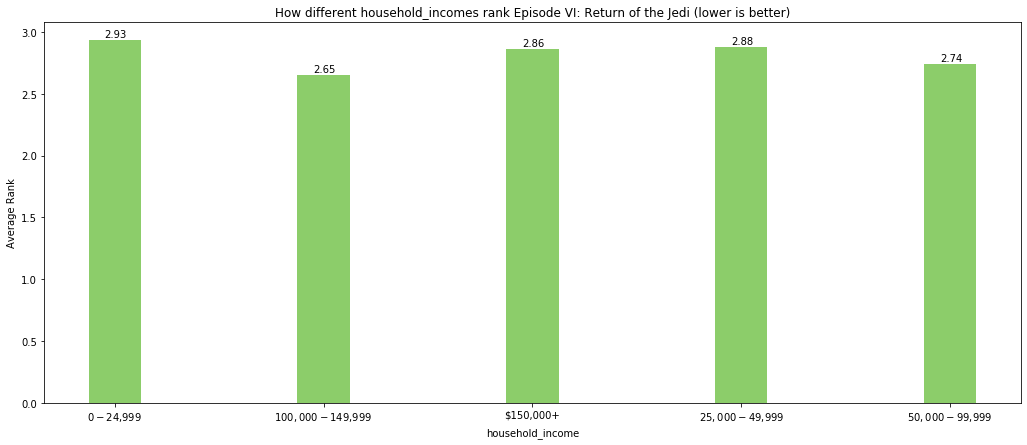

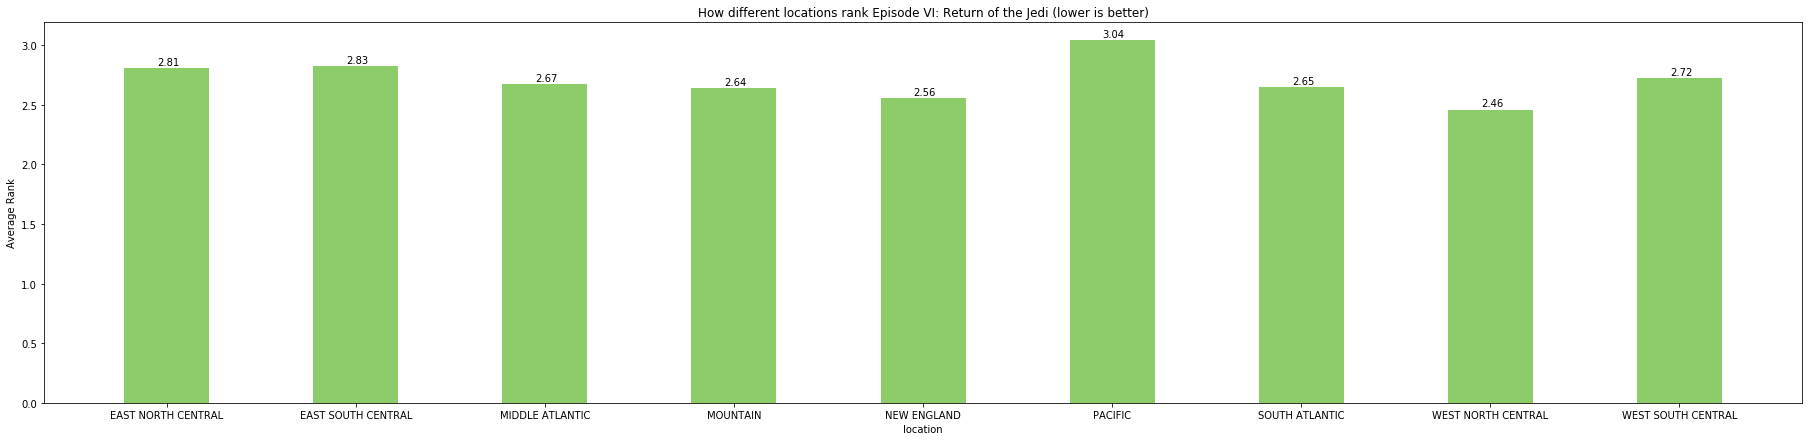

In [35]:

rank_episode_columns = ['rank_episode_I','rank_episode_II','rank_episode_III','rank_episode_IV','rank_episode_V','rank_episode_VI']
seen_episode_columns = ['seen_episode_I','seen_episode_II','seen_episode_III','seen_episode_IV','seen_episode_V','seen_episode_VI']
episode_titles = ['Episode I: The Phantom Menace', 'Episode II: Attack of the Clones', 'Episode III: Revenge of the Sith', 'Episode IV: A New Hope', 'Episode V: The Empire Strikes Back', 'Episode VI: Return of the Jedi']
demographics = ['age', 'gender', 'education', 'household_income', 'location']

colors = [(0.886, 0.843, 0.450), (0.749, 0.533, 0.827), (0.890, 0.690, 0.349),(0.415, 0.752, 0.803),(0.843, 0.329, 0.235),(0.549, 0.803, 0.415)]

# Need the i index which corresponds to each rank column, seen column and color. For example i=0 means rank column is episode I, seen column is episode I, and the color is the color for episode I
for i in range(len(rank_episode_columns)):
    
    # Frequency plot of how people rank this particular episode
    starwars[rank_episode_columns[i]][starwars[seen_episode_columns[i]]=='YES'][starwars[rank_episode_columns[i]] != -1].value_counts().sort_index().plot(kind='bar', color=colors[i],  width=0.25, figsize=(15,7))
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title('How people who have seen '+episode_titles[i]+ ' rank it')
    plt.show()
    
    # Density plot of how people rank this particular episode
    starwars[rank_episode_columns[i]][starwars[seen_episode_columns[i]]=='YES'][starwars[rank_episode_columns[i]]!=-1].plot(kind='density', xlim=(0.5,6.5), x = 'Rank', title = 'Density plot of how people who have seen '+episode_titles[i]+' rank it', figsize=(15,7))
    
    # Then we loop through each demographic
    for demographic in demographics:
        
        rate = []
        unique_segments = starwars[demographic].unique()
        
        # Removing the -1 from each the unique values of each demographic
        nan_index = np.argwhere(unique_segments==-1)
        unique_segments = np.delete(unique_segments, nan_index)
        unique_segments.sort()
        
        # looping through each unique segment of each demographic
        for unique_segment in unique_segments:
            
            unique_segment_rank = starwars[rank_episode_columns[i]][starwars[seen_episode_columns[i]]=='YES'][starwars[rank_episode_columns[i]]!=-1][starwars[demographic]==unique_segment].mean()
            rate.append(unique_segment_rank)
            
            #print(demographic+ ": "+unique_segment+" --> "+rank_episode_columns[i]+ "="+str(round(unique_segment_rank,2)))
        
        # Used the number of unique segments here to set the figure size and the bar width individually, because it looks nice this way
        plt.figure(figsize=((len(unique_segments)*3.5), 7))
        plt.bar(list(range(len(unique_segments))), rate, color=colors[i], width=(len(unique_segments)/20))
        plt.xticks(list(range(len(unique_segments))), unique_segments)
        plt.xlabel(demographic)
        
        plt.ylabel('Average Rank')
        plt.title('How different '+str(demographic)+'s rank '+episode_titles[i]+' (lower is better)')
        
        for index, value in enumerate(rate):
            plt.text(index-0.05, value+0.025, str(round(value,2)))
        plt.show()

Now we look at how the people who consider themselves fans rank each of these movies

[]

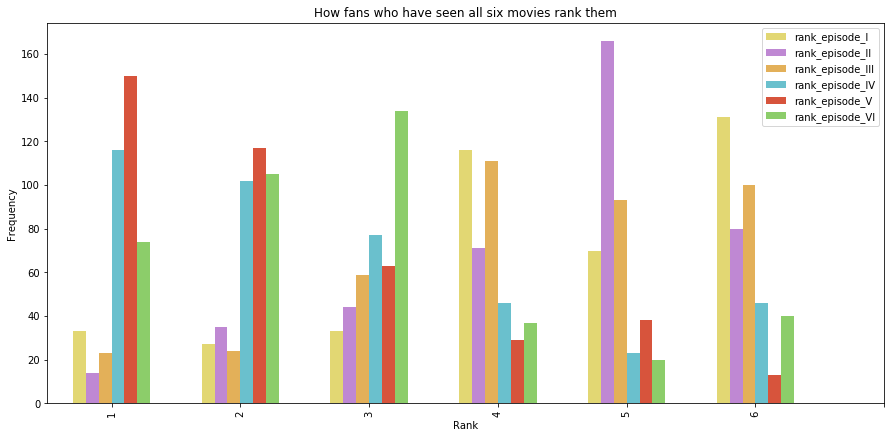

In [36]:

index = np.arange(7)
bar_width=1
starwars['rank_episode_I'][starwars['consider_themselves_fan']=='YES'][starwars['seen_episode_I']=='YES'][starwars['seen_episode_II']=='YES'][starwars['seen_episode_III']=='YES'][starwars['seen_episode_IV']=='YES'][starwars['seen_episode_V']=='YES'][starwars['seen_episode_VI']=='YES'][starwars['rank_episode_I'] != -1][starwars['rank_episode_II'] != -1][starwars['rank_episode_III'] != -1][starwars['rank_episode_IV'] != -1][starwars['rank_episode_V'] != -1][starwars['rank_episode_VI'] != -1].value_counts().sort_index().plot(kind='bar', color=(0.886, 0.843, 0.450), position=-2, width=0.1, figsize=(15,7))
starwars['rank_episode_II'][starwars['consider_themselves_fan']=='YES'][starwars['seen_episode_I']=='YES'][starwars['seen_episode_II']=='YES'][starwars['seen_episode_III']=='YES'][starwars['seen_episode_IV']=='YES'][starwars['seen_episode_V']=='YES'][starwars['seen_episode_VI']=='YES'][starwars['rank_episode_I'] != -1][starwars['rank_episode_II'] != -1][starwars['rank_episode_III'] != -1][starwars['rank_episode_IV'] != -1][starwars['rank_episode_V'] != -1][starwars['rank_episode_VI'] != -1].value_counts().sort_index().plot(kind='bar', color = (0.749, 0.533, 0.827), position = -3, width=0.1, figsize=(15,7))
starwars['rank_episode_III'][starwars['consider_themselves_fan']=='YES'][starwars['seen_episode_I']=='YES'][starwars['seen_episode_II']=='YES'][starwars['seen_episode_III']=='YES'][starwars['seen_episode_IV']=='YES'][starwars['seen_episode_V']=='YES'][starwars['seen_episode_VI']=='YES'][starwars['rank_episode_I'] != -1][starwars['rank_episode_II'] != -1][starwars['rank_episode_III'] != -1][starwars['rank_episode_IV'] != -1][starwars['rank_episode_V'] != -1][starwars['rank_episode_VI'] != -1].value_counts().sort_index().plot(kind='bar', color = (0.890, 0.690, 0.349), position = -4, width=0.1, figsize=(15,7))
starwars['rank_episode_IV'][starwars['consider_themselves_fan']=='YES'][starwars['seen_episode_I']=='YES'][starwars['seen_episode_II']=='YES'][starwars['seen_episode_III']=='YES'][starwars['seen_episode_IV']=='YES'][starwars['seen_episode_V']=='YES'][starwars['seen_episode_VI']=='YES'][starwars['rank_episode_I'] != -1][starwars['rank_episode_II'] != -1][starwars['rank_episode_III'] != -1][starwars['rank_episode_IV'] != -1][starwars['rank_episode_V'] != -1][starwars['rank_episode_VI'] != -1].value_counts().sort_index().plot(kind='bar', color = (0.415, 0.752, 0.803), position = -5, width=0.1, figsize=(15,7))
starwars['rank_episode_V'][starwars['consider_themselves_fan']=='YES'][starwars['seen_episode_I']=='YES'][starwars['seen_episode_II']=='YES'][starwars['seen_episode_III']=='YES'][starwars['seen_episode_IV']=='YES'][starwars['seen_episode_V']=='YES'][starwars['seen_episode_VI']=='YES'][starwars['rank_episode_I'] != -1][starwars['rank_episode_II'] != -1][starwars['rank_episode_III'] != -1][starwars['rank_episode_IV'] != -1][starwars['rank_episode_V'] != -1][starwars['rank_episode_VI'] != -1].value_counts().sort_index().plot(kind='bar', color = (0.843, 0.329, 0.235), position = -6, width=0.1, figsize=(15,7))
starwars['rank_episode_VI'][starwars['consider_themselves_fan']=='YES'][starwars['seen_episode_I']=='YES'][starwars['seen_episode_II']=='YES'][starwars['seen_episode_III']=='YES'][starwars['seen_episode_IV']=='YES'][starwars['seen_episode_V']=='YES'][starwars['seen_episode_VI']=='YES'][starwars['rank_episode_I'] != -1][starwars['rank_episode_II'] != -1][starwars['rank_episode_III'] != -1][starwars['rank_episode_IV'] != -1][starwars['rank_episode_V'] != -1][starwars['rank_episode_VI'] != -1].value_counts().sort_index().plot(kind='bar', color = (0.549, 0.803, 0.415), position = -7, width=0.1, figsize=(15,7))
plt.xticks(index + bar_width / 2)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('How fans who have seen all six movies rank them')
plt.legend()
plt.plot()

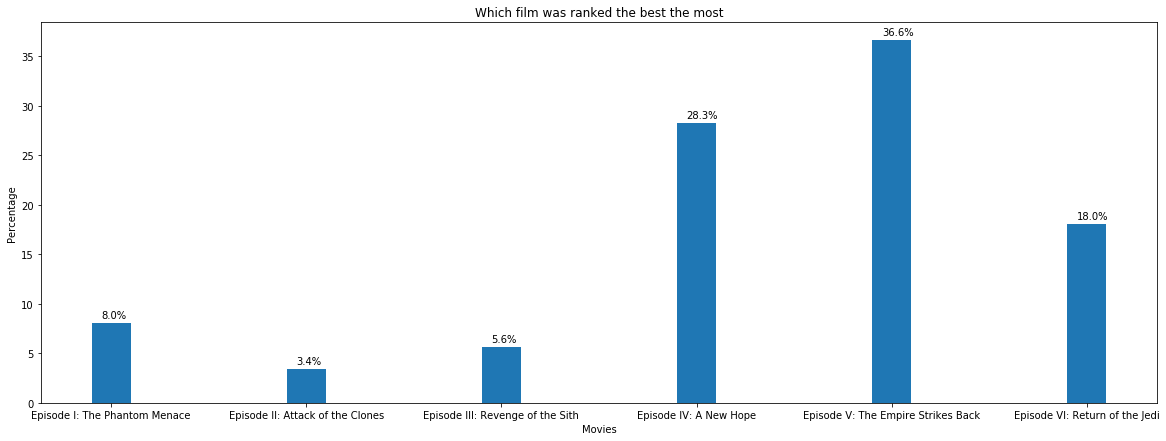

In [37]:
# Looking in more detail at which films the fans consider to be the best 

episode_I_best = starwars['rank_episode_I'][starwars['consider_themselves_fan']=='YES'][starwars['seen_episode_I']=='YES'][starwars['seen_episode_II']=='YES'][starwars['seen_episode_III']=='YES'][starwars['seen_episode_IV']=='YES'][starwars['seen_episode_V']=='YES'][starwars['seen_episode_VI']=='YES'][starwars['rank_episode_I'] != -1][starwars['rank_episode_II'] != -1][starwars['rank_episode_III'] != -1][starwars['rank_episode_IV'] != -1][starwars['rank_episode_V'] != -1][starwars['rank_episode_VI'] != -1].value_counts()[1]
episode_II_best = starwars['rank_episode_II'][starwars['consider_themselves_fan']=='YES'][starwars['seen_episode_I']=='YES'][starwars['seen_episode_II']=='YES'][starwars['seen_episode_III']=='YES'][starwars['seen_episode_IV']=='YES'][starwars['seen_episode_V']=='YES'][starwars['seen_episode_VI']=='YES'][starwars['rank_episode_I'] != -1][starwars['rank_episode_II'] != -1][starwars['rank_episode_III'] != -1][starwars['rank_episode_IV'] != -1][starwars['rank_episode_V'] != -1][starwars['rank_episode_VI'] != -1].value_counts()[1]
episode_III_best = starwars['rank_episode_III'][starwars['consider_themselves_fan']=='YES'][starwars['seen_episode_I']=='YES'][starwars['seen_episode_II']=='YES'][starwars['seen_episode_III']=='YES'][starwars['seen_episode_IV']=='YES'][starwars['seen_episode_V']=='YES'][starwars['seen_episode_VI']=='YES'][starwars['rank_episode_I'] != -1][starwars['rank_episode_II'] != -1][starwars['rank_episode_III'] != -1][starwars['rank_episode_IV'] != -1][starwars['rank_episode_V'] != -1][starwars['rank_episode_VI'] != -1].value_counts()[1]
episode_IV_best = starwars['rank_episode_IV'][starwars['consider_themselves_fan']=='YES'][starwars['seen_episode_I']=='YES'][starwars['seen_episode_II']=='YES'][starwars['seen_episode_III']=='YES'][starwars['seen_episode_IV']=='YES'][starwars['seen_episode_V']=='YES'][starwars['seen_episode_VI']=='YES'][starwars['rank_episode_I'] != -1][starwars['rank_episode_II'] != -1][starwars['rank_episode_III'] != -1][starwars['rank_episode_IV'] != -1][starwars['rank_episode_V'] != -1][starwars['rank_episode_VI'] != -1].value_counts()[1]
episode_V_best = starwars['rank_episode_V'][starwars['consider_themselves_fan']=='YES'][starwars['seen_episode_I']=='YES'][starwars['seen_episode_II']=='YES'][starwars['seen_episode_III']=='YES'][starwars['seen_episode_IV']=='YES'][starwars['seen_episode_V']=='YES'][starwars['seen_episode_VI']=='YES'][starwars['rank_episode_I'] != -1][starwars['rank_episode_II'] != -1][starwars['rank_episode_III'] != -1][starwars['rank_episode_IV'] != -1][starwars['rank_episode_V'] != -1][starwars['rank_episode_VI'] != -1].value_counts()[1]
episode_VI_best = starwars['rank_episode_VI'][starwars['consider_themselves_fan']=='YES'][starwars['seen_episode_I']=='YES'][starwars['seen_episode_II']=='YES'][starwars['seen_episode_III']=='YES'][starwars['seen_episode_IV']=='YES'][starwars['seen_episode_V']=='YES'][starwars['seen_episode_VI']=='YES'][starwars['rank_episode_I'] != -1][starwars['rank_episode_II'] != -1][starwars['rank_episode_III'] != -1][starwars['rank_episode_IV'] != -1][starwars['rank_episode_V'] != -1][starwars['rank_episode_VI'] != -1].value_counts()[1]

total = episode_I_best + episode_II_best + episode_III_best + episode_IV_best + episode_V_best + episode_VI_best
rate = [episode_I_best/total*100, episode_II_best/total*100, episode_III_best/total*100, episode_IV_best/total*100, episode_V_best/total*100, episode_VI_best/total*100]


plt.figure(figsize=(20, 7))
plt.bar(list(range(6)), rate, width=0.2)
plt.xticks(list(range(6)), episode_titles)
plt.xlabel('Movies')

plt.ylabel('Percentage')
plt.title('Which film was ranked the best the most')

for index, value in enumerate(rate):
    plt.text(index-0.05, value+0.5, str(round(value,1))+'%')
plt.show()


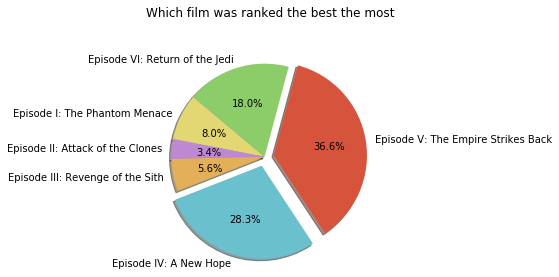

In [38]:
# Looking at the same values as a pie chart 

labels = episode_titles
colors = [(0.886, 0.843, 0.450), (0.749, 0.533, 0.827), (0.890, 0.690, 0.349),(0.415, 0.752, 0.803),(0.843, 0.329, 0.235),(0.549, 0.803, 0.415)]
explode = (0, 0, 0, 0.1, 0.1, 0)
plt.pie(rate, labels=labels,colors = colors, explode = explode, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')

plt.title('Which film was ranked the best the most\n\n')
plt.show()

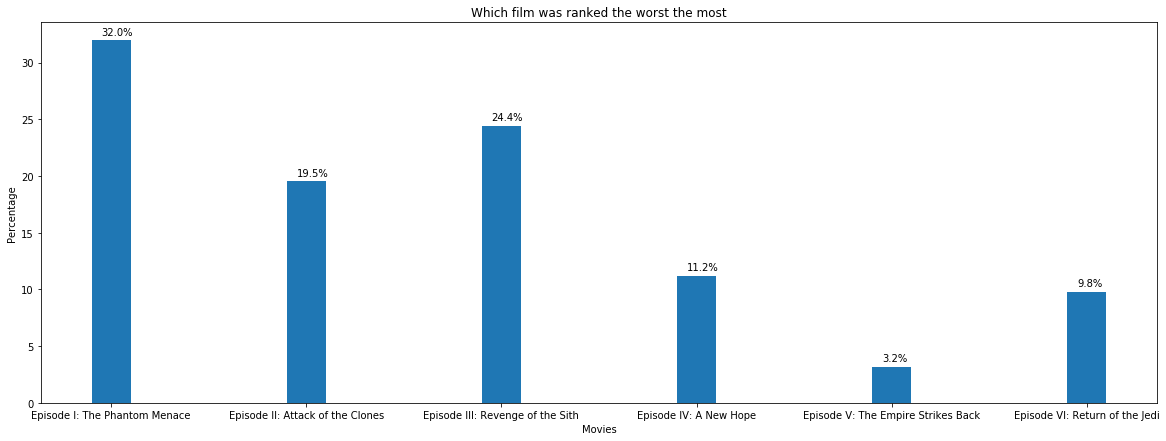

In [39]:
# Looking in more detail at which films the fans consider to be the worst 

episode_I_best = starwars['rank_episode_I'][starwars['consider_themselves_fan']=='YES'][starwars['seen_episode_I']=='YES'][starwars['seen_episode_II']=='YES'][starwars['seen_episode_III']=='YES'][starwars['seen_episode_IV']=='YES'][starwars['seen_episode_V']=='YES'][starwars['seen_episode_VI']=='YES'][starwars['rank_episode_I'] != -1][starwars['rank_episode_II'] != -1][starwars['rank_episode_III'] != -1][starwars['rank_episode_IV'] != -1][starwars['rank_episode_V'] != -1][starwars['rank_episode_VI'] != -1].value_counts()[6]
episode_II_best = starwars['rank_episode_II'][starwars['consider_themselves_fan']=='YES'][starwars['seen_episode_I']=='YES'][starwars['seen_episode_II']=='YES'][starwars['seen_episode_III']=='YES'][starwars['seen_episode_IV']=='YES'][starwars['seen_episode_V']=='YES'][starwars['seen_episode_VI']=='YES'][starwars['rank_episode_I'] != -1][starwars['rank_episode_II'] != -1][starwars['rank_episode_III'] != -1][starwars['rank_episode_IV'] != -1][starwars['rank_episode_V'] != -1][starwars['rank_episode_VI'] != -1].value_counts()[6]
episode_III_best = starwars['rank_episode_III'][starwars['consider_themselves_fan']=='YES'][starwars['seen_episode_I']=='YES'][starwars['seen_episode_II']=='YES'][starwars['seen_episode_III']=='YES'][starwars['seen_episode_IV']=='YES'][starwars['seen_episode_V']=='YES'][starwars['seen_episode_VI']=='YES'][starwars['rank_episode_I'] != -1][starwars['rank_episode_II'] != -1][starwars['rank_episode_III'] != -1][starwars['rank_episode_IV'] != -1][starwars['rank_episode_V'] != -1][starwars['rank_episode_VI'] != -1].value_counts()[6]
episode_IV_best = starwars['rank_episode_IV'][starwars['consider_themselves_fan']=='YES'][starwars['seen_episode_I']=='YES'][starwars['seen_episode_II']=='YES'][starwars['seen_episode_III']=='YES'][starwars['seen_episode_IV']=='YES'][starwars['seen_episode_V']=='YES'][starwars['seen_episode_VI']=='YES'][starwars['rank_episode_I'] != -1][starwars['rank_episode_II'] != -1][starwars['rank_episode_III'] != -1][starwars['rank_episode_IV'] != -1][starwars['rank_episode_V'] != -1][starwars['rank_episode_VI'] != -1].value_counts()[6]
episode_V_best = starwars['rank_episode_V'][starwars['consider_themselves_fan']=='YES'][starwars['seen_episode_I']=='YES'][starwars['seen_episode_II']=='YES'][starwars['seen_episode_III']=='YES'][starwars['seen_episode_IV']=='YES'][starwars['seen_episode_V']=='YES'][starwars['seen_episode_VI']=='YES'][starwars['rank_episode_I'] != -1][starwars['rank_episode_II'] != -1][starwars['rank_episode_III'] != -1][starwars['rank_episode_IV'] != -1][starwars['rank_episode_V'] != -1][starwars['rank_episode_VI'] != -1].value_counts()[6]
episode_VI_best = starwars['rank_episode_VI'][starwars['consider_themselves_fan']=='YES'][starwars['seen_episode_I']=='YES'][starwars['seen_episode_II']=='YES'][starwars['seen_episode_III']=='YES'][starwars['seen_episode_IV']=='YES'][starwars['seen_episode_V']=='YES'][starwars['seen_episode_VI']=='YES'][starwars['rank_episode_I'] != -1][starwars['rank_episode_II'] != -1][starwars['rank_episode_III'] != -1][starwars['rank_episode_IV'] != -1][starwars['rank_episode_V'] != -1][starwars['rank_episode_VI'] != -1].value_counts()[6]

total = episode_I_best + episode_II_best + episode_III_best + episode_IV_best + episode_V_best + episode_VI_best
rate = [episode_I_best/total*100, episode_II_best/total*100, episode_III_best/total*100, episode_IV_best/total*100, episode_V_best/total*100, episode_VI_best/total*100]
plt.figure(figsize=(20, 7))
plt.bar(list(range(6)), rate, width=0.2)
plt.xticks(list(range(6)), episode_titles)
plt.xlabel('Movies')

plt.ylabel('Percentage')
plt.title('Which film was ranked the worst the most')
for index, value in enumerate(rate):
    plt.text(index-0.05, value+0.5, str(round(value,1))+'%')
plt.show()


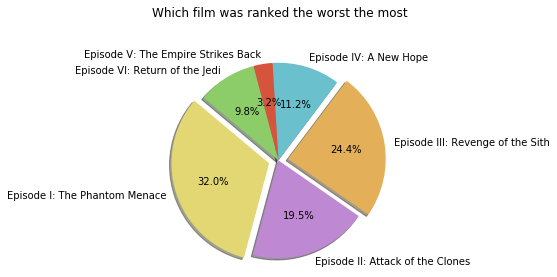

In [40]:
# Looking at the same values as a pie chart 

labels = episode_titles
colors = [(0.886, 0.843, 0.450), (0.749, 0.533, 0.827), (0.890, 0.690, 0.349),(0.415, 0.752, 0.803),(0.843, 0.329, 0.235),(0.549, 0.803, 0.415)]
explode = (0.1, 0, 0.1, 0, 0, 0)
plt.pie(rate, labels=labels,colors = colors, explode = explode, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')

plt.title('Which film was ranked the worst the most\n\n')
plt.show()

# Data Exploration - Exploring relationships between pairs of columns

# Pair 1 - Relationship between respondent's Age and how they ranked  Episode I

C:\Users\nishq\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


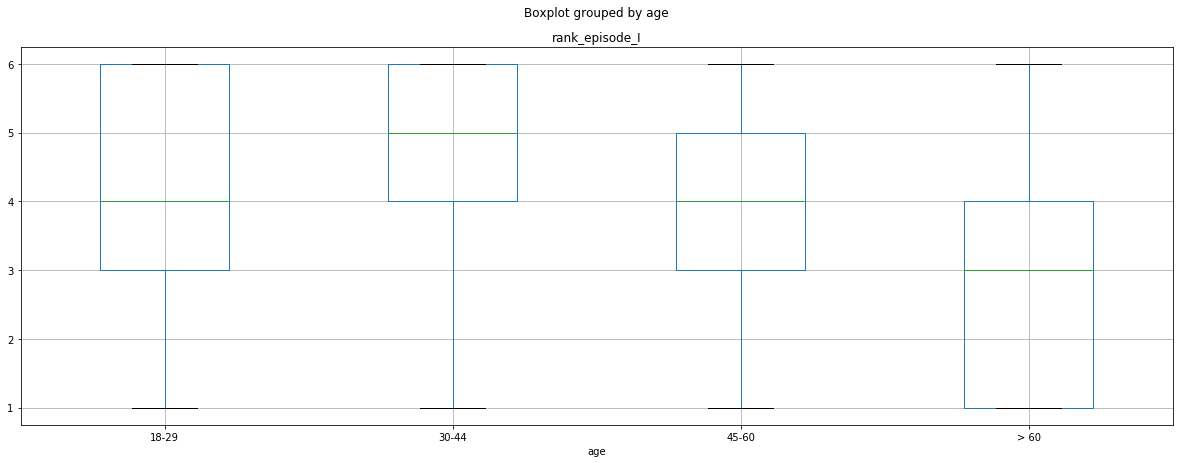

In [41]:
# Boxplot of the relationship between these columns
starwars[starwars['rank_episode_I'] != -1][starwars['seen_episode_I']=='YES'][starwars['age']!= -1].boxplot(figsize = (20,7),column='rank_episode_I', by='age')

plt.show()

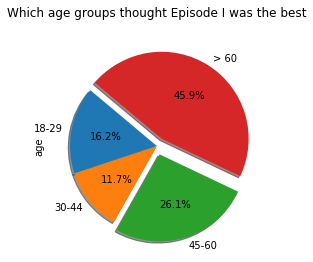

In [42]:
# Pie chart of the age groups that ranked episode I the best
starwars['age'][starwars['age']!=-1][starwars['seen_episode_I']=='YES'][starwars['rank_episode_I']==1].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=140, explode=(0,0,0.1,0.1), title = 'Which age groups thought Episode I was the best\n')
plt.show()


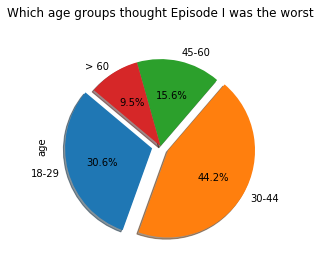

In [43]:
# Pie chart of the age groups that ranked episode I as the worst
starwars['age'][starwars['age']!=-1][starwars['seen_episode_I']=='YES'][starwars['rank_episode_I']==6].value_counts().sort_index().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=140, explode=(0.1,0.1,0,0), title='Which age groups thought Episode I was the worst\n')
plt.show()

# Pair 2 - Who Shot First? How fans answered

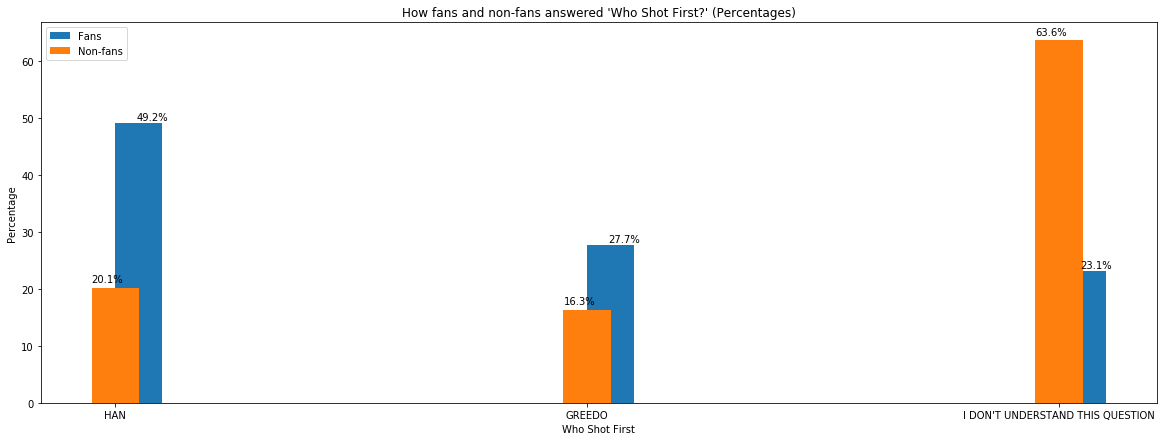

In [44]:
# Bar graph with the percentages of how fans and non-fans responded to this question

fans_han_shot_first = starwars['who_shot_first'][starwars['who_shot_first']!=-1][starwars['consider_themselves_fan']=='YES'].value_counts()['HAN']
fans_greedo_shot_first = starwars['who_shot_first'][starwars['who_shot_first']!=-1][starwars['consider_themselves_fan']=='YES'].value_counts()['GREEDO']
fans_idk_who_shot_first = starwars['who_shot_first'][starwars['who_shot_first']!=-1][starwars['consider_themselves_fan']=='YES'].value_counts()["I DON'T UNDERSTAND THIS QUESTION"]

fans_total = fans_han_shot_first + fans_greedo_shot_first + fans_idk_who_shot_first
fans_rate = [fans_han_shot_first/fans_total*100, fans_greedo_shot_first/fans_total*100, fans_idk_who_shot_first/fans_total*100]


nonfans_han_shot_first = starwars['who_shot_first'][starwars['who_shot_first']!=-1][starwars['consider_themselves_fan']=='NO'].value_counts()['HAN']
nonfans_greedo_shot_first = starwars['who_shot_first'][starwars['who_shot_first']!=-1][starwars['consider_themselves_fan']=='NO'].value_counts()['GREEDO']
nonfans_idk_who_shot_first = starwars['who_shot_first'][starwars['who_shot_first']!=-1][starwars['consider_themselves_fan']=='NO'].value_counts()["I DON'T UNDERSTAND THIS QUESTION"]

nonfans_total = nonfans_han_shot_first + nonfans_greedo_shot_first + nonfans_idk_who_shot_first
nonfans_rate = [nonfans_han_shot_first/nonfans_total*100, nonfans_greedo_shot_first/nonfans_total*100, nonfans_idk_who_shot_first/nonfans_total*100]


plt.figure(figsize=(20, 7))
plt.bar(list(range(3)), fans_rate, width=0.1, align='edge')

plt.bar(list(range(3)), nonfans_rate, width=0.1)
plt.xticks(list(range(3)), ['HAN', 'GREEDO', "I DON'T UNDERSTAND THIS QUESTION"])
plt.xlabel('Who Shot First')

plt.ylabel('Percentage')


for index, value in enumerate(fans_rate):
    plt.text(index+0.045, value+0.5, str(round(value,1))+'%')

for index, value in enumerate(nonfans_rate):
    plt.text(index-0.05, value+1, str(round(value,1))+'%')

plt.legend(['Fans','Non-fans'])
plt.title("How fans and non-fans answered 'Who Shot First?' (Percentages)")
plt.show()



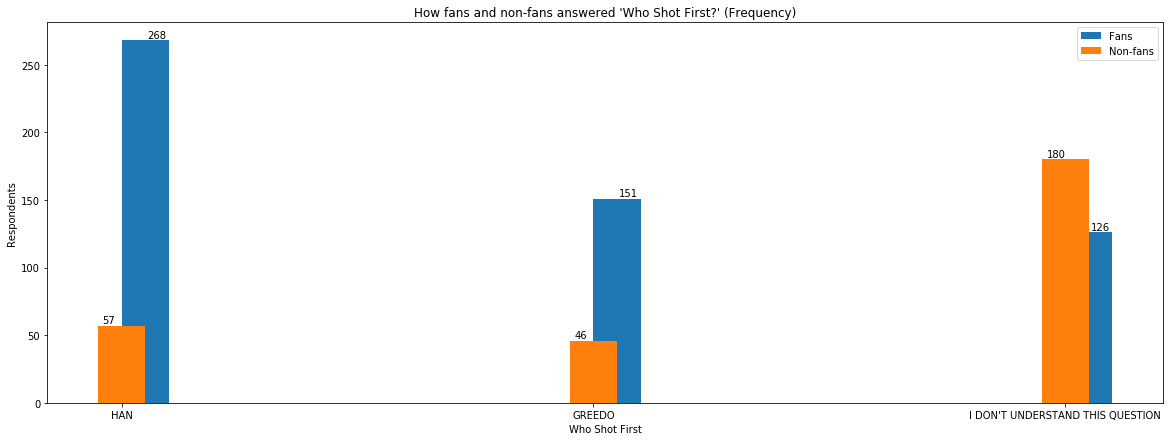

In [45]:
# Bar graph with the frequencies of how fans and non-fans responded to this question

fans_han_shot_first = starwars['who_shot_first'][starwars['who_shot_first']!=-1][starwars['consider_themselves_fan']=='YES'].value_counts()['HAN']
fans_greedo_shot_first = starwars['who_shot_first'][starwars['who_shot_first']!=-1][starwars['consider_themselves_fan']=='YES'].value_counts()['GREEDO']
fans_idk_who_shot_first = starwars['who_shot_first'][starwars['who_shot_first']!=-1][starwars['consider_themselves_fan']=='YES'].value_counts()["I DON'T UNDERSTAND THIS QUESTION"]

fans_total = fans_han_shot_first + fans_greedo_shot_first + fans_idk_who_shot_first
fans_rate = [fans_han_shot_first, fans_greedo_shot_first, fans_idk_who_shot_first]

nonfans_han_shot_first = starwars['who_shot_first'][starwars['who_shot_first']!=-1][starwars['consider_themselves_fan']=='NO'].value_counts()['HAN']
nonfans_greedo_shot_first = starwars['who_shot_first'][starwars['who_shot_first']!=-1][starwars['consider_themselves_fan']=='NO'].value_counts()['GREEDO']
nonfans_idk_who_shot_first = starwars['who_shot_first'][starwars['who_shot_first']!=-1][starwars['consider_themselves_fan']=='NO'].value_counts()["I DON'T UNDERSTAND THIS QUESTION"]

nonfans_total = nonfans_han_shot_first + nonfans_greedo_shot_first + nonfans_idk_who_shot_first
nonfans_rate = [nonfans_han_shot_first, nonfans_greedo_shot_first, nonfans_idk_who_shot_first]


plt.figure(figsize=(20, 7))
plt.bar(list(range(3)), fans_rate, width=0.1, align='edge')

plt.bar(list(range(3)), nonfans_rate, width=0.1)
plt.xticks(list(range(3)), ['HAN', 'GREEDO', "I DON'T UNDERSTAND THIS QUESTION"])
plt.xlabel('Who Shot First')

plt.ylabel('Respondents')
#plt.title('How different '+str(demographic)+'s rank '+episode_titles[i]+' (lower is better)')

for index, value in enumerate(fans_rate):
    plt.text(index+0.055, value+2, str(round(value,1)))

for index, value in enumerate(nonfans_rate):
    plt.text(index-0.04, value+2, str(round(value,1)))

plt.legend(['Fans','Non-fans'])
plt.title("How fans and non-fans answered 'Who Shot First?' (Frequency)")
plt.show()




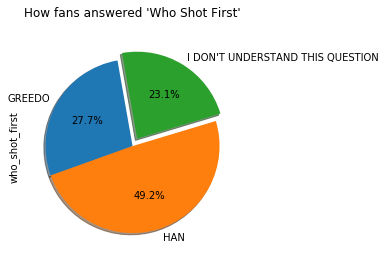

In [46]:
# Pie chart of how fans answered 'Who Shot First'

starwars['who_shot_first'][starwars['who_shot_first']!=-1][starwars['consider_themselves_fan']=='YES'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=100, explode=(0,0,0.1), title = "How fans answered 'Who Shot First'\n")
plt.show()

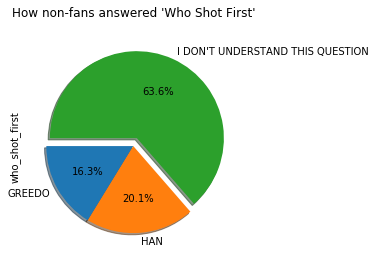

In [47]:
# Pie chart of how non-fans answered 'Who Shot First'

starwars['who_shot_first'][starwars['who_shot_first']!=-1][starwars['consider_themselves_fan']=='NO'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=180, explode=(0,0,0.1), title = "How non-fans answered 'Who Shot First'\n")
plt.show()

# Pair 3 - Relationship between respondents who consider themselves fans of Star Wars and/or Star Trek

In [48]:
# First we look at the value_counts() for both

In [49]:
starwars['consider_themselves_fan'][starwars['consider_themselves_fan']!=-1].value_counts()

YES    552
NO     284
Name: consider_themselves_fan, dtype: int64

In [50]:
starwars['star_trek_fan'][starwars['star_trek_fan']!=-1].value_counts()

NO     641
YES    427
Name: star_trek_fan, dtype: int64

In [51]:
# Then we check the number of respondents who are neither Star Wars nor Star Trek fans (we will discard this number) 
neither_fans = len(starwars['star_trek_fan'][starwars['star_trek_fan']=='NO'][starwars['consider_themselves_fan']=='NO'])

print(neither_fans)

238


In [52]:
# Then we check the number of respondents who are fans of strictly either, and take their total

only_star_trek_fans = len(starwars['star_trek_fan'][starwars['star_trek_fan']=='YES'][starwars['consider_themselves_fan']=='NO'])
only_star_wars_fans = len(starwars['star_trek_fan'][starwars['star_trek_fan']=='NO'][starwars['consider_themselves_fan']=='YES'])

print("Only Star Trek fans: " + str(only_star_trek_fans))
print("Only Star Wars fans: " + str(only_star_wars_fans))

fanboys_total = only_star_trek_fans + only_star_wars_fans


Only Star Trek fans: 45
Only Star Wars fans: 175


In [53]:
# Finally we check the number of respondents who are fans of both

both_fans = len(starwars['star_trek_fan'][starwars['star_trek_fan']=='YES'][starwars['consider_themselves_fan']=='YES'])

print("Fans of both: " + str(both_fans))

Fans of both: 370


In [54]:
# Now we add both together and determine the percentage each represents

all_fans_total = fanboys_total + both_fans

print("Percentage of strictly either fans: " + str(round(fanboys_total/all_fans_total*100, 2)) + "%")
print("Percentage of fans of both: " + str(round(both_fans/all_fans_total*100, 2)) + "%")

Percentage of strictly either fans: 37.29%
Percentage of fans of both: 62.71%


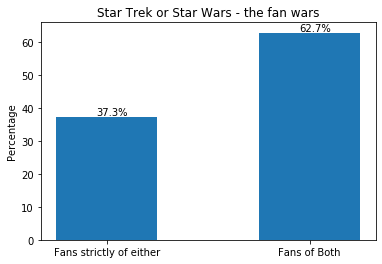

In [55]:
rate = [round(fanboys_total/all_fans_total*100, 2), round(both_fans/all_fans_total*100, 2)]

plt.bar(list(range(2)), rate, width = 0.5)

plt.xticks(list(range(2)), ["Fans strictly of either", "Fans of Both"])

plt.ylabel('Percentage')


for index, value in enumerate(rate):
    plt.text(index-0.05, value+0.5, str(round(value,1))+'%')



plt.title("Star Trek or Star Wars - the fan wars")
plt.show()


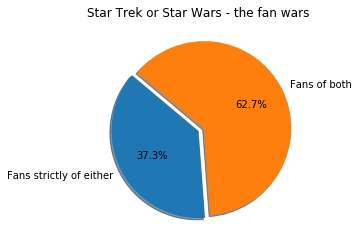

In [56]:
plt.pie(rate, labels = ['Fans strictly of either', 'Fans of both'], explode = (0, 0.075), autopct='%1.1f%%', shadow=True, startangle=140 )
plt.title("Star Trek or Star Wars - the fan wars")
plt.show()

# Data Exploration - Character affinities by demographics

Affinity towards Han


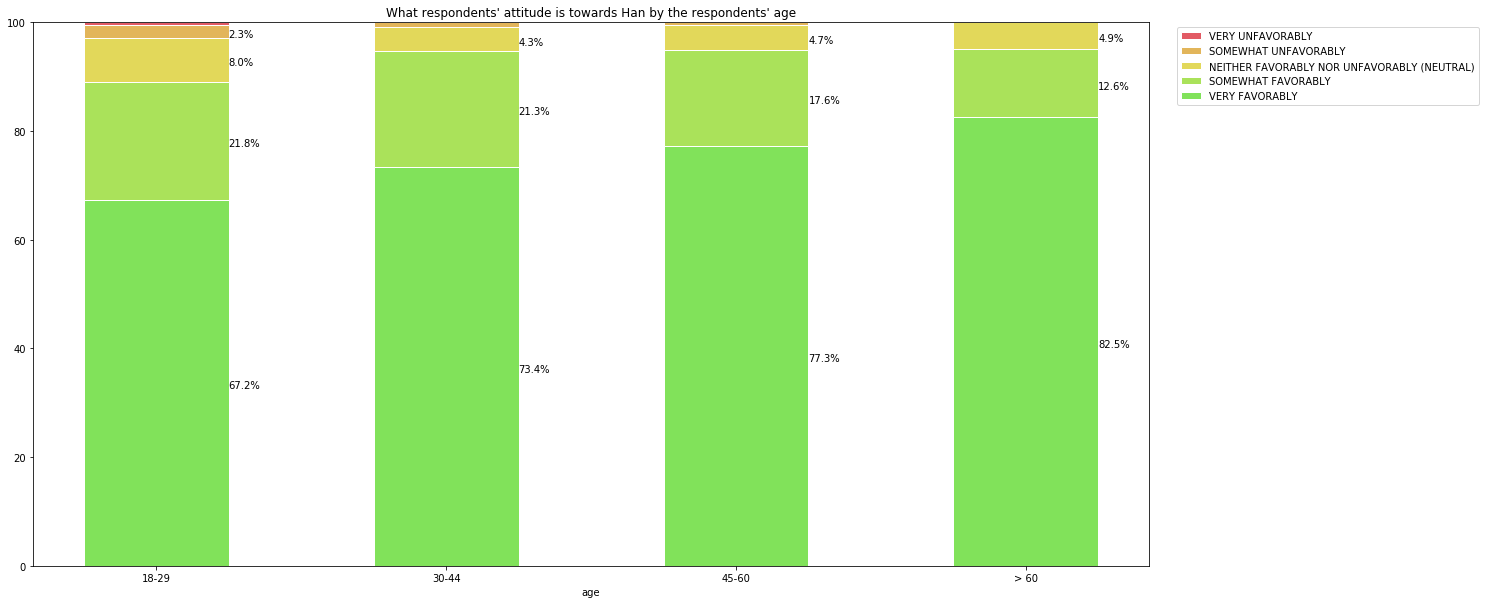

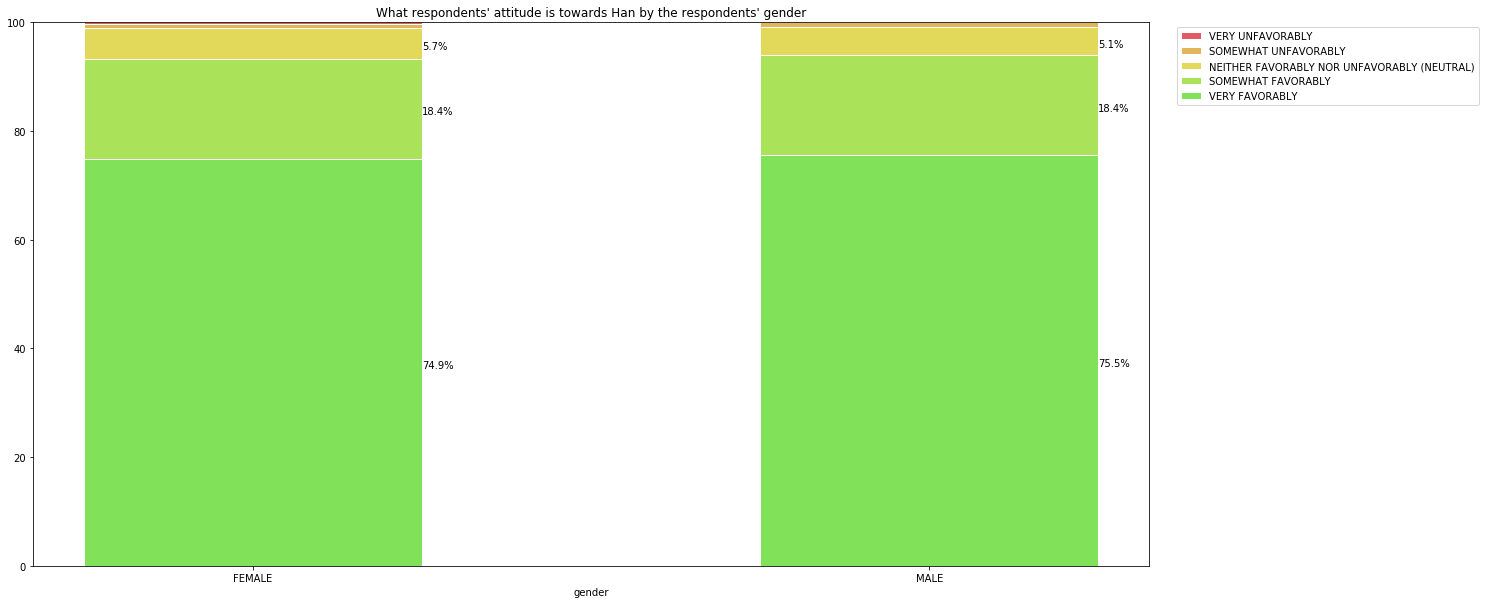

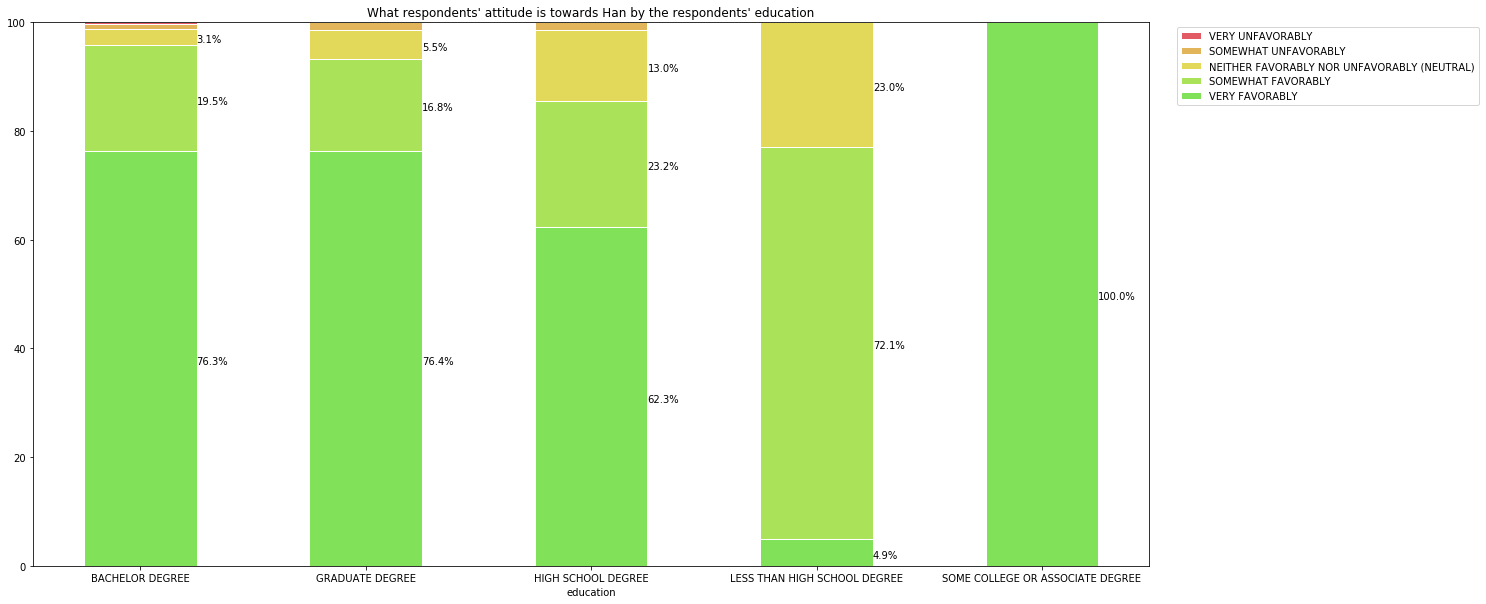

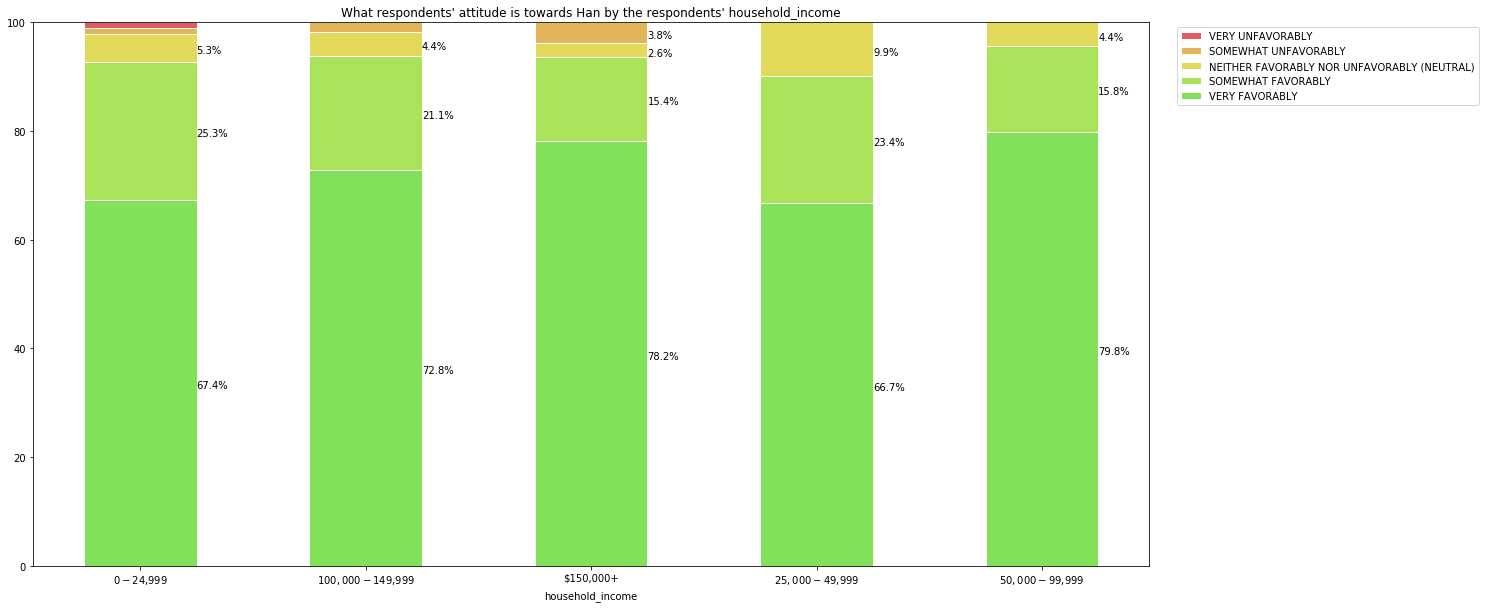

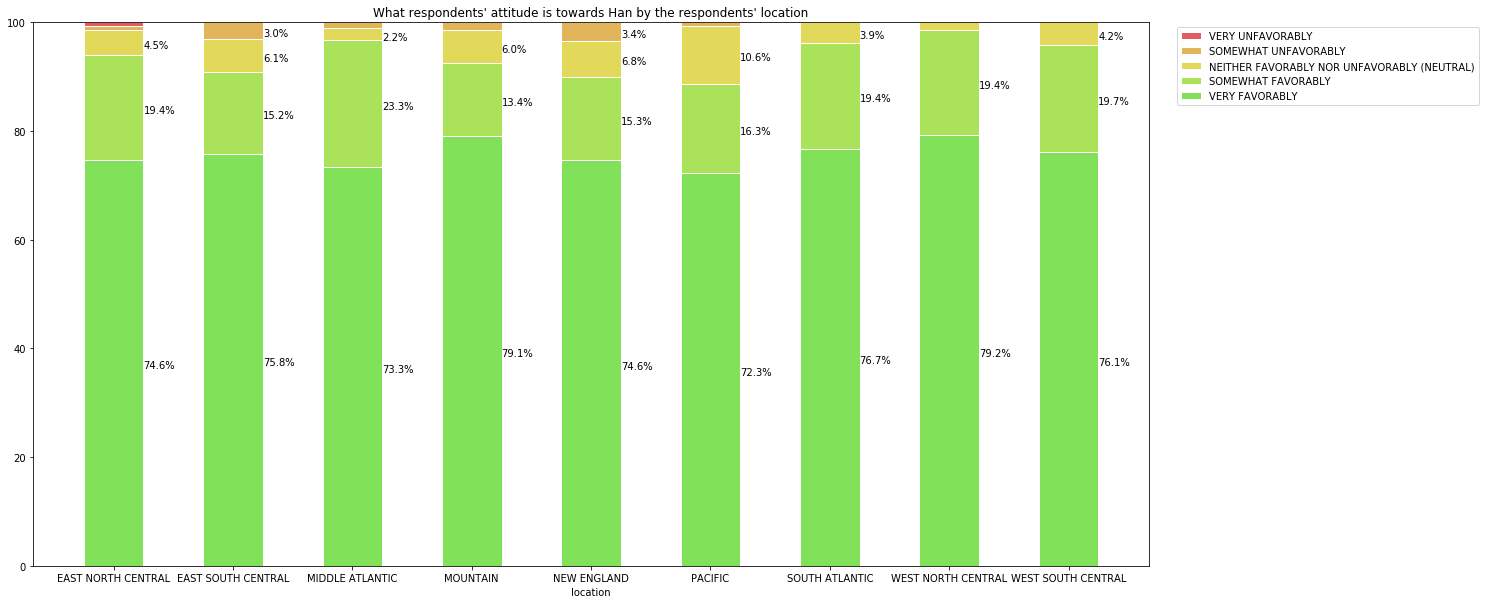

Affinity towards Luke


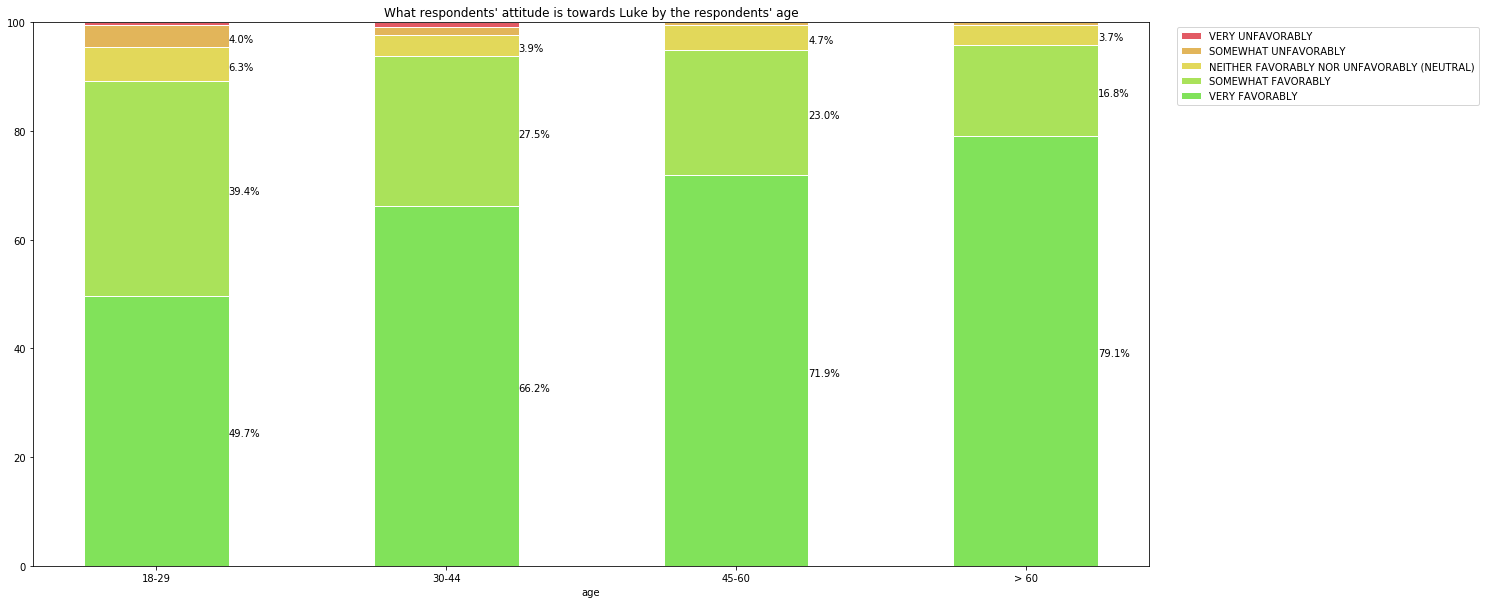

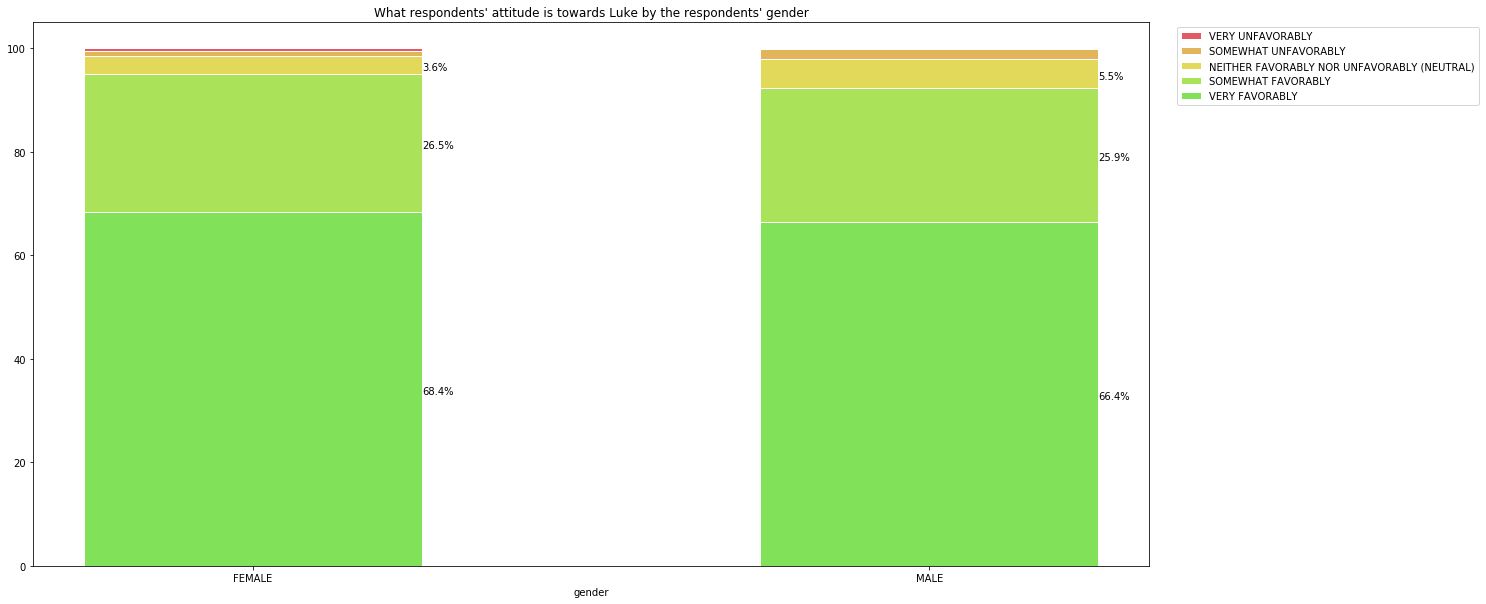

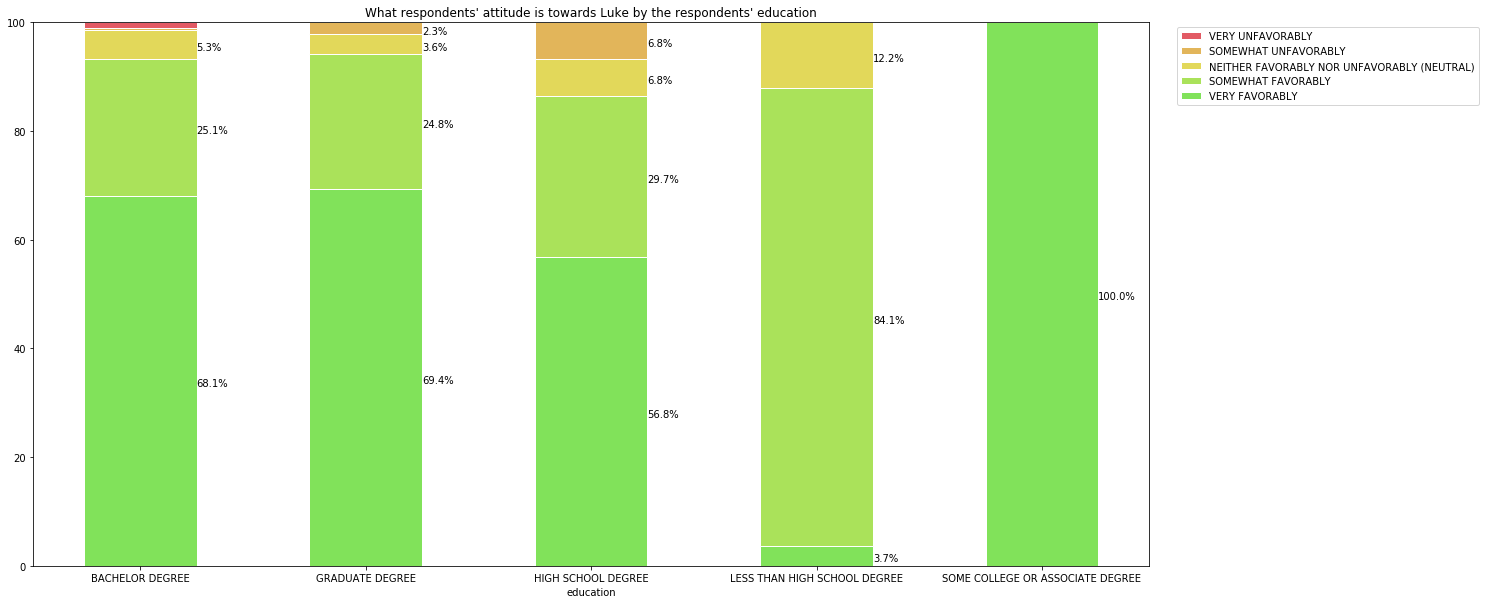

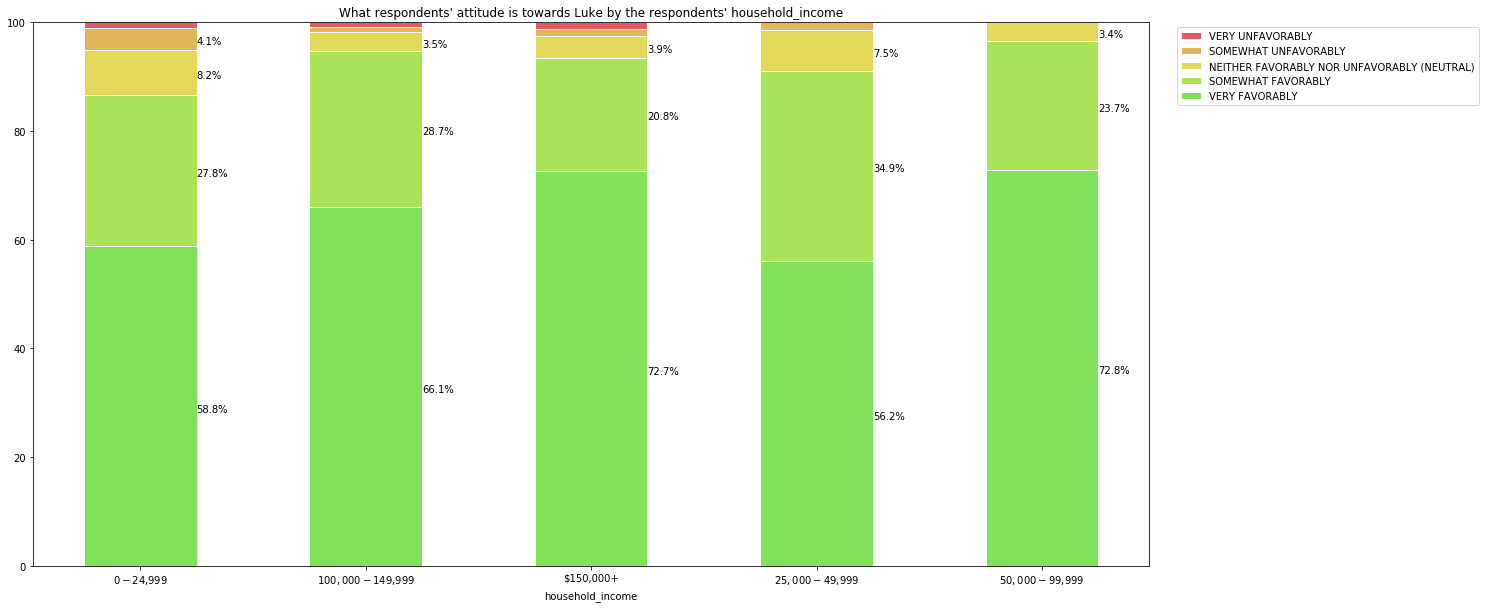

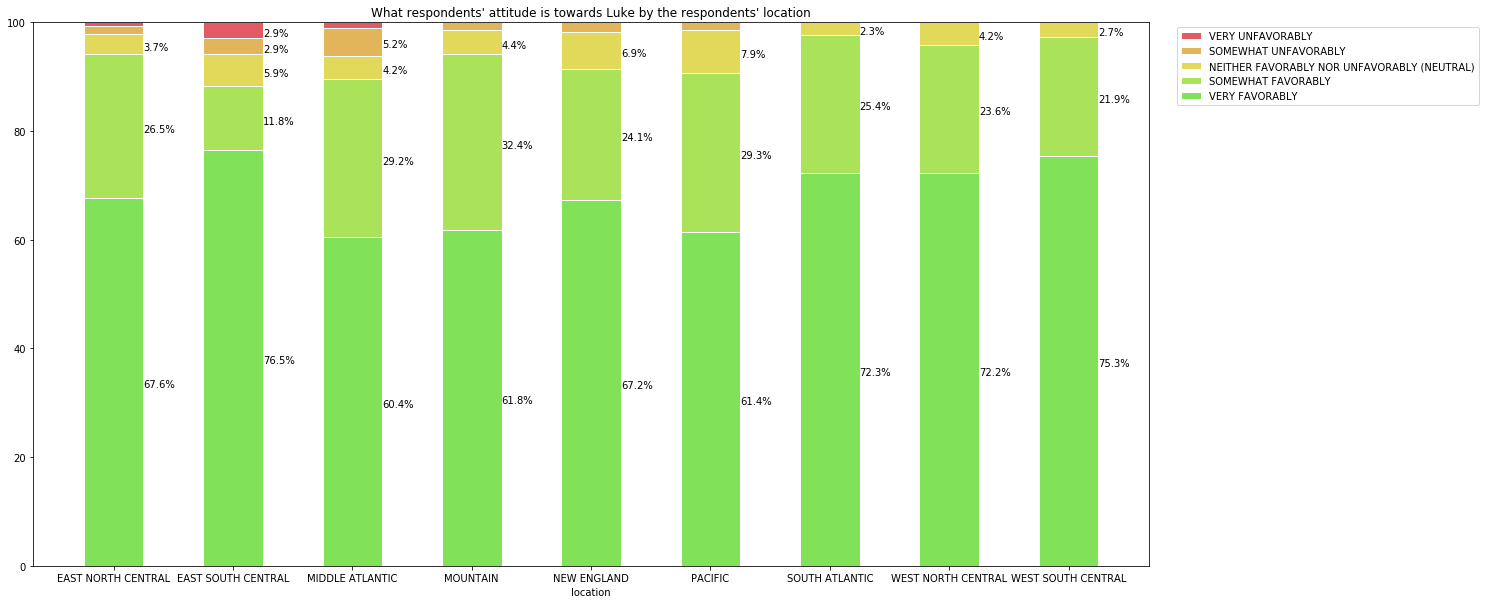

Affinity towards Leia


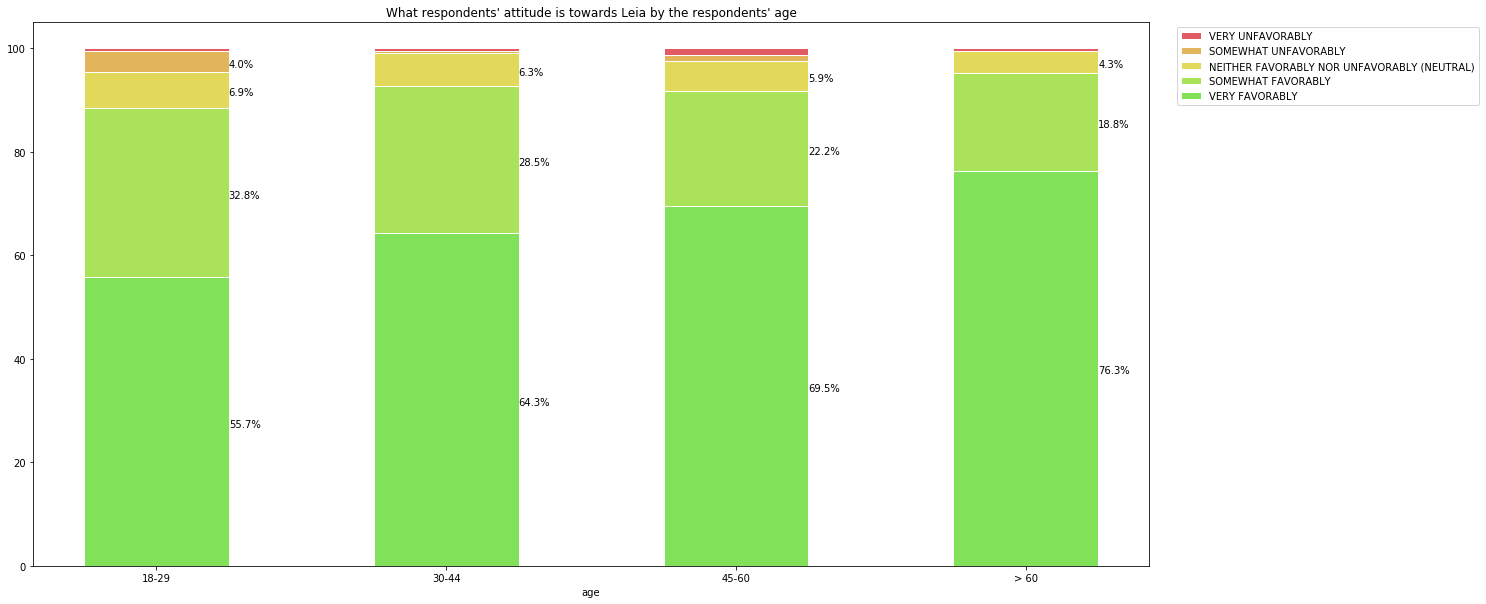

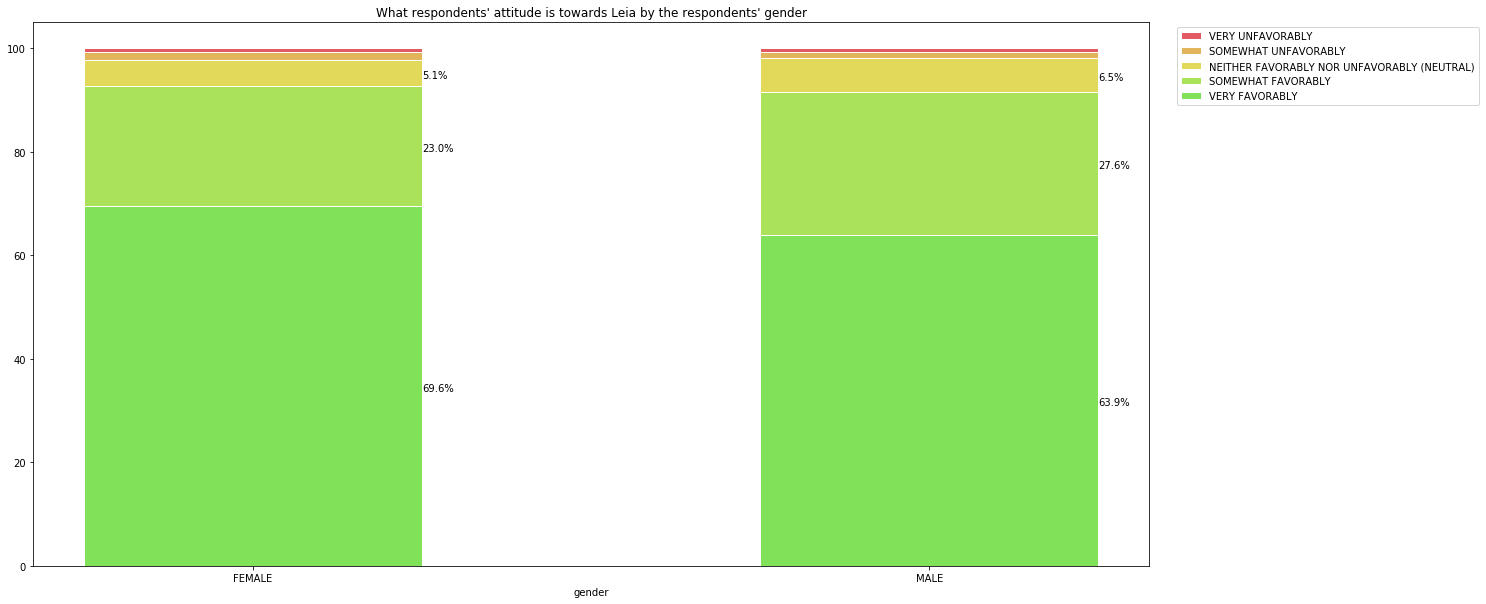

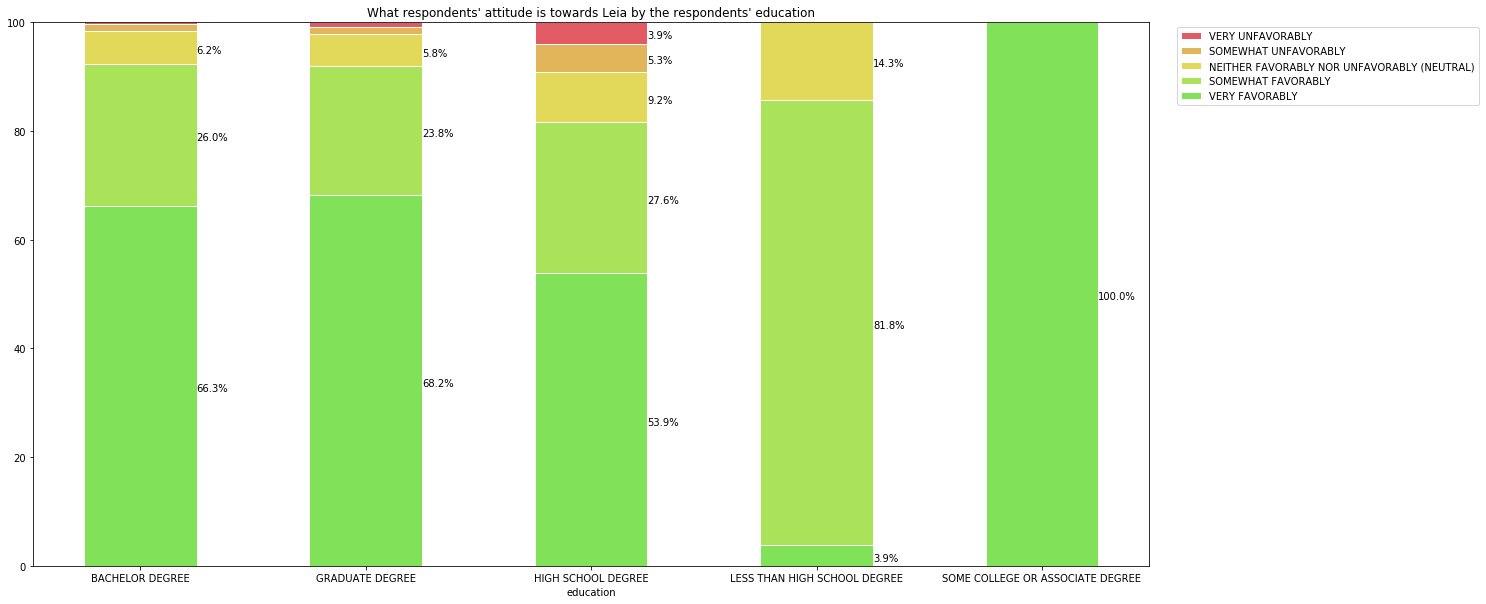

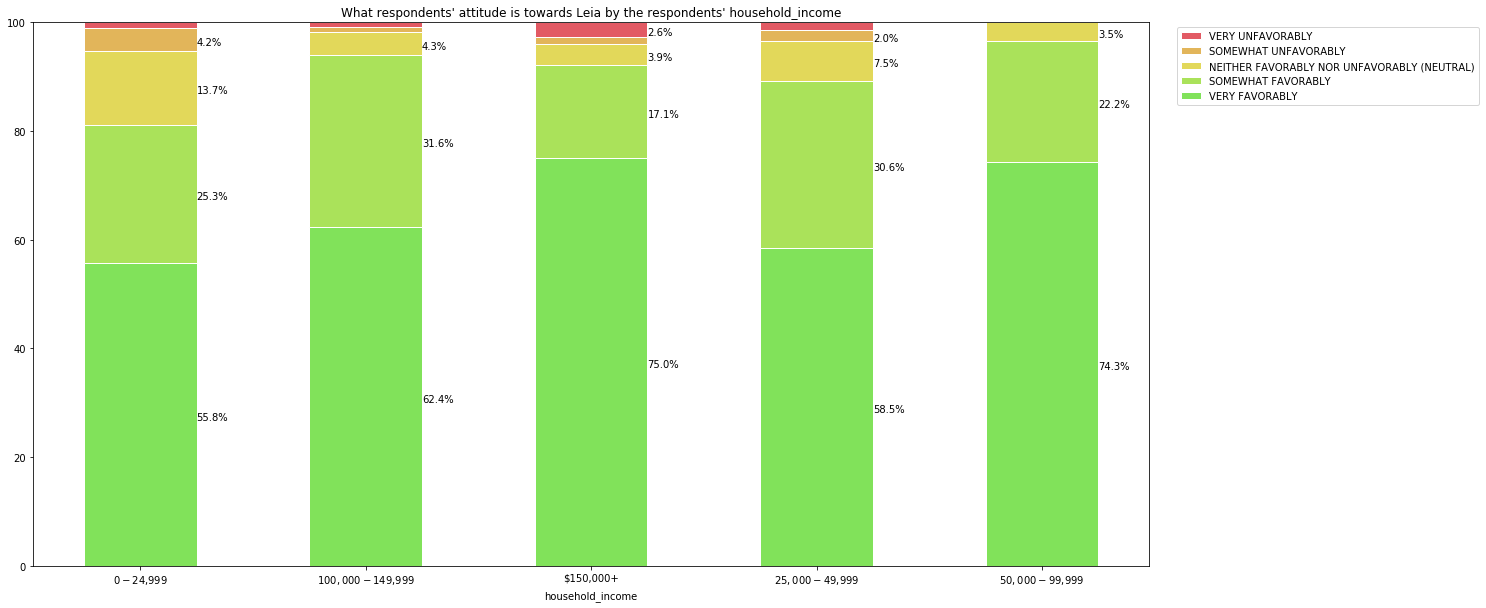

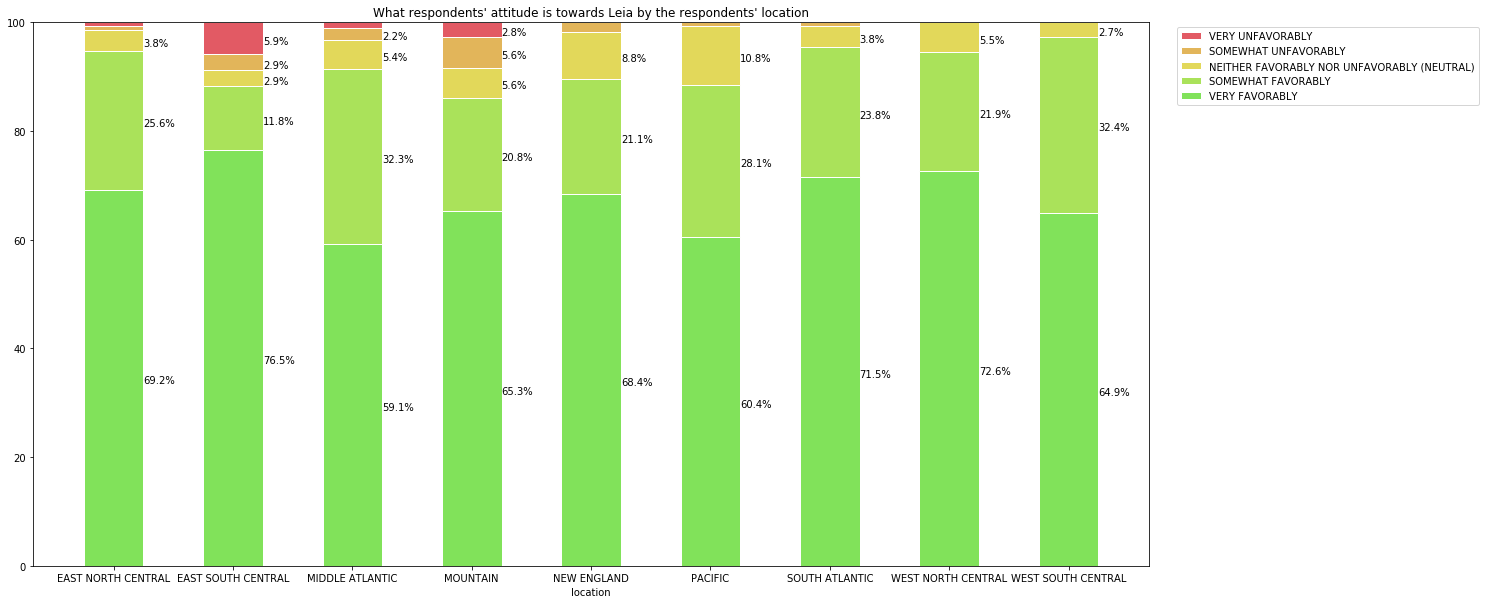

Affinity towards Anakin


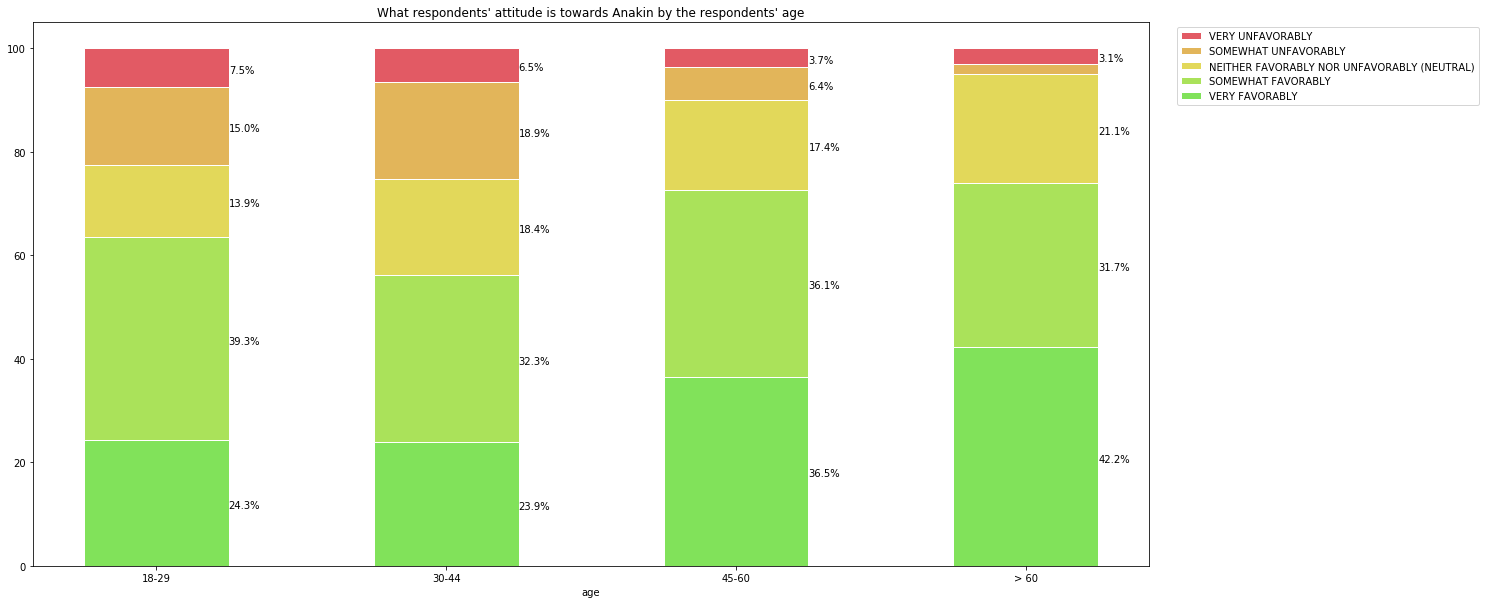

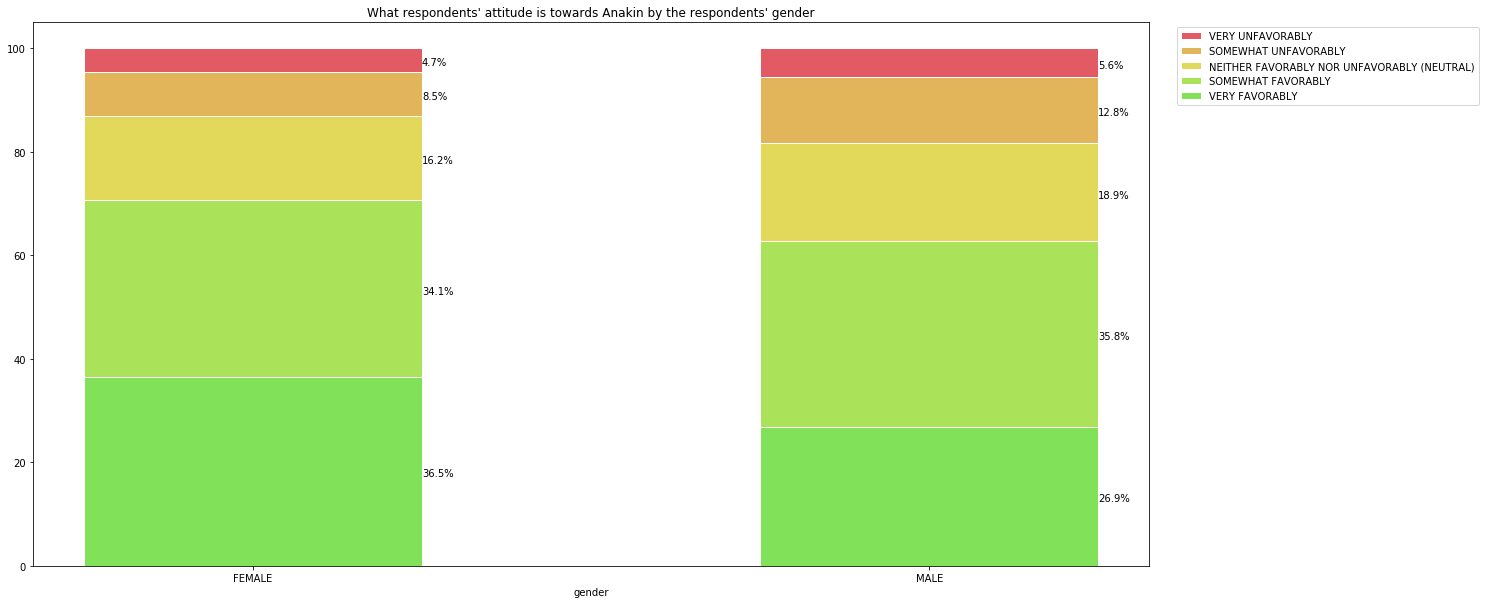

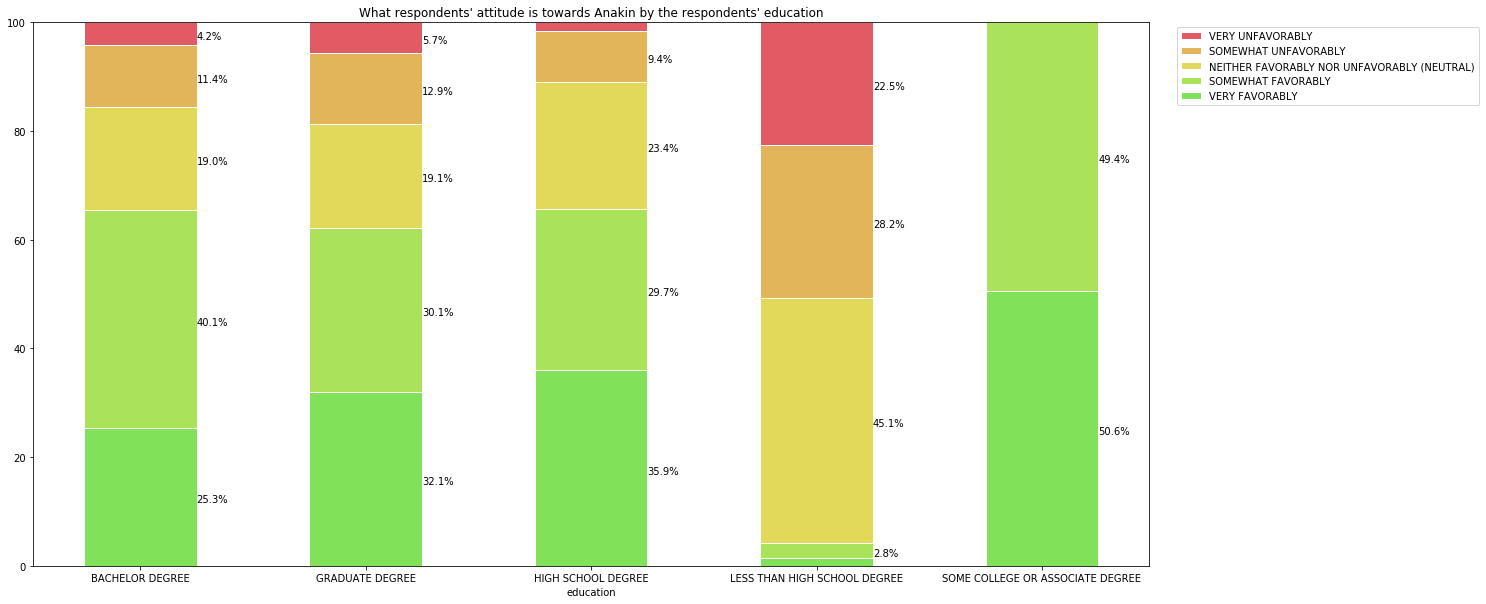

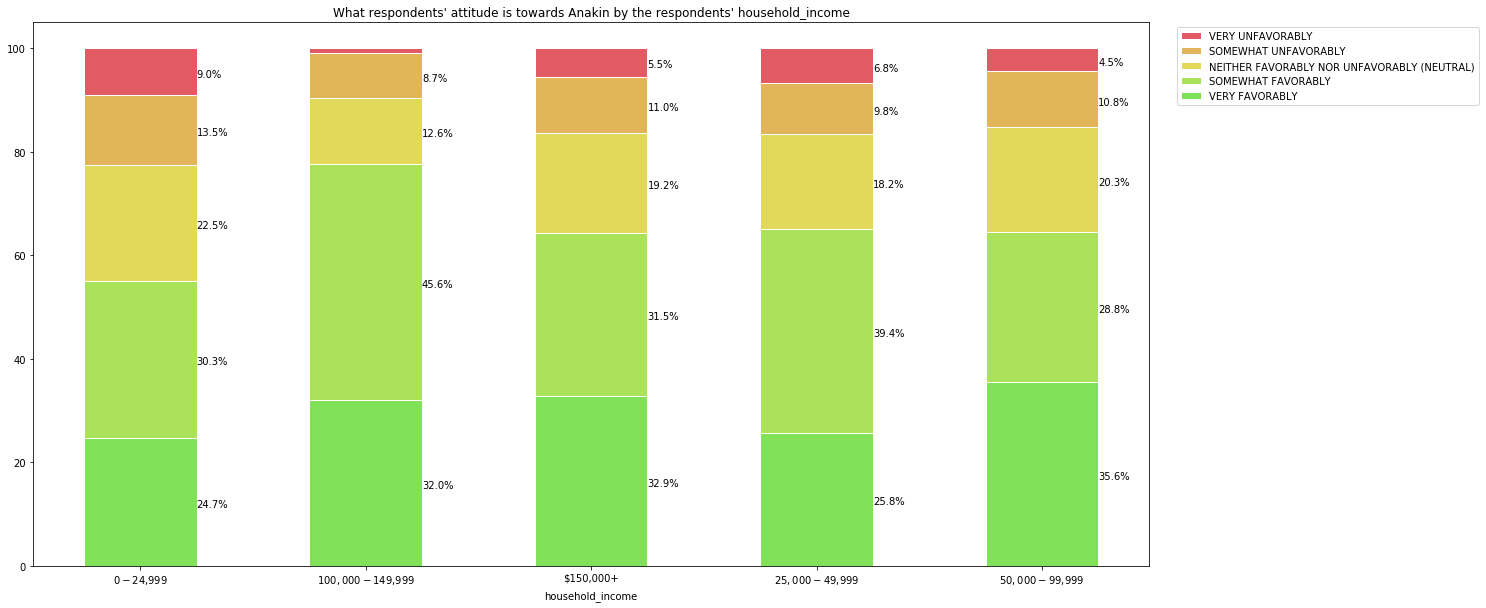

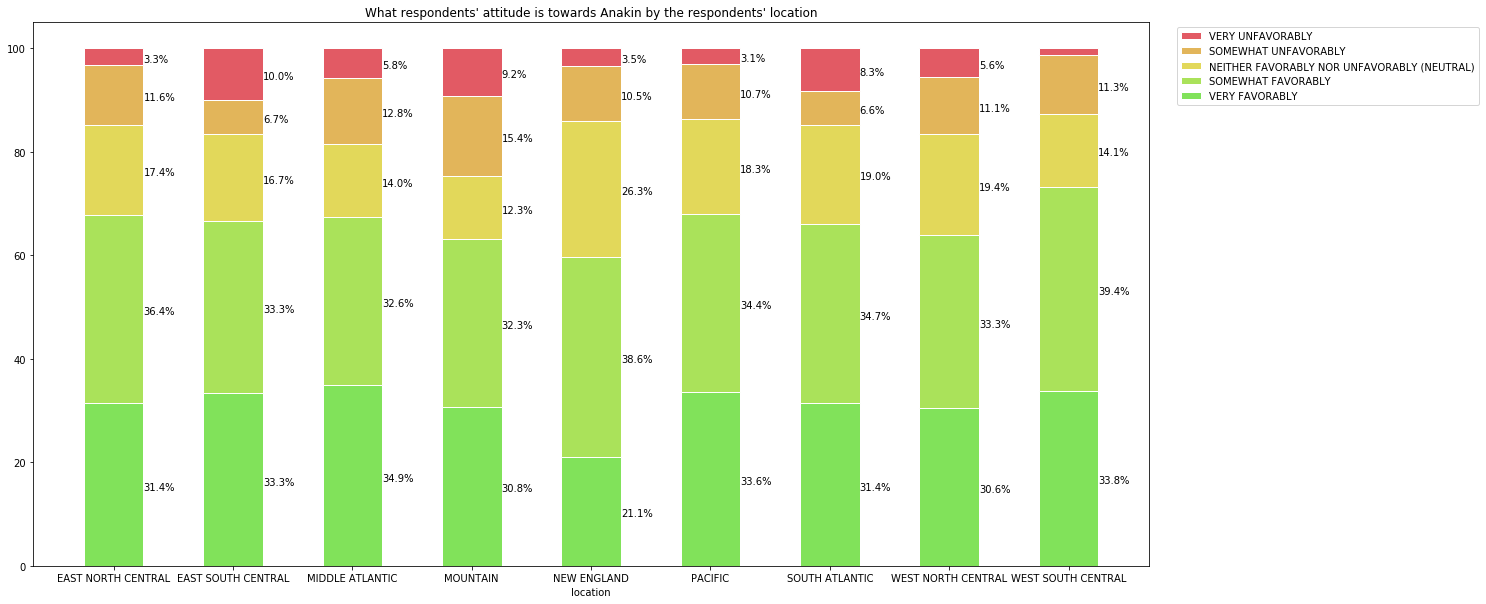

Affinity towards Obiwan


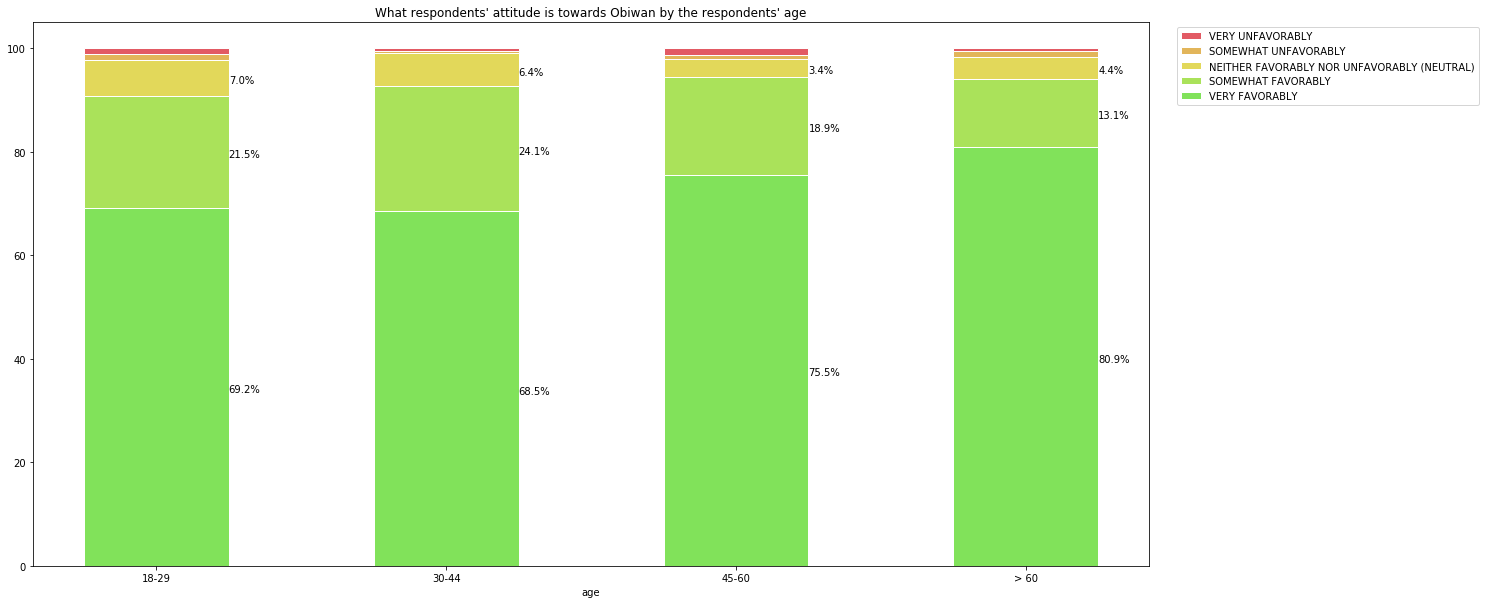

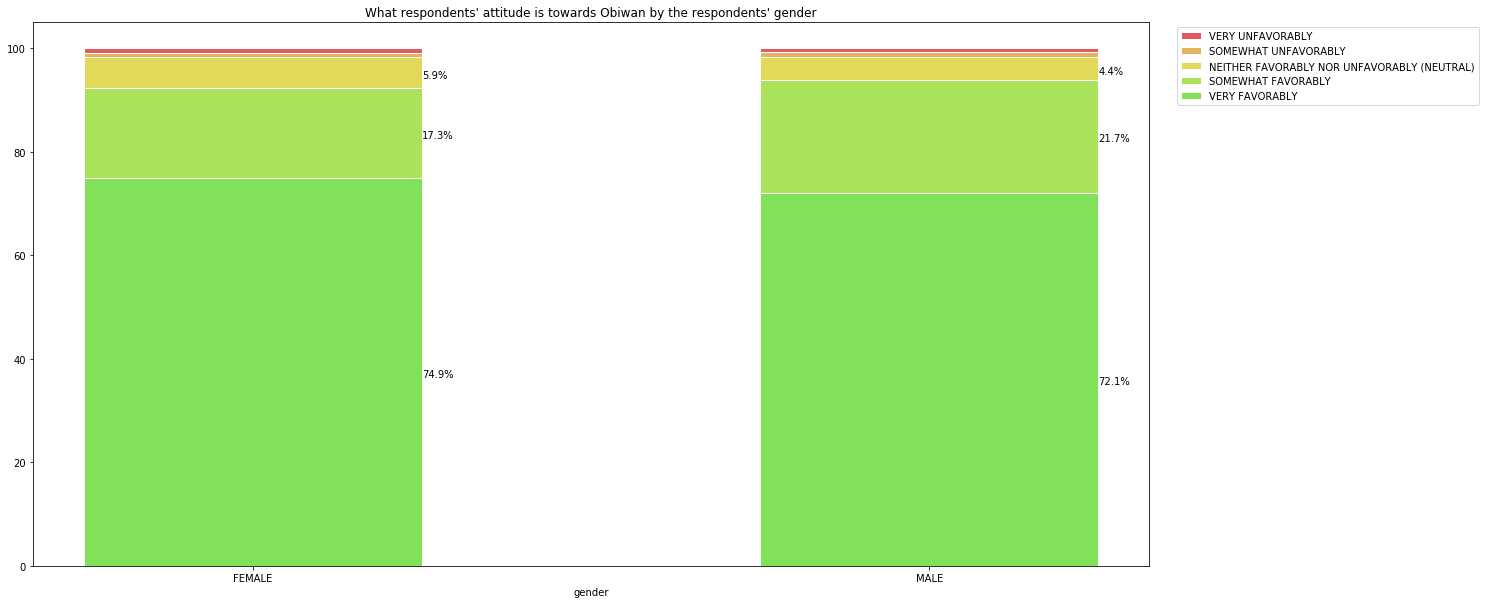

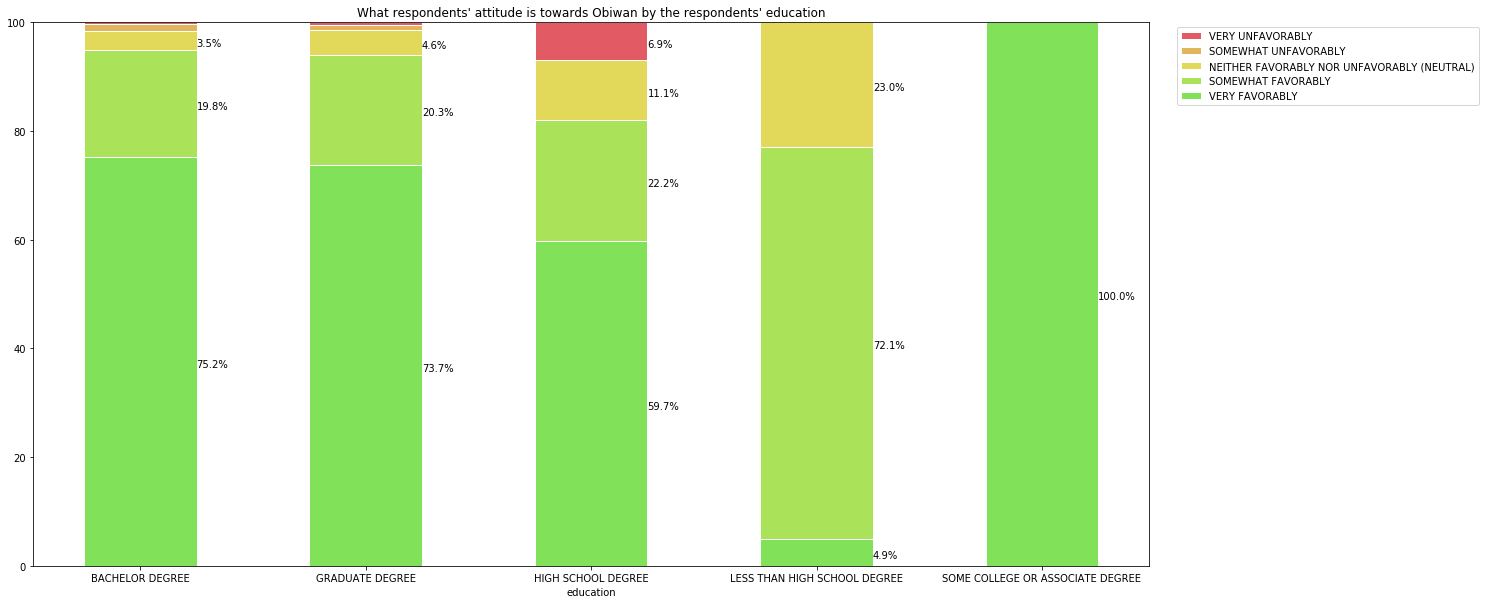

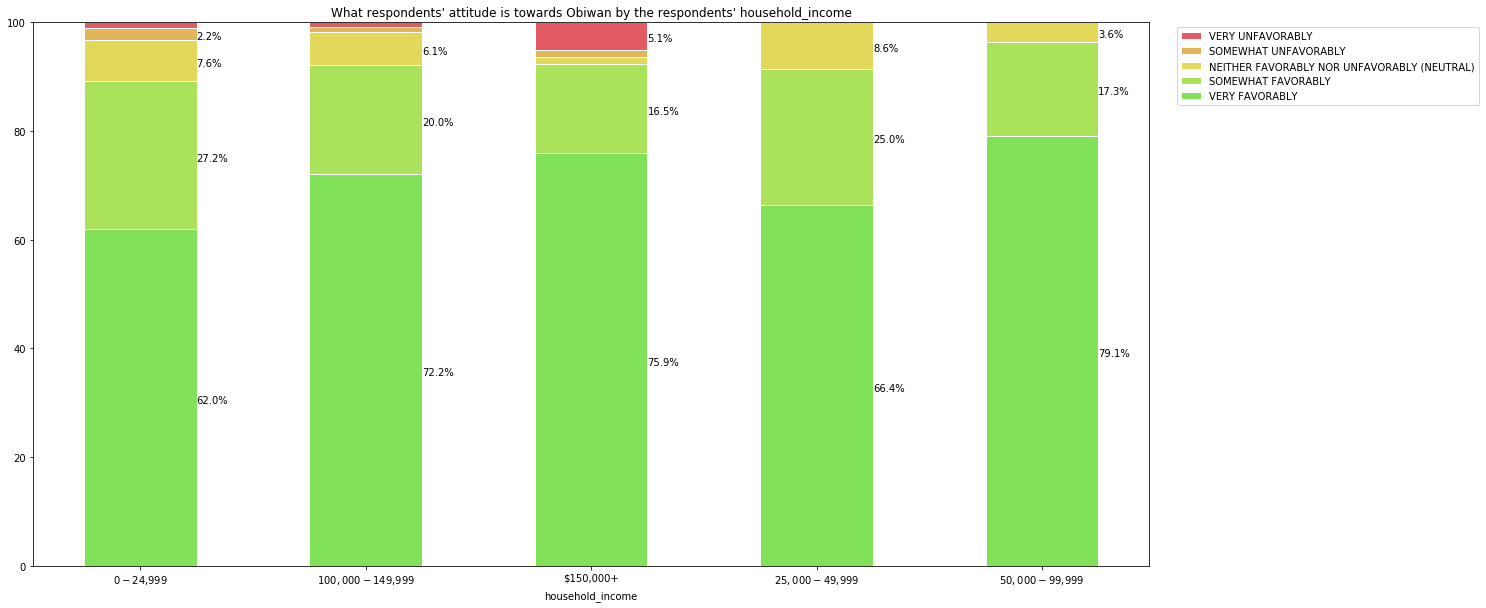

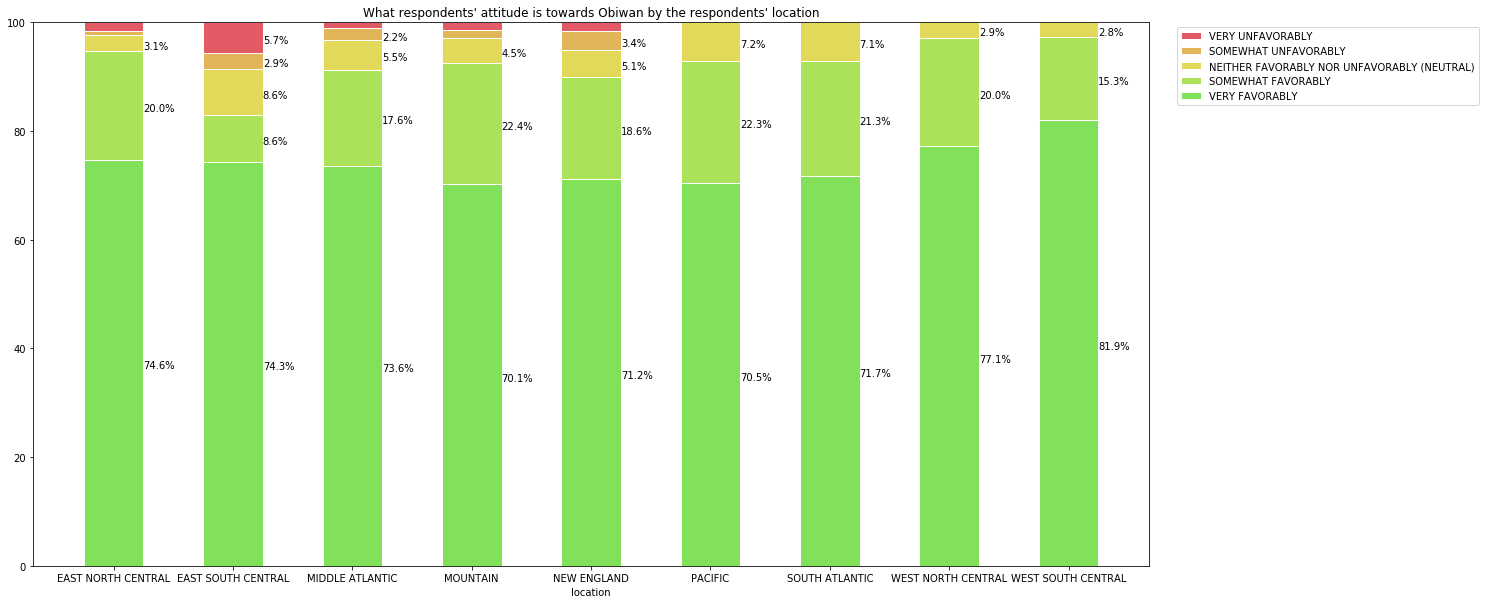

Affinity towards Palpatine


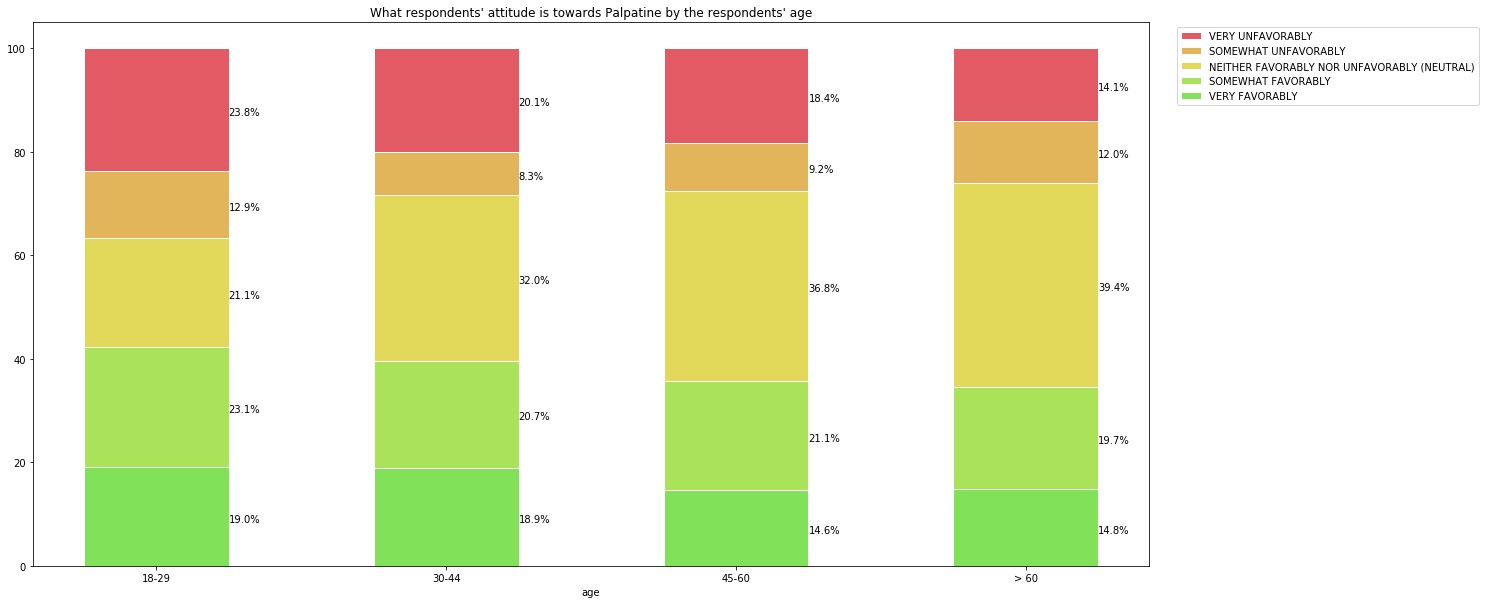

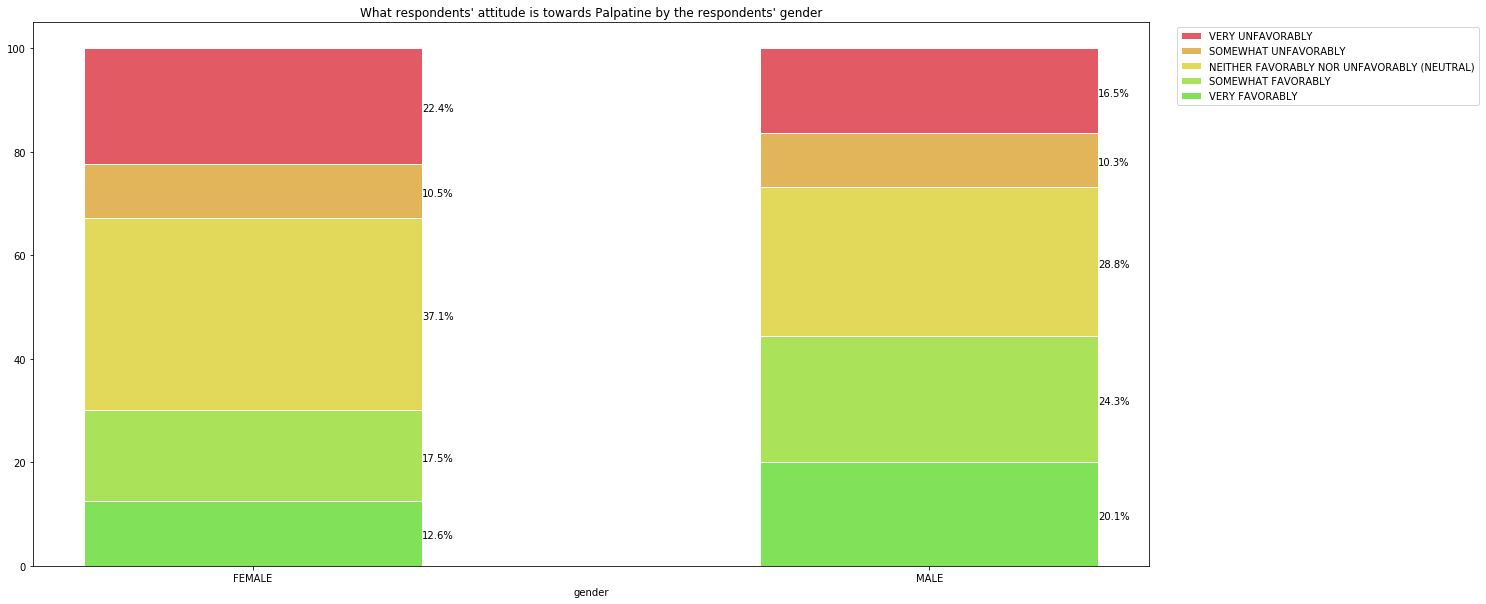

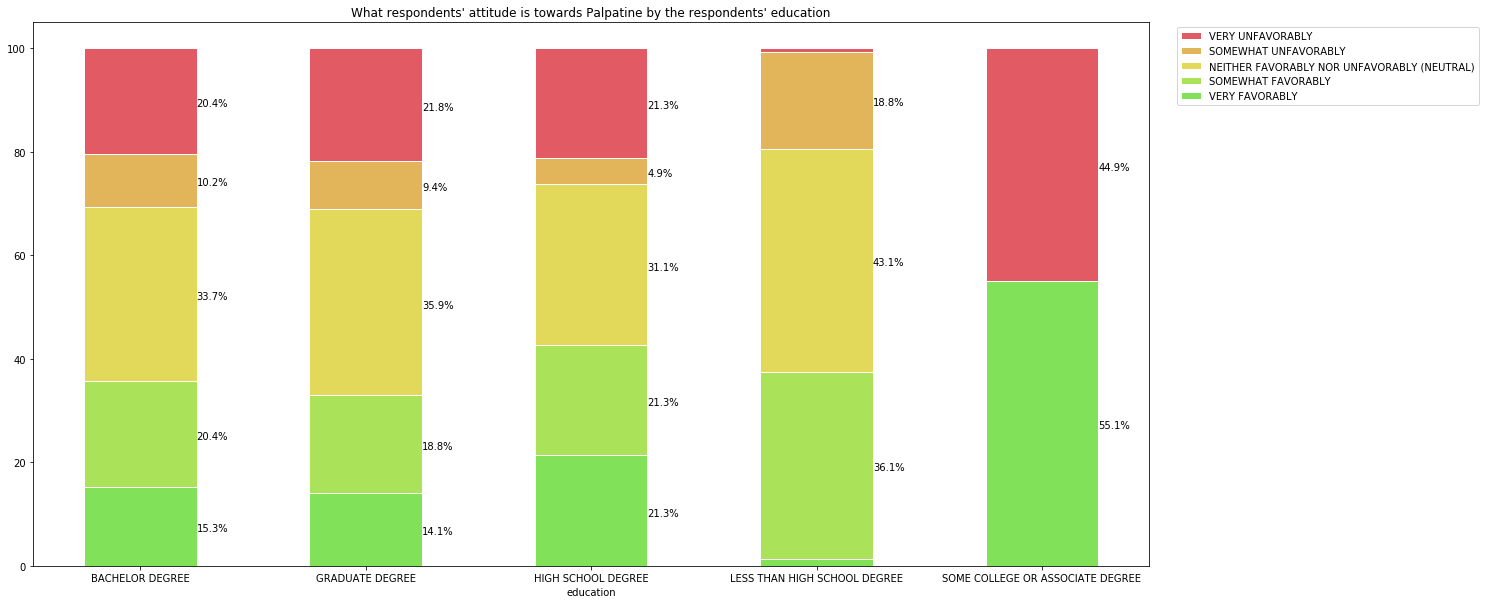

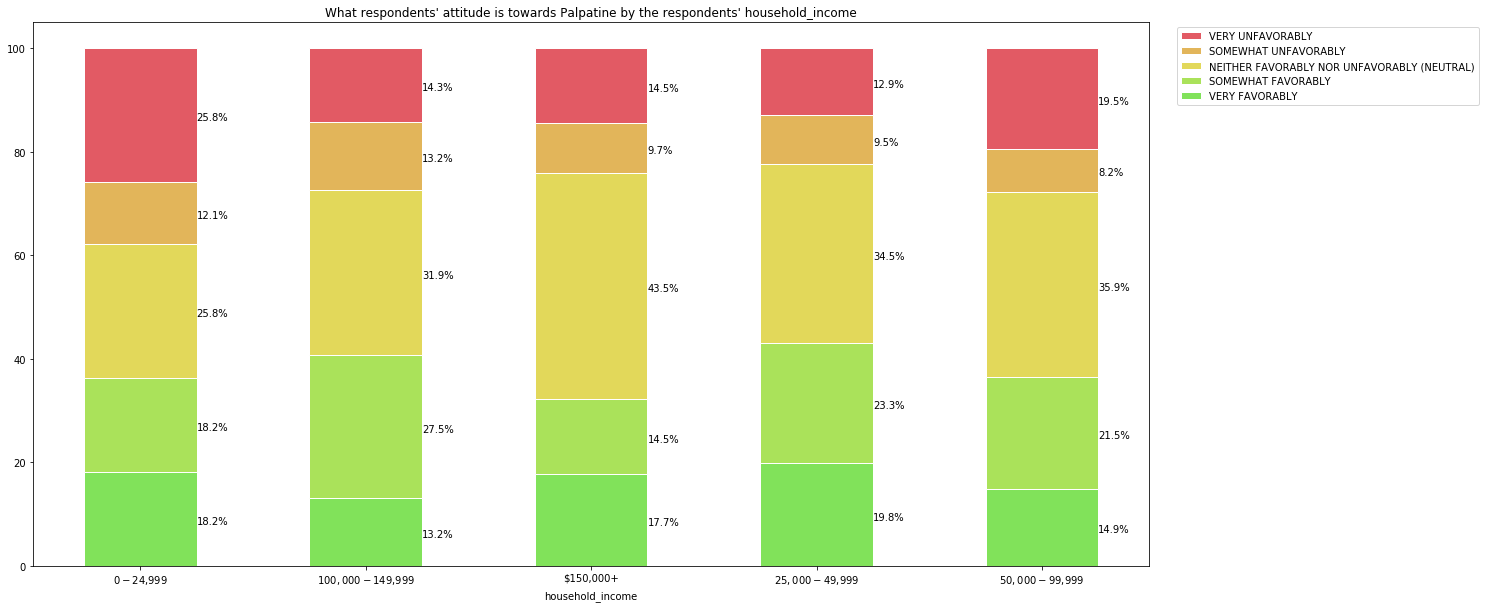

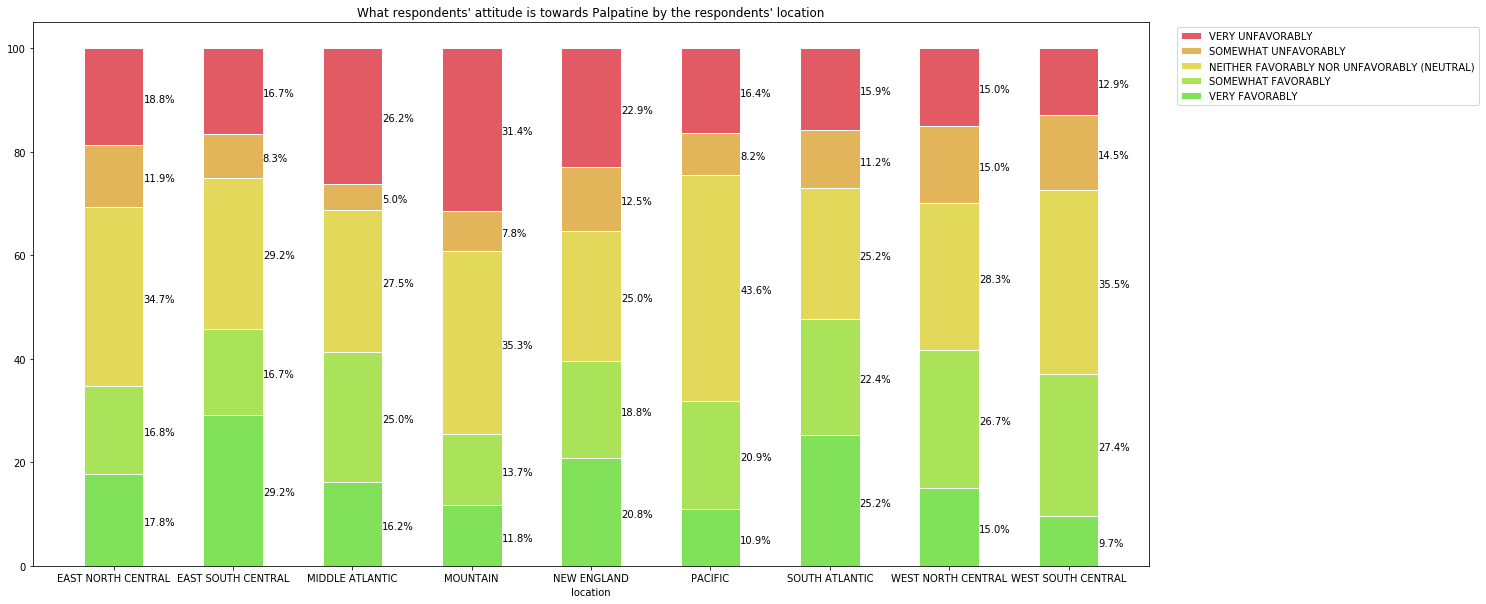

Affinity towards Vader


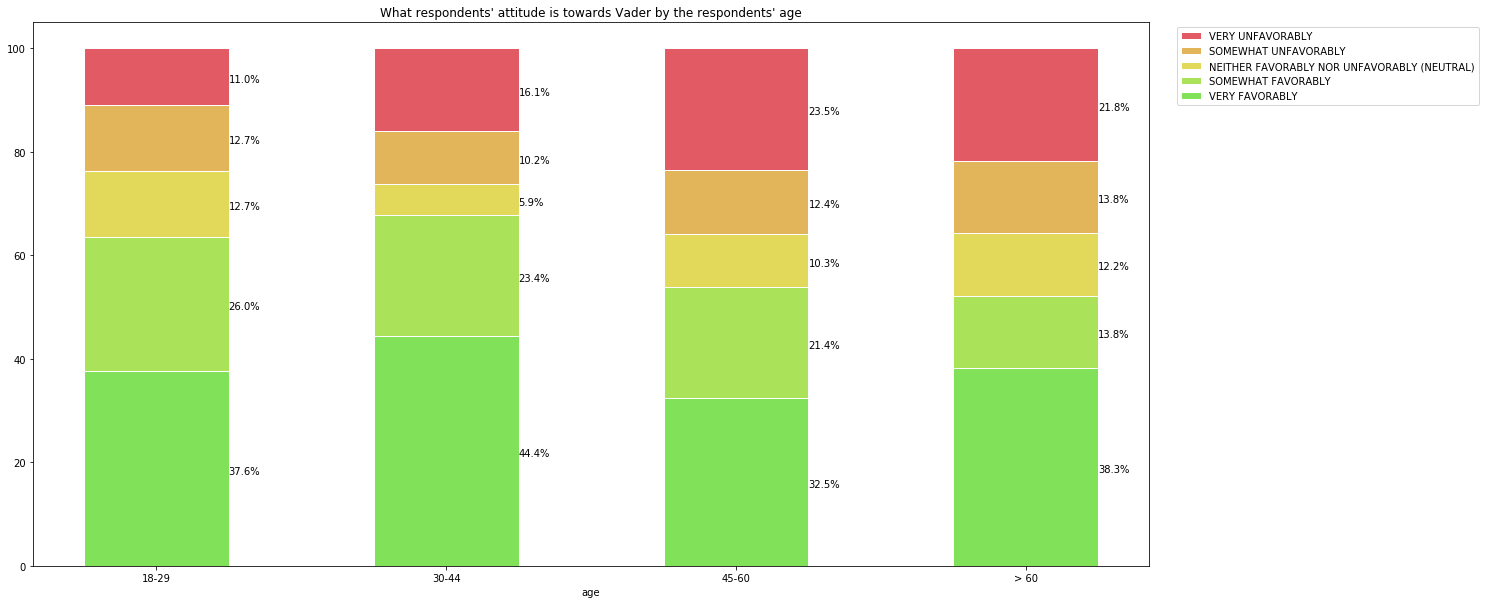

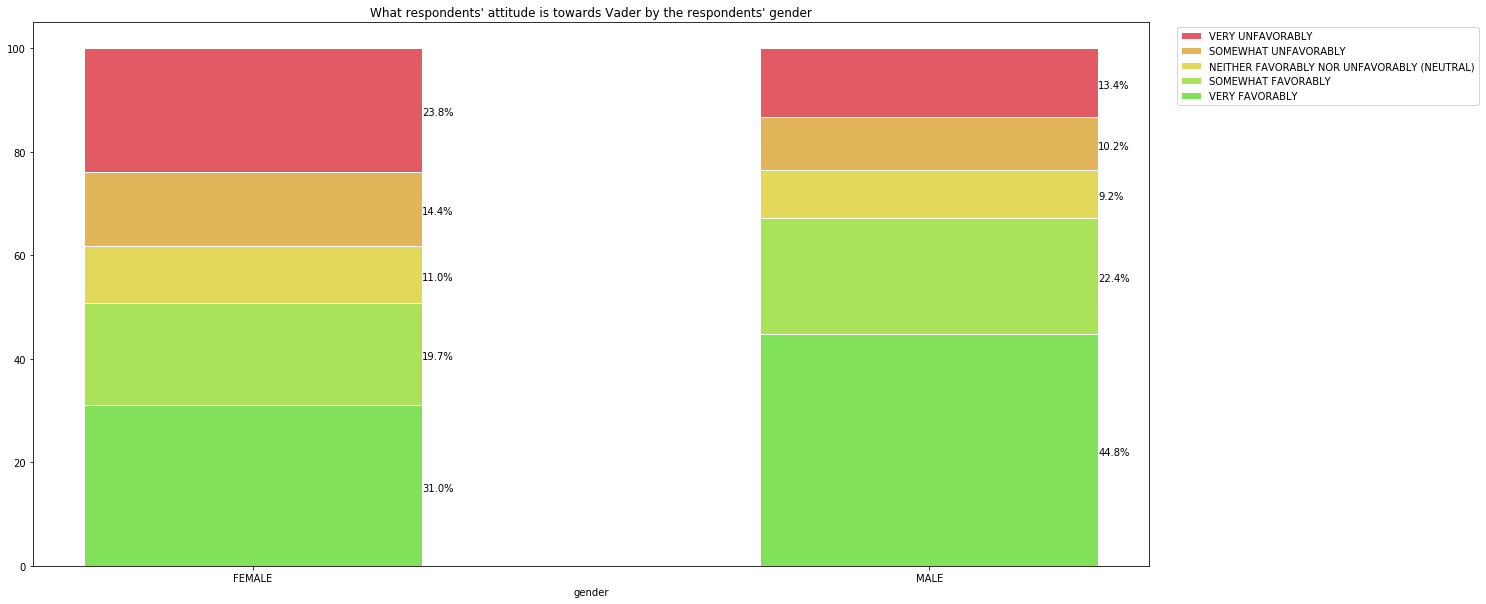

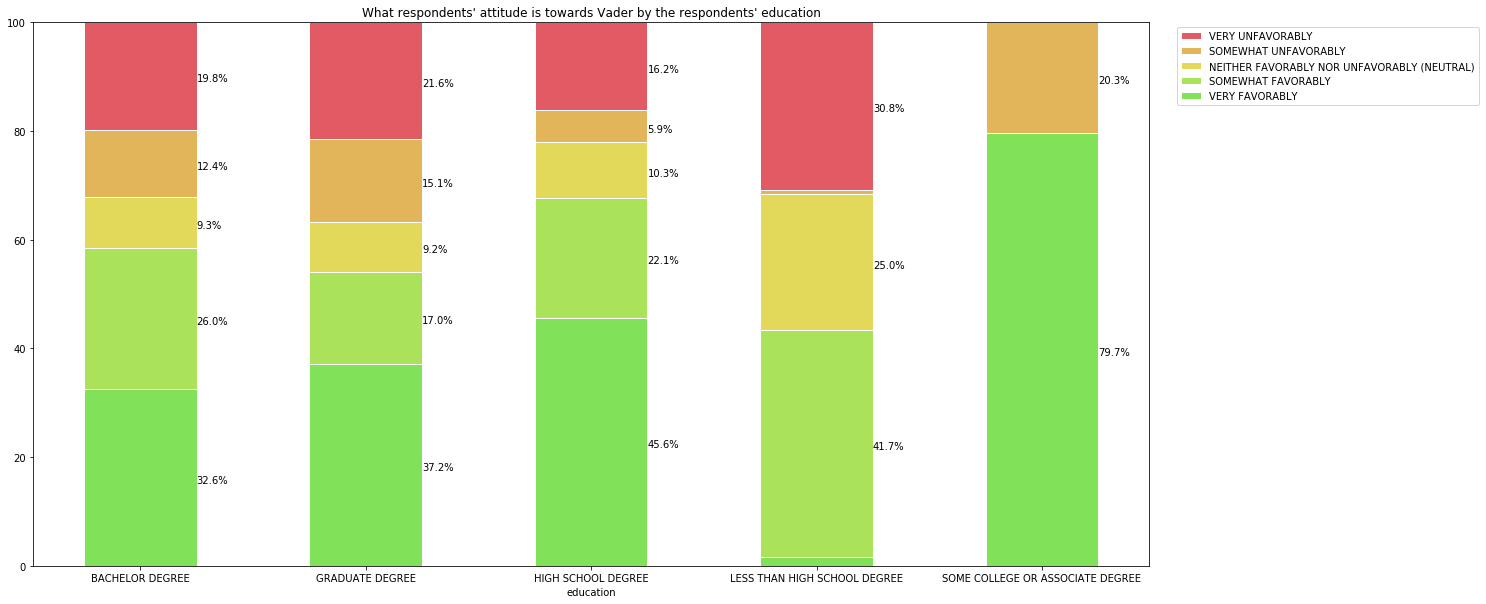

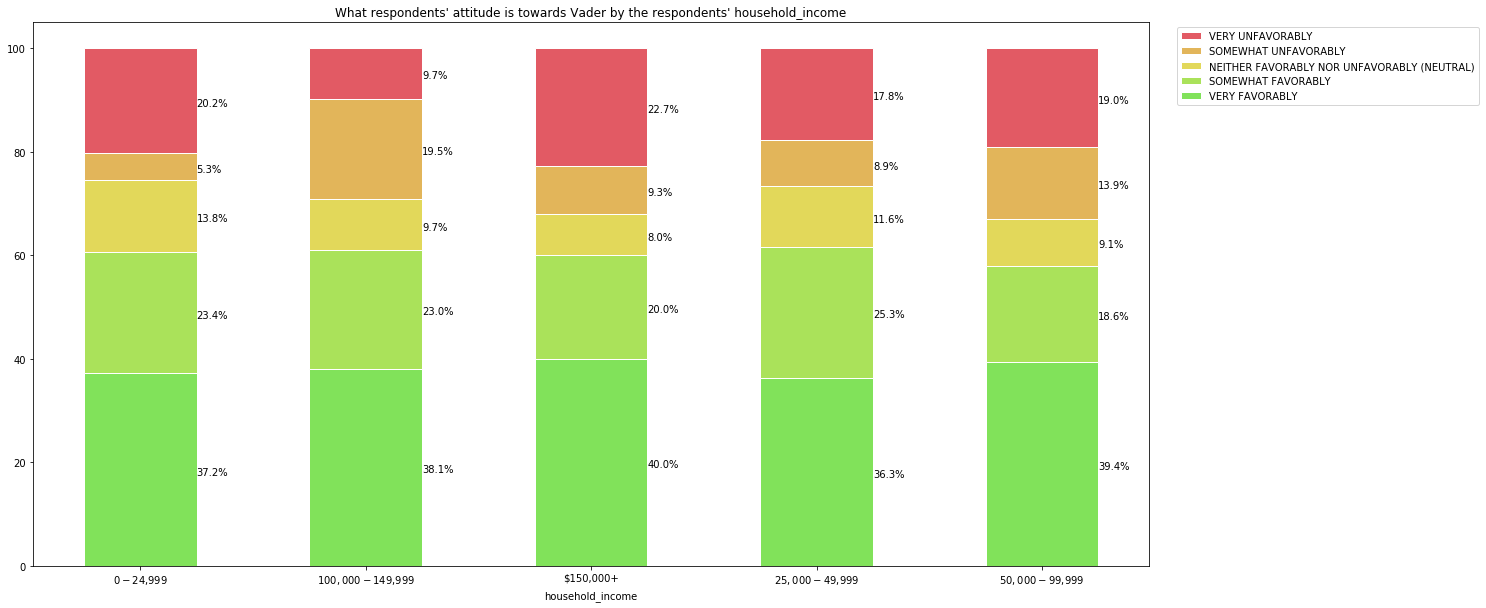

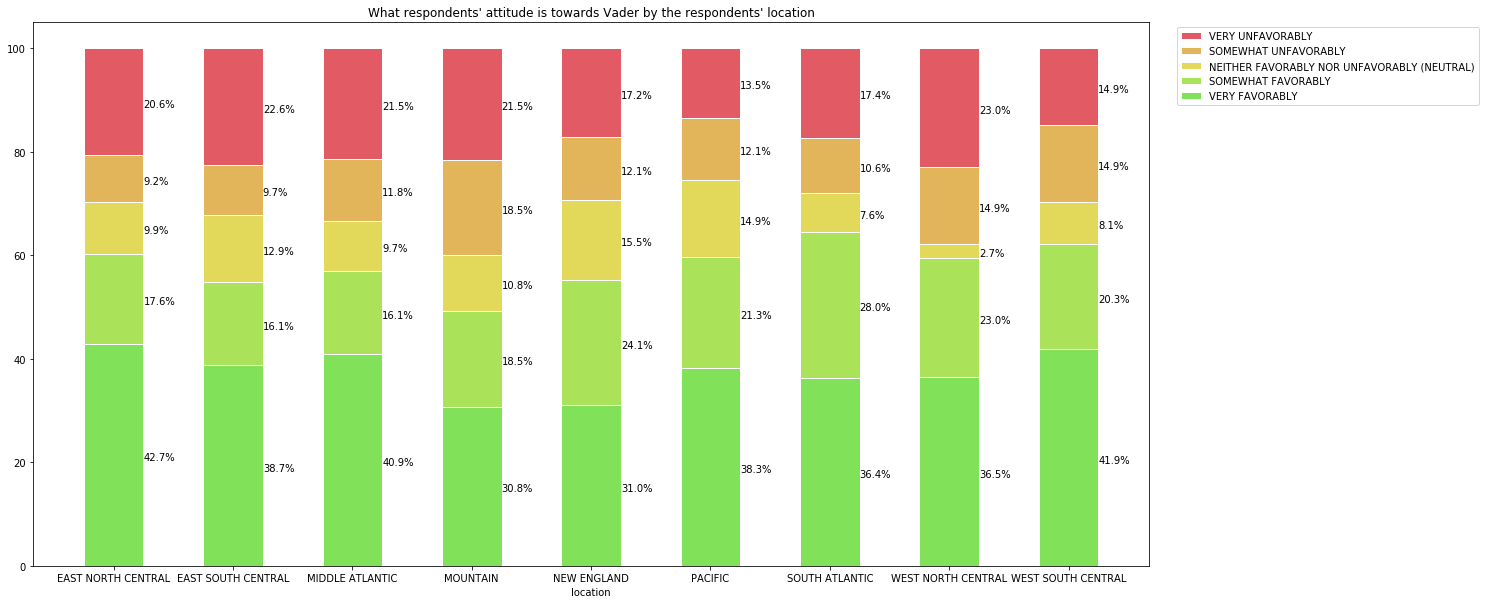

Affinity towards Lando


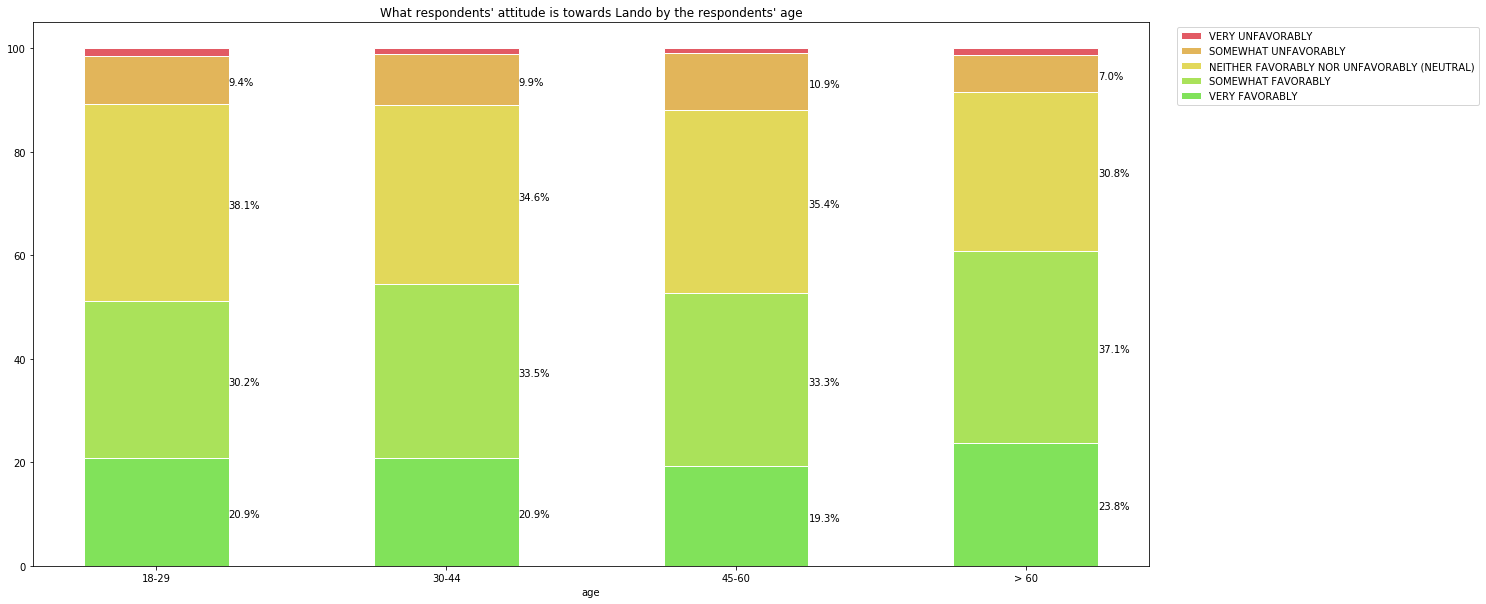

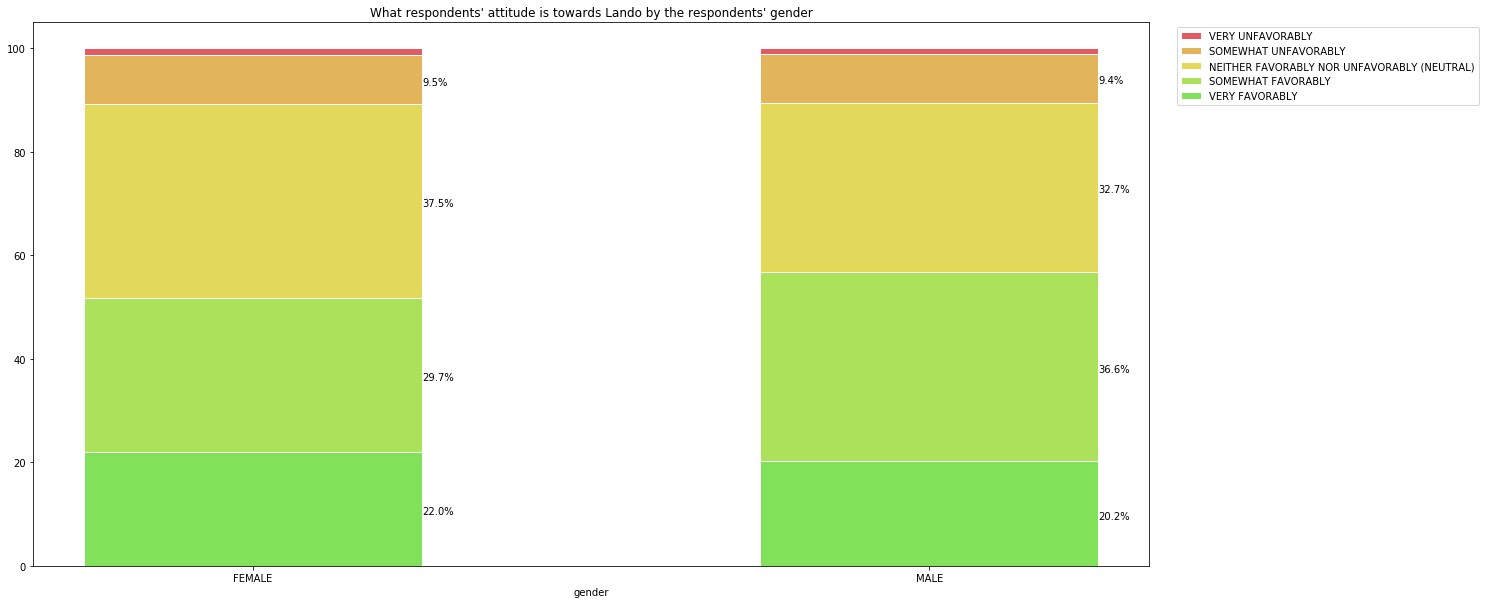

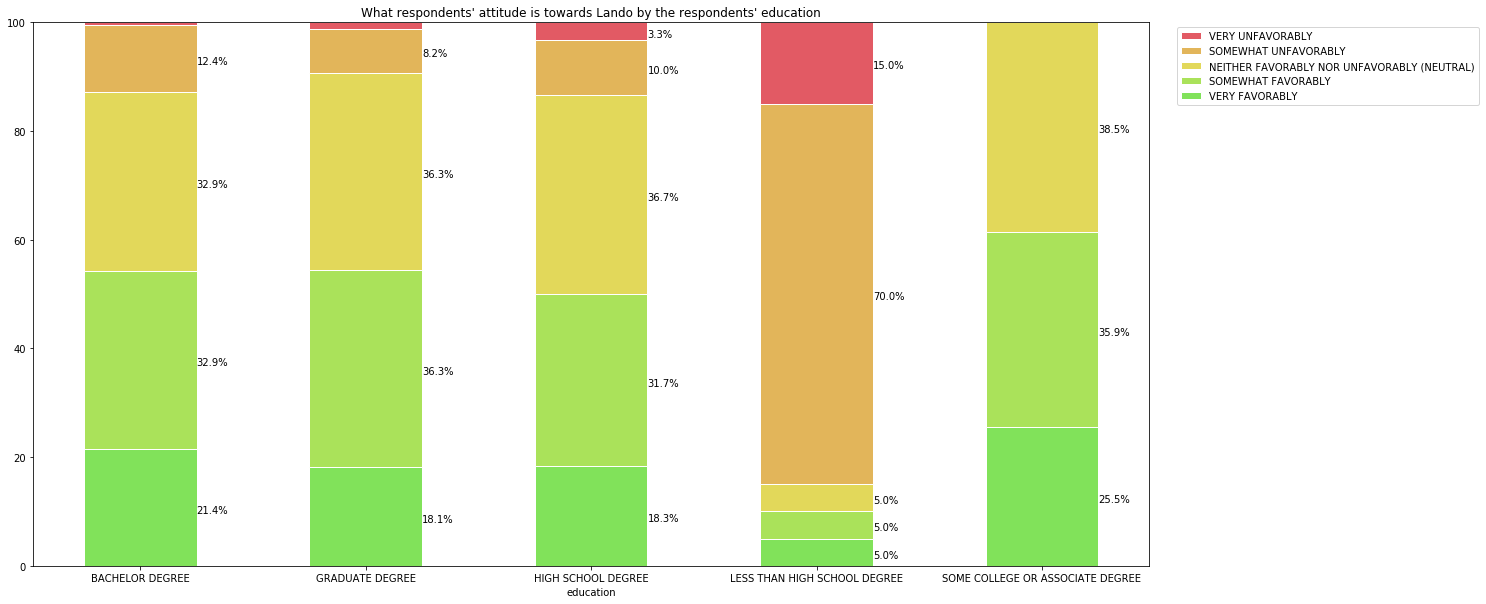

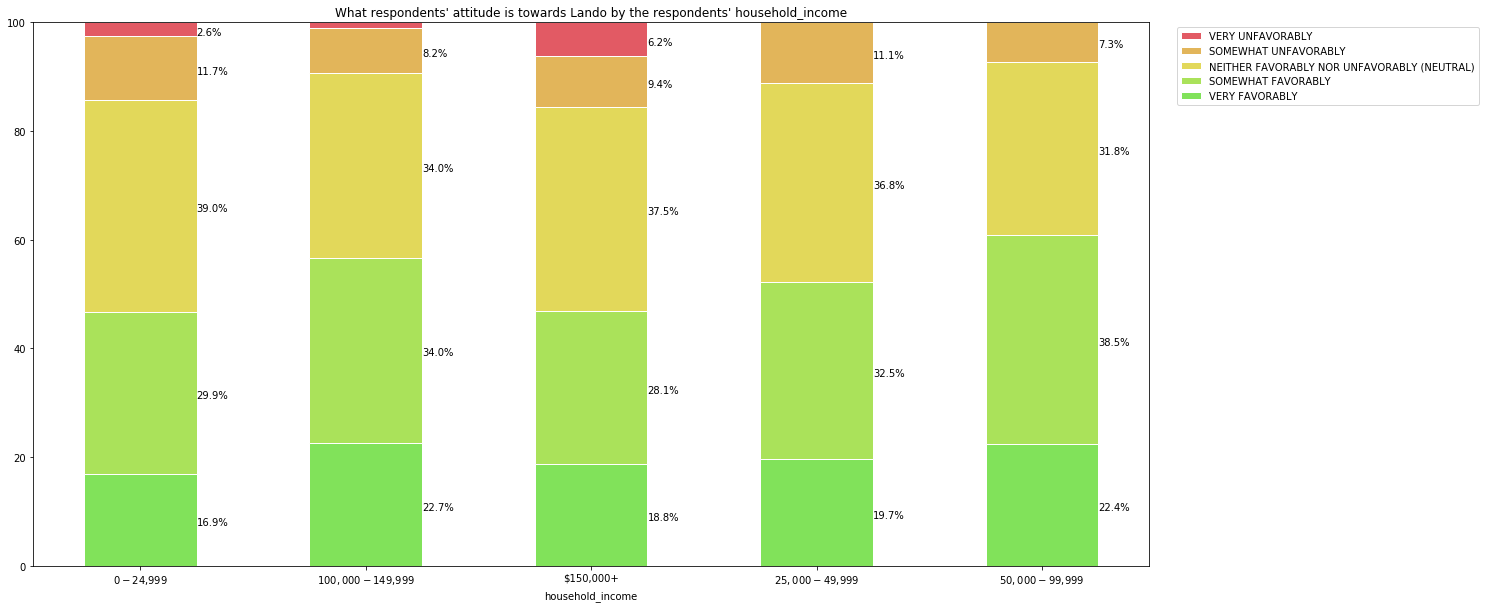

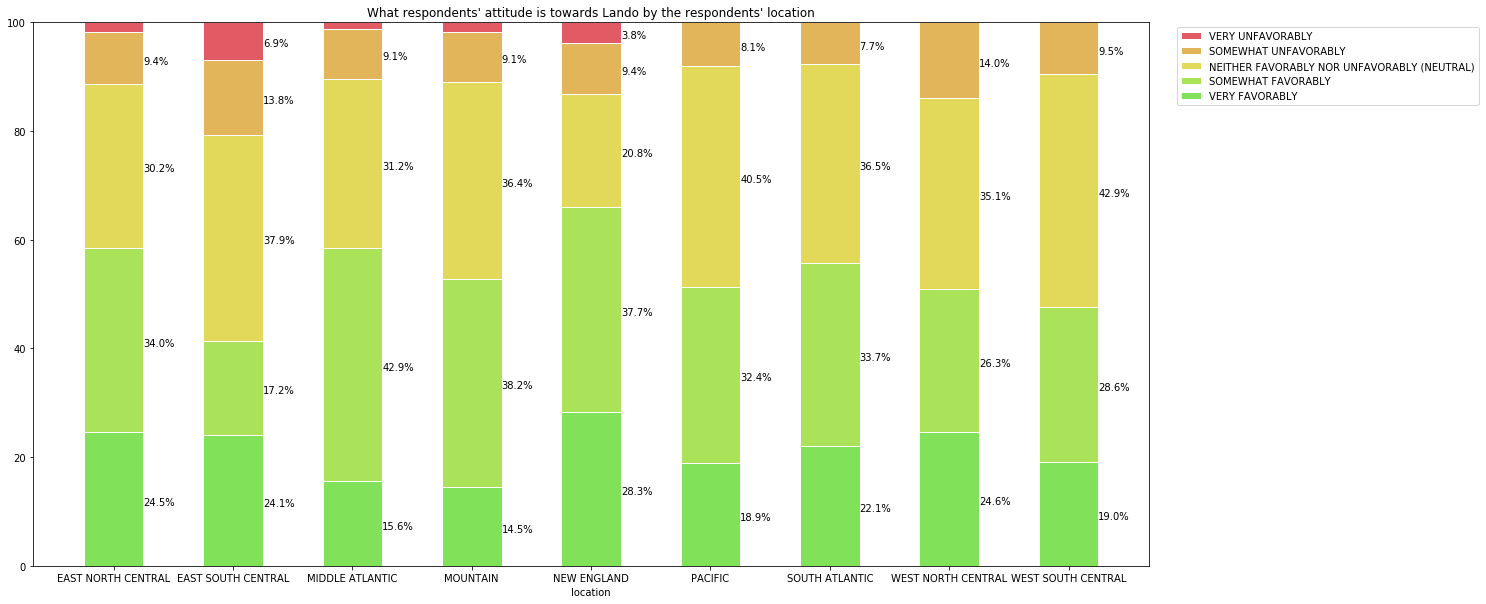

Affinity towards Bobafett


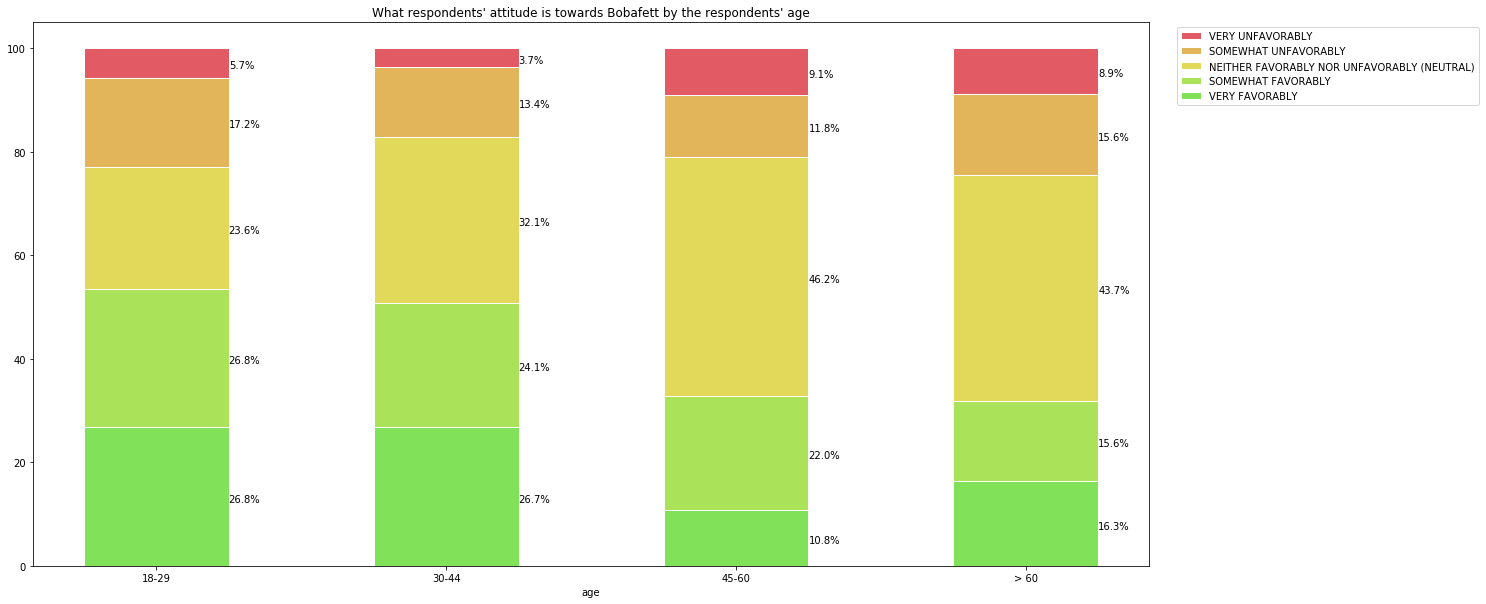

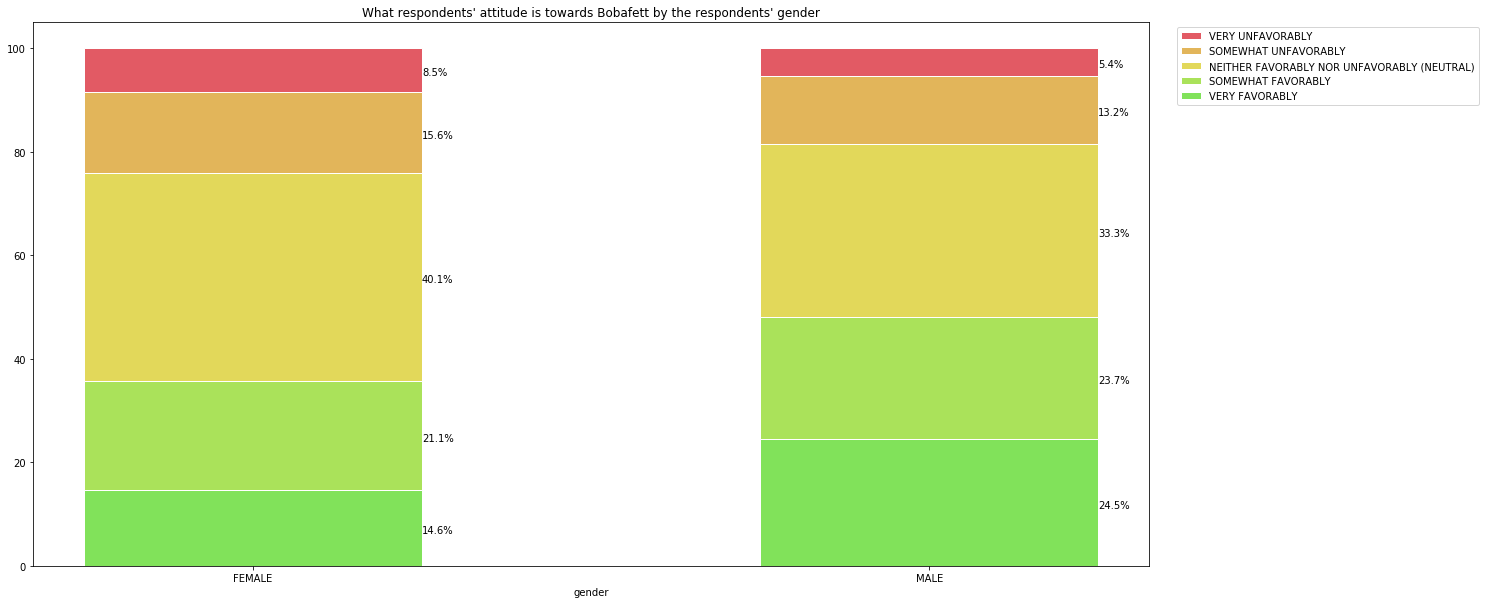

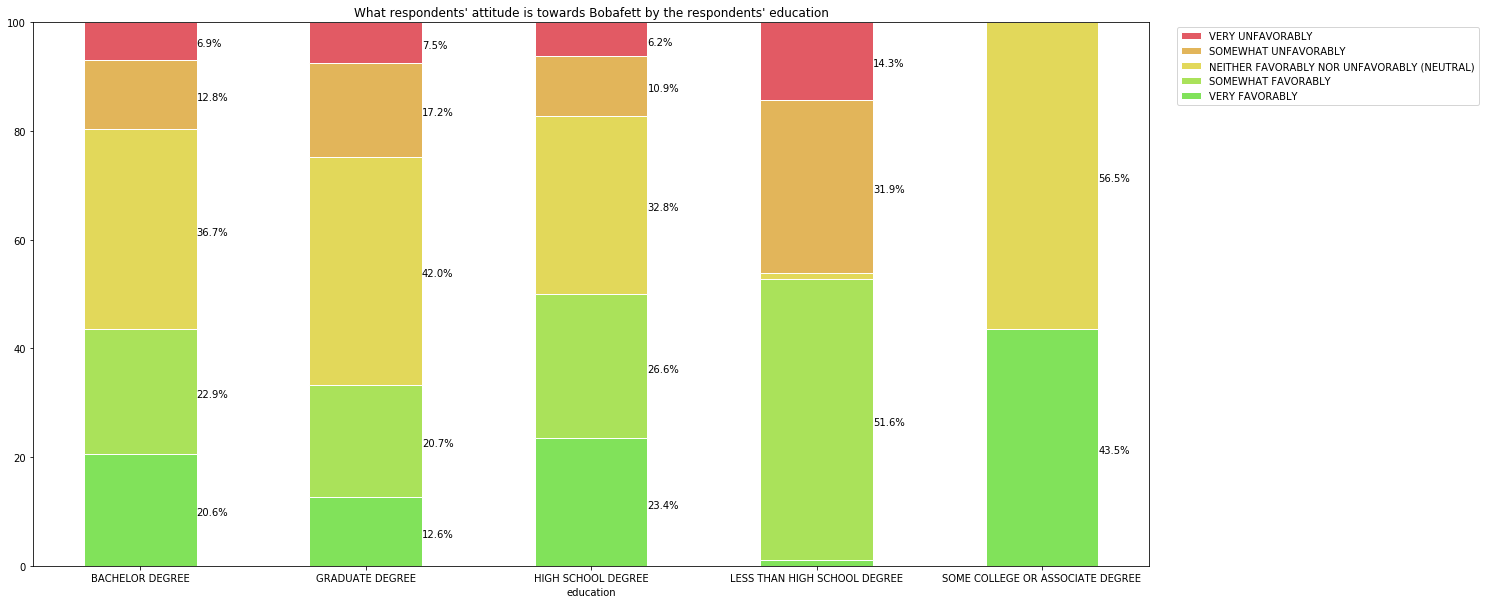

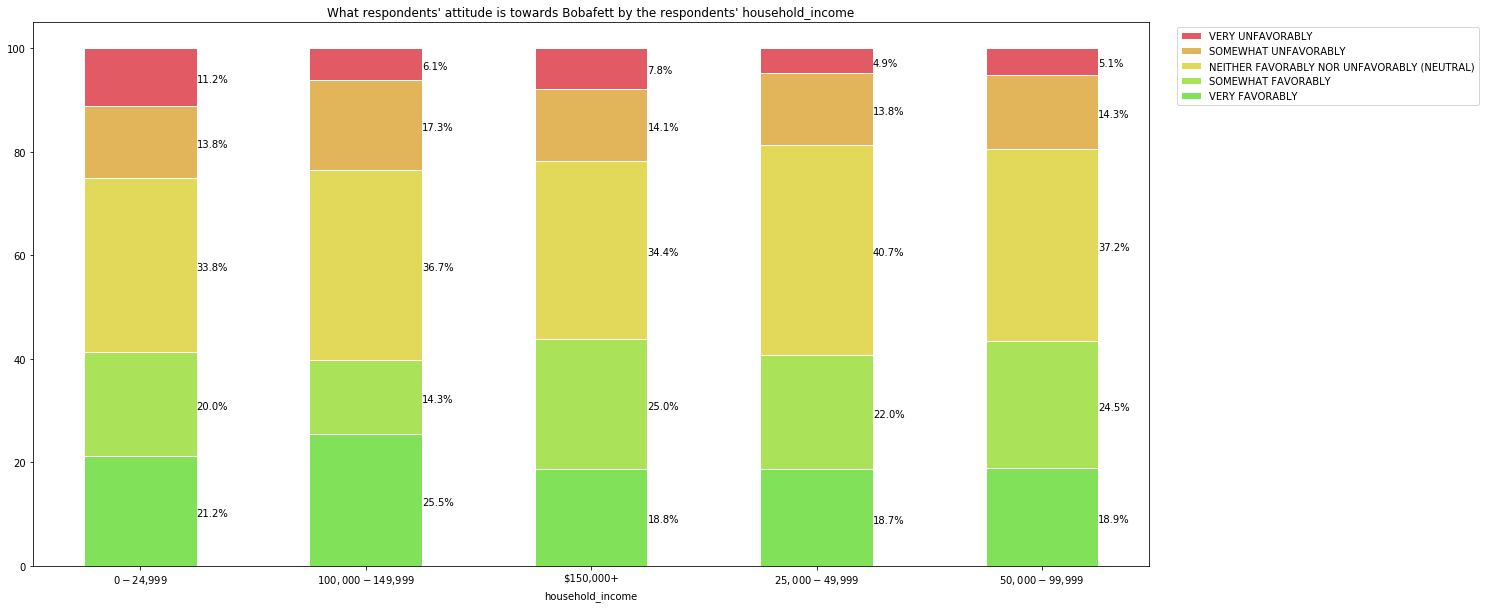

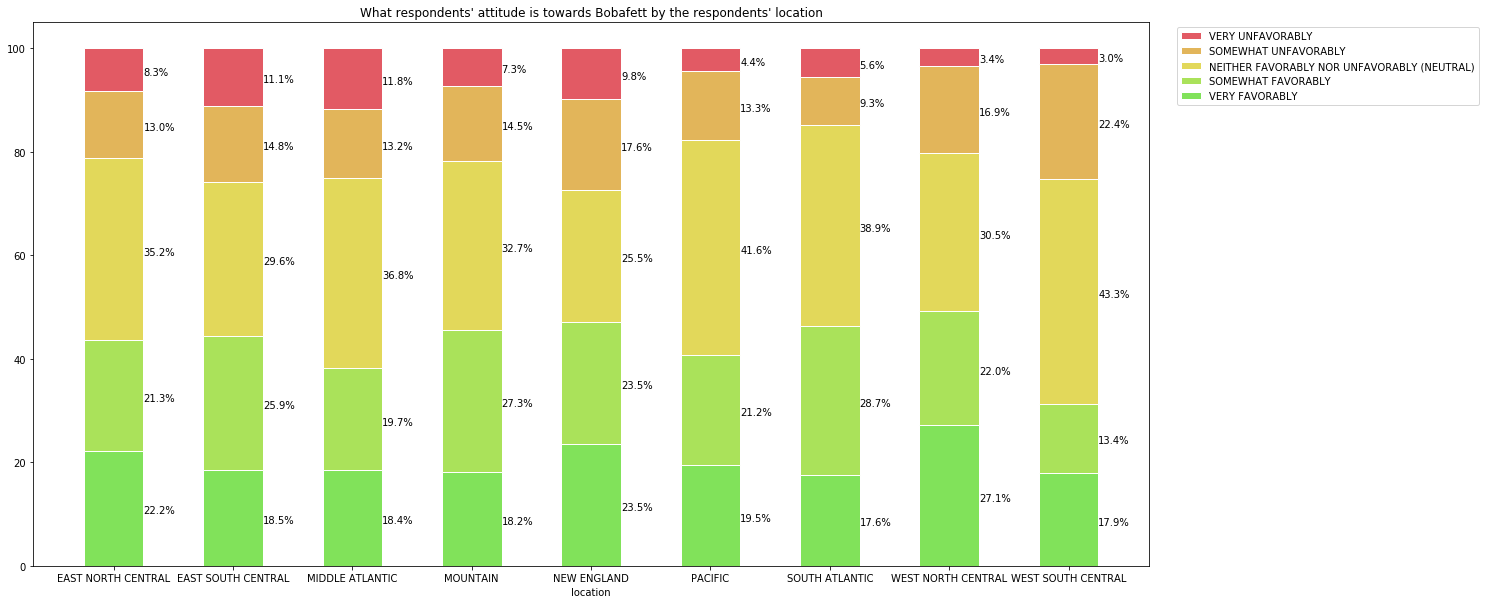

Affinity towards C3p0


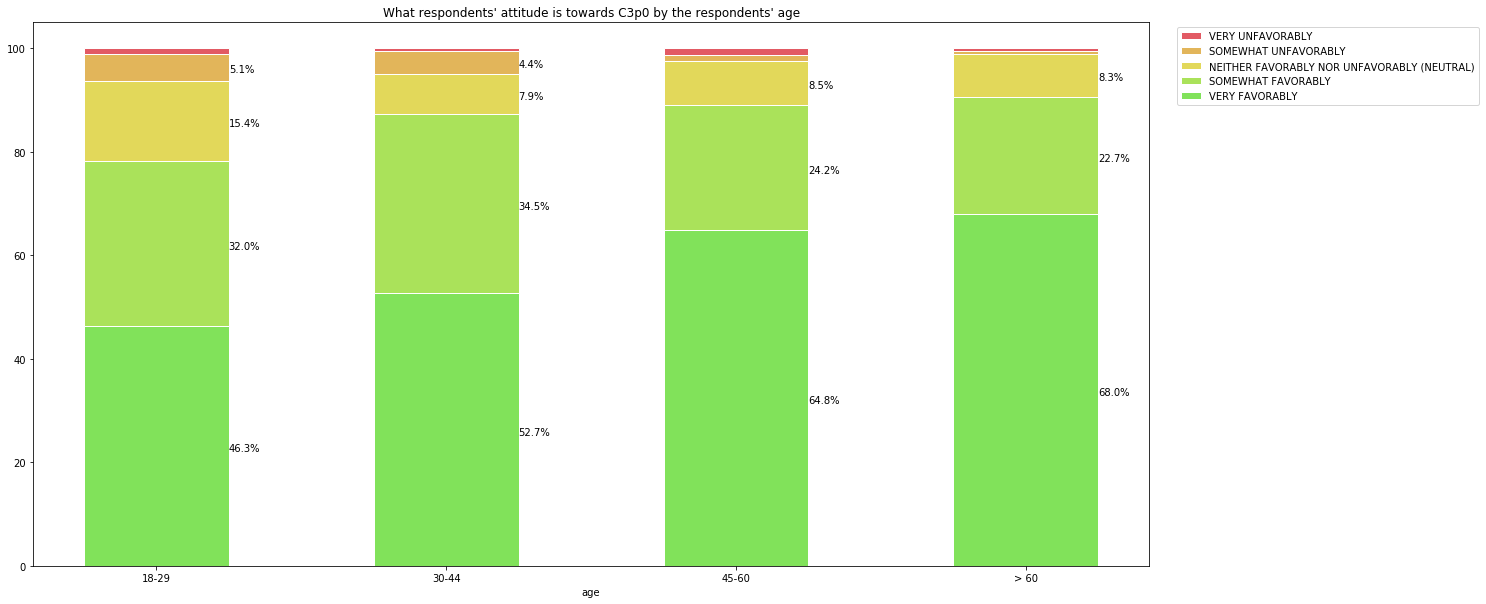

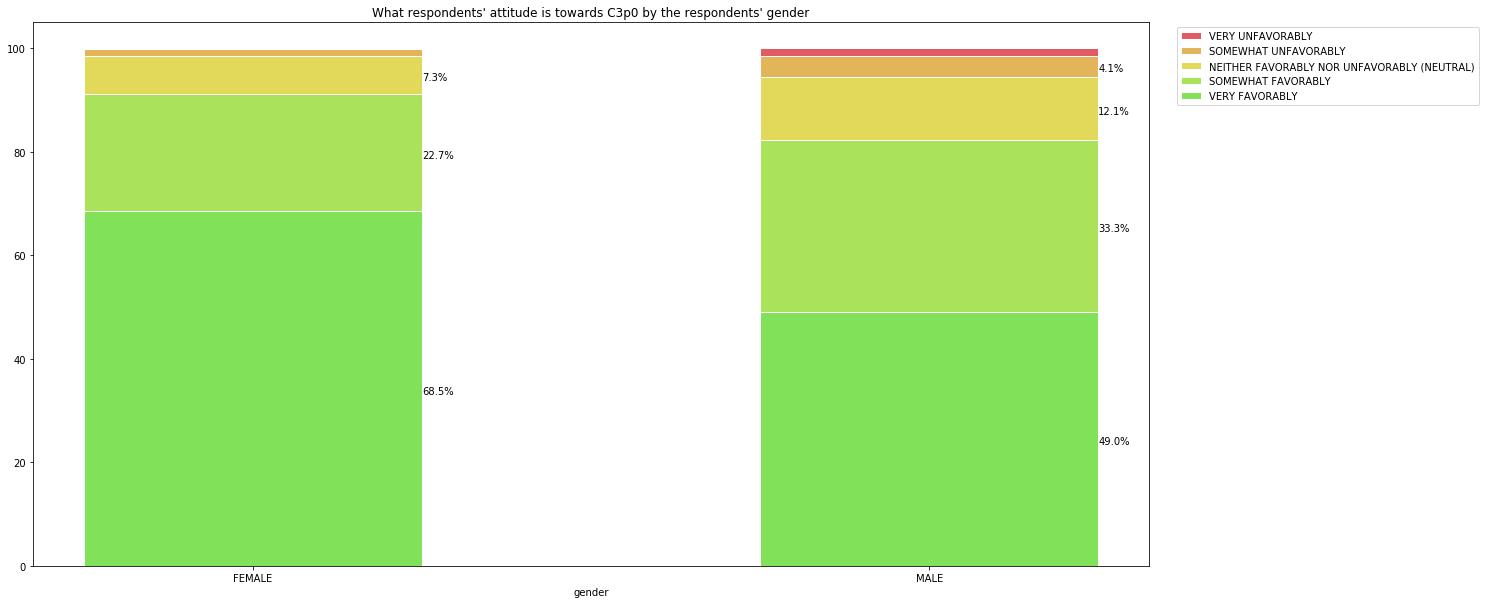

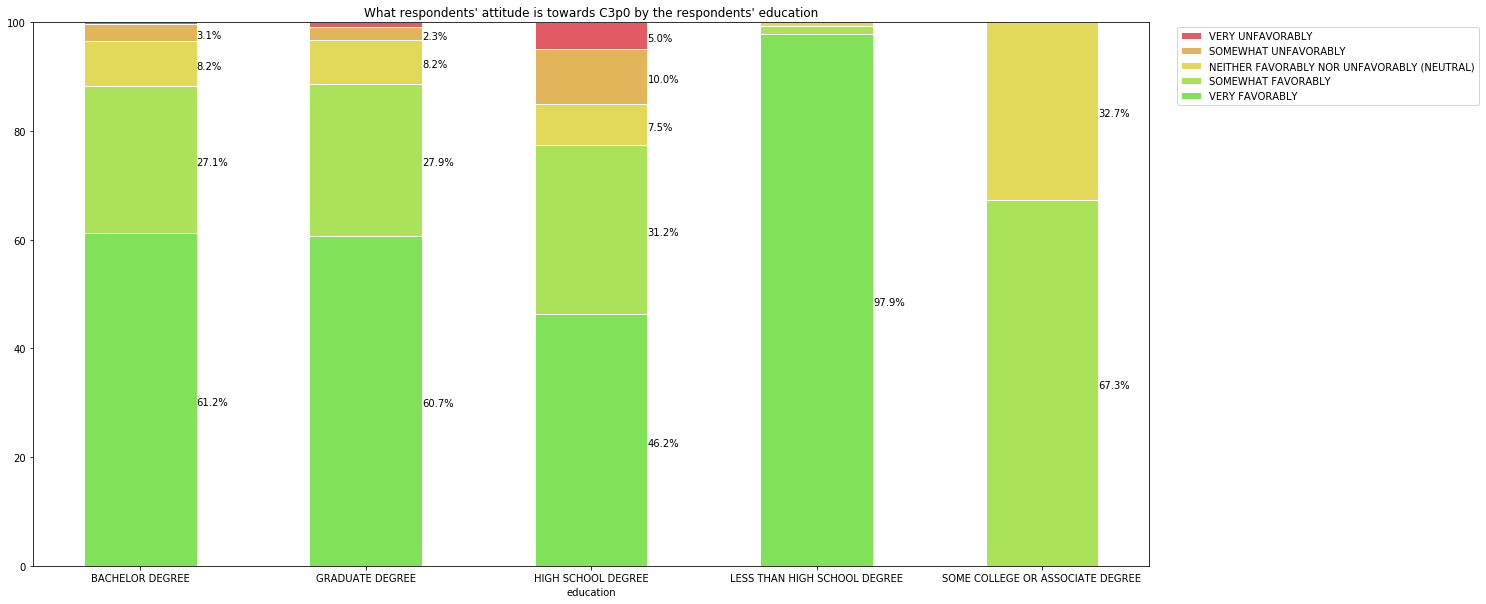

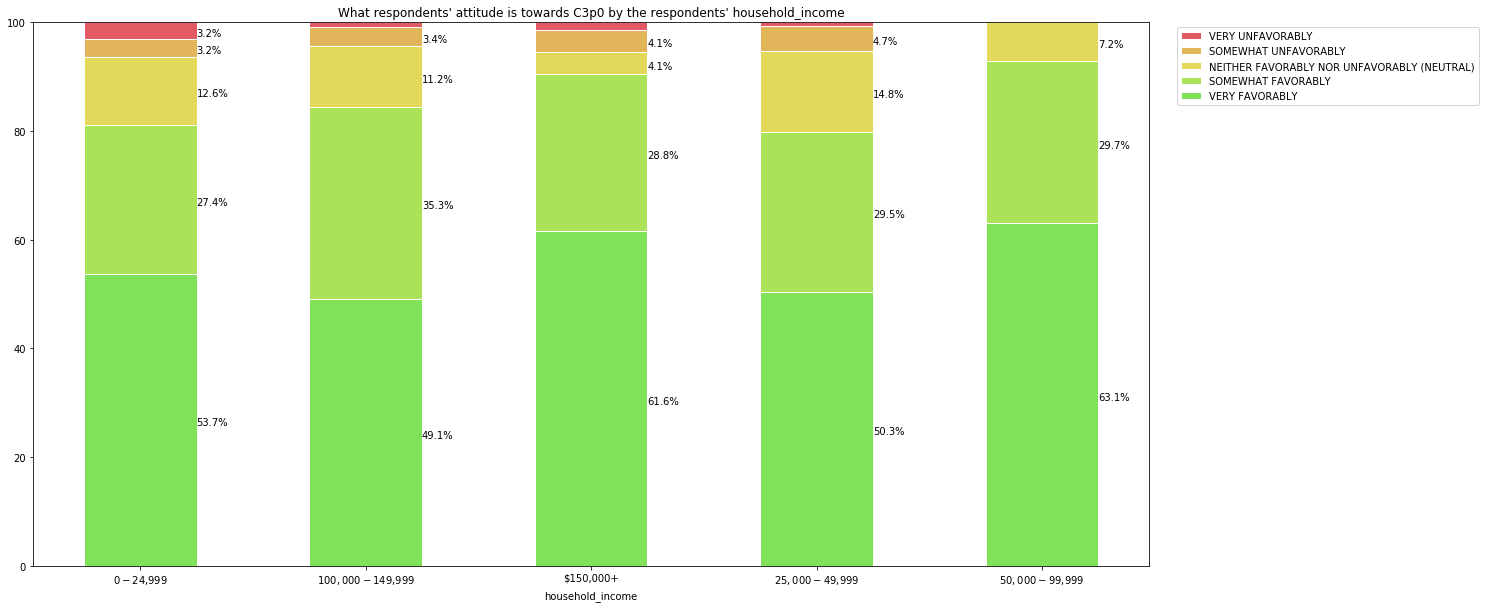

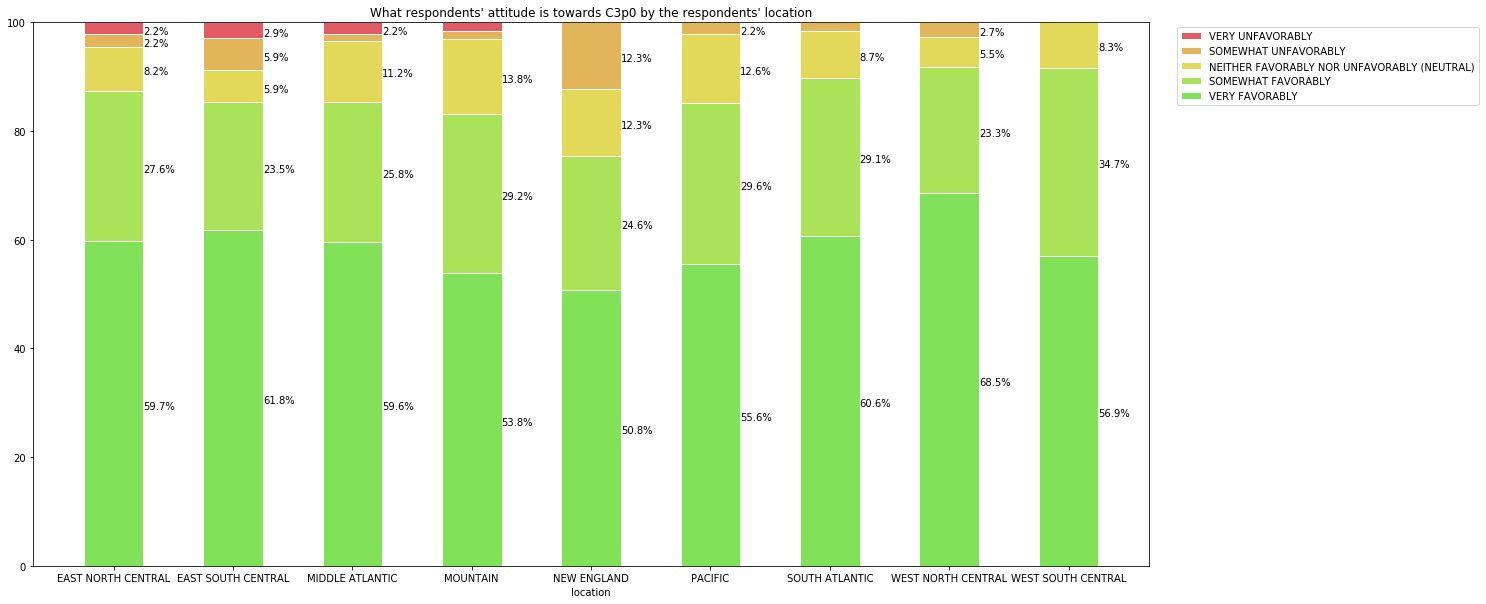

Affinity towards R2d2


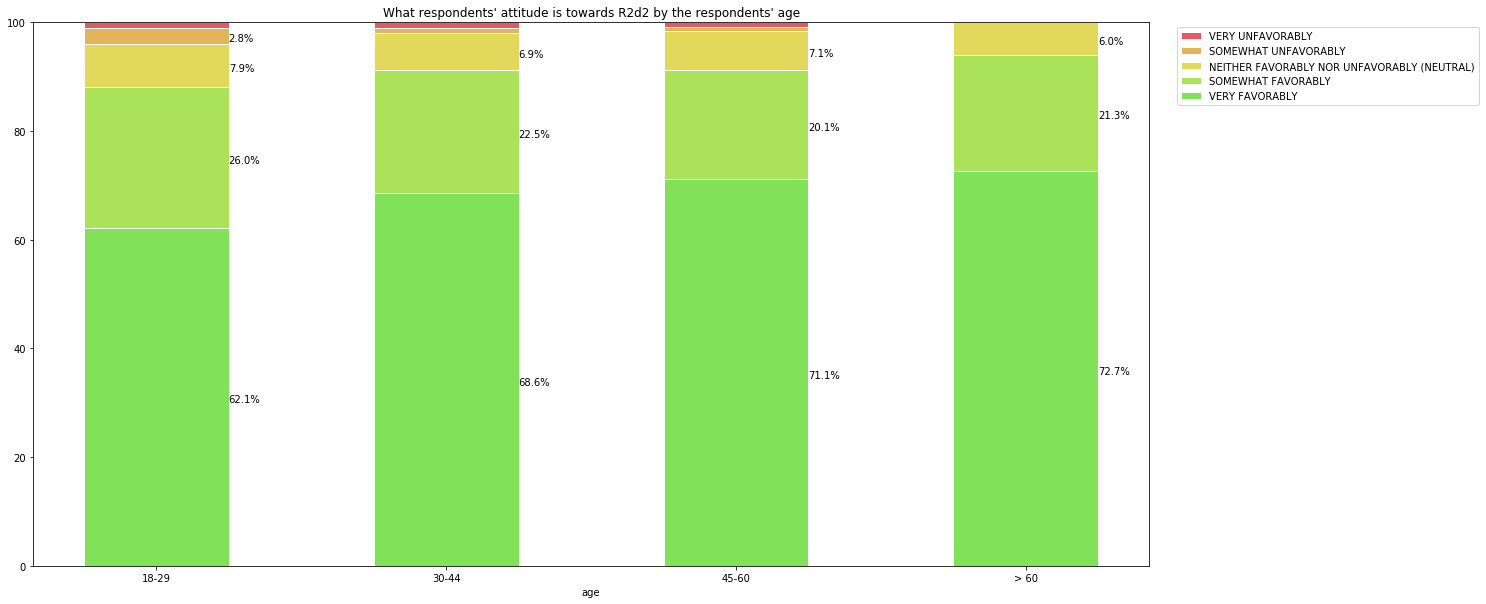

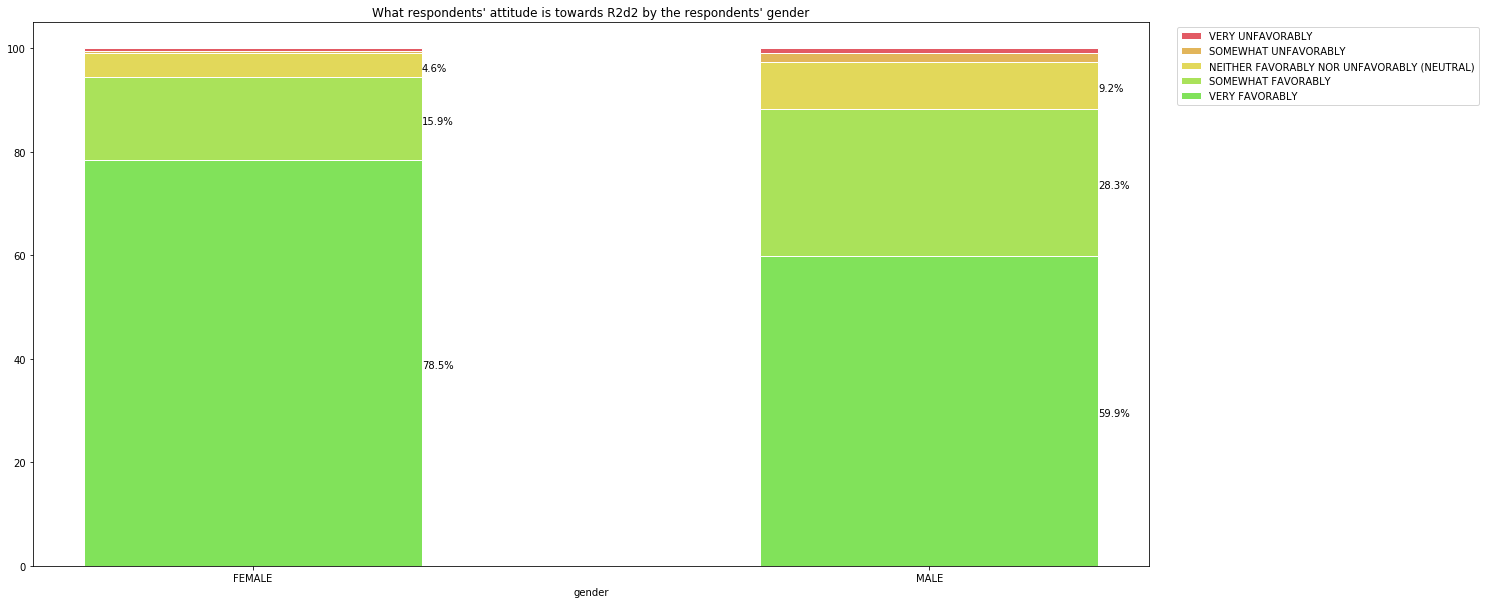

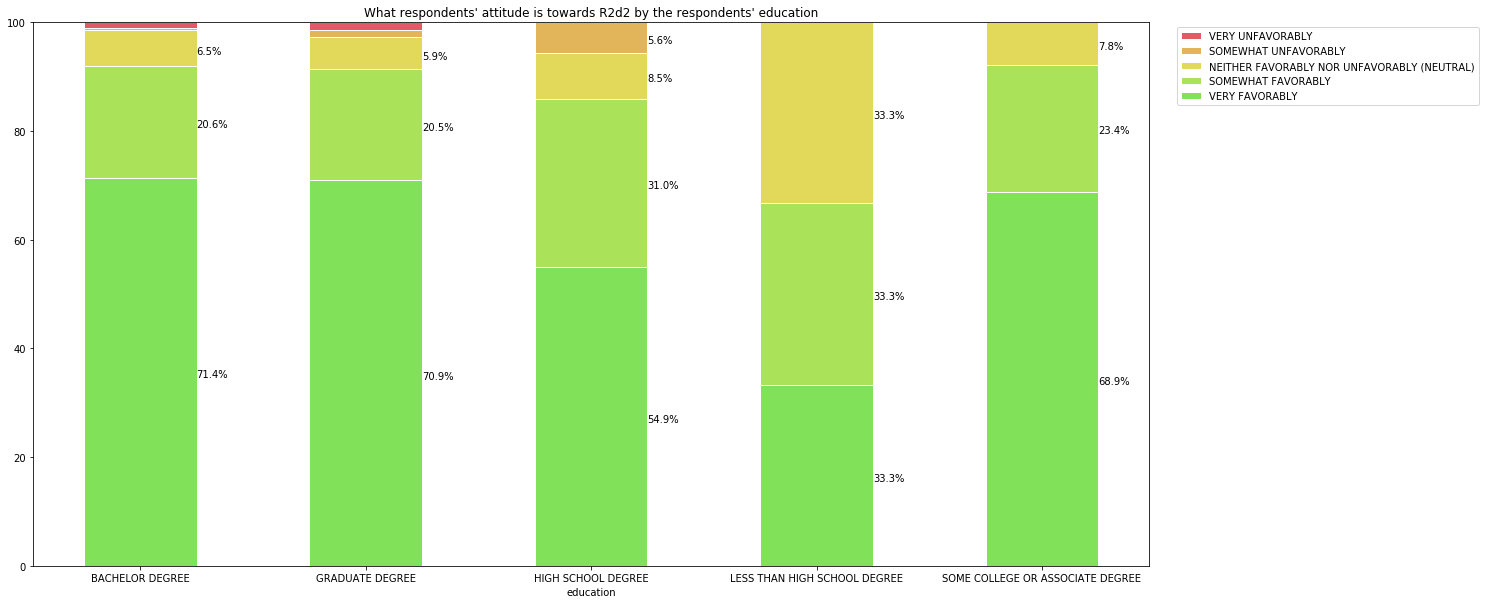

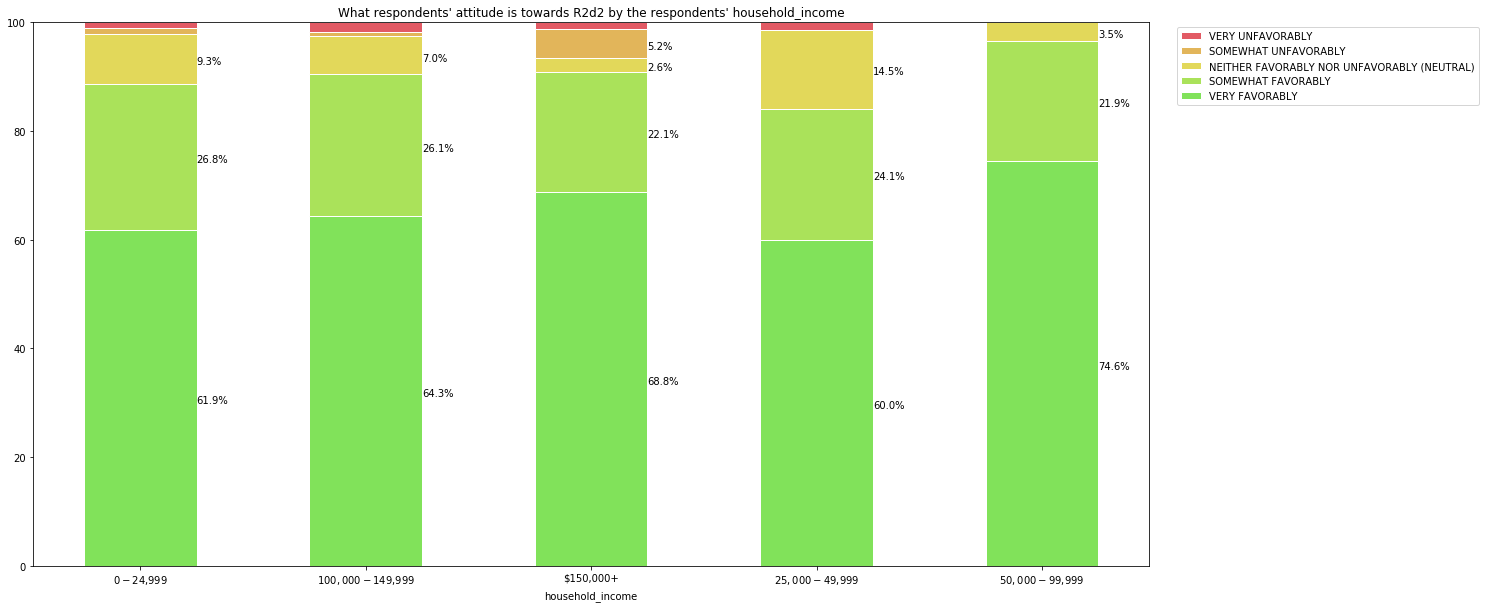

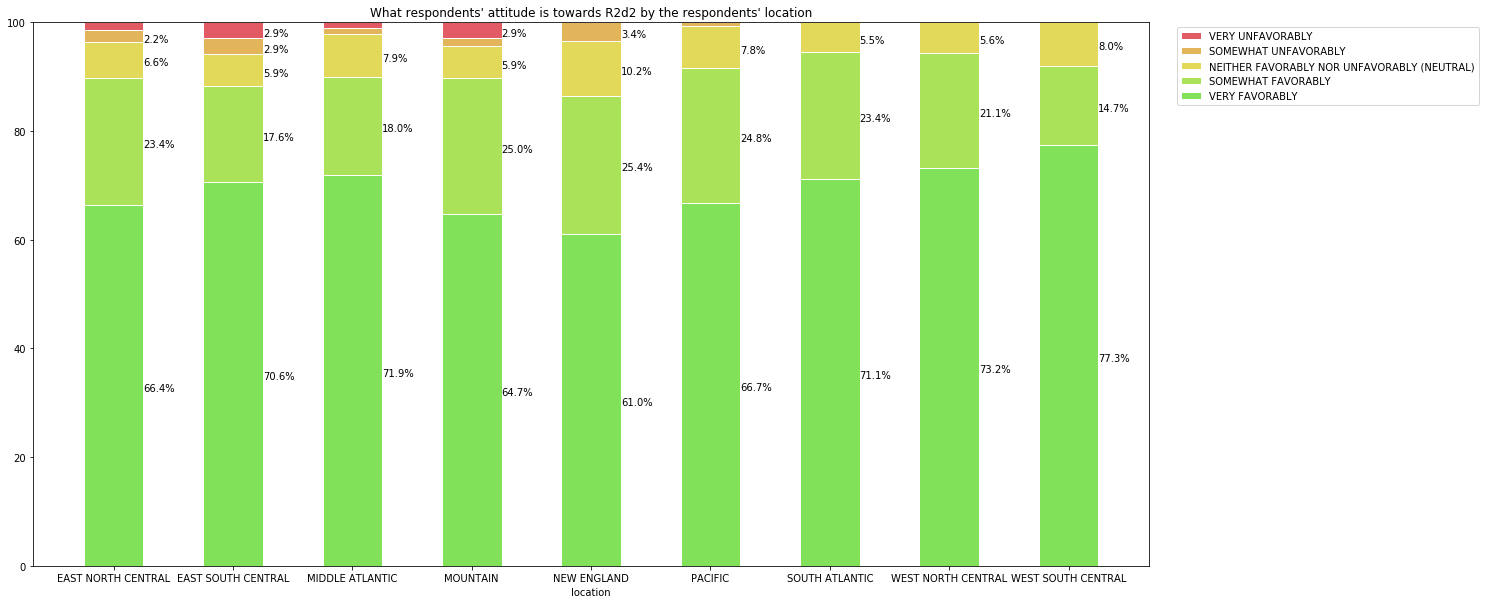

Affinity towards Jarjar


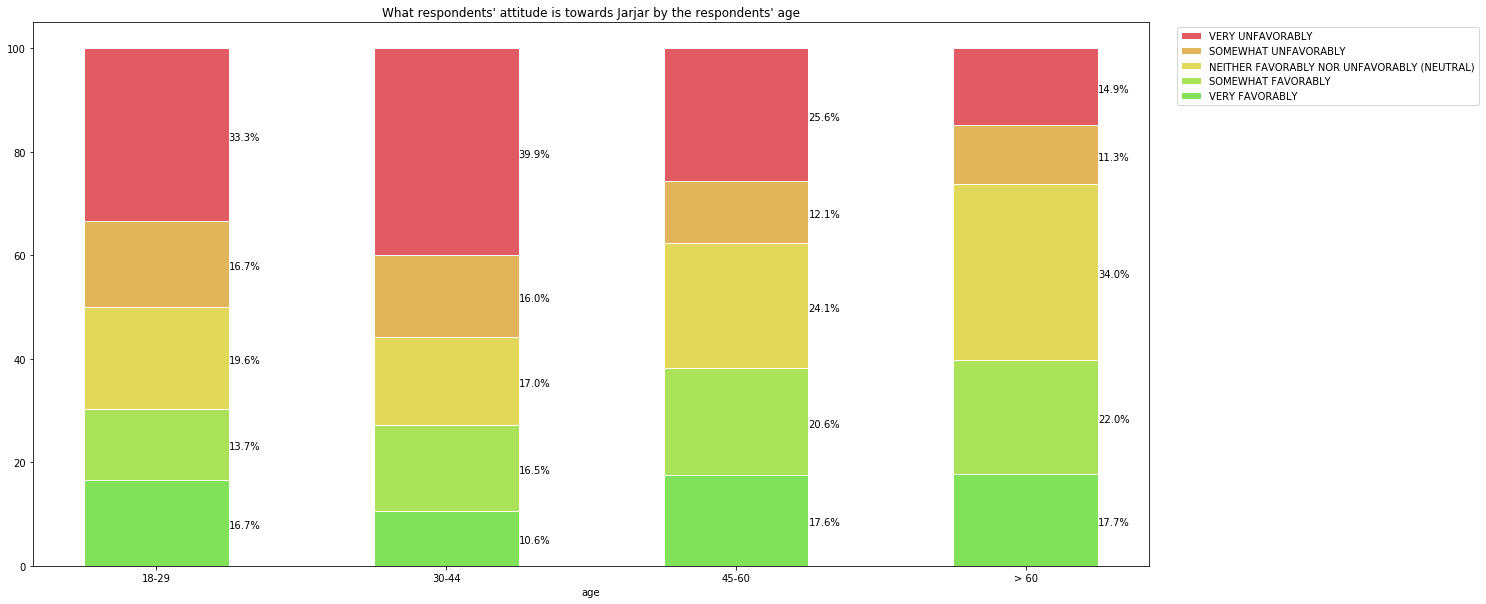

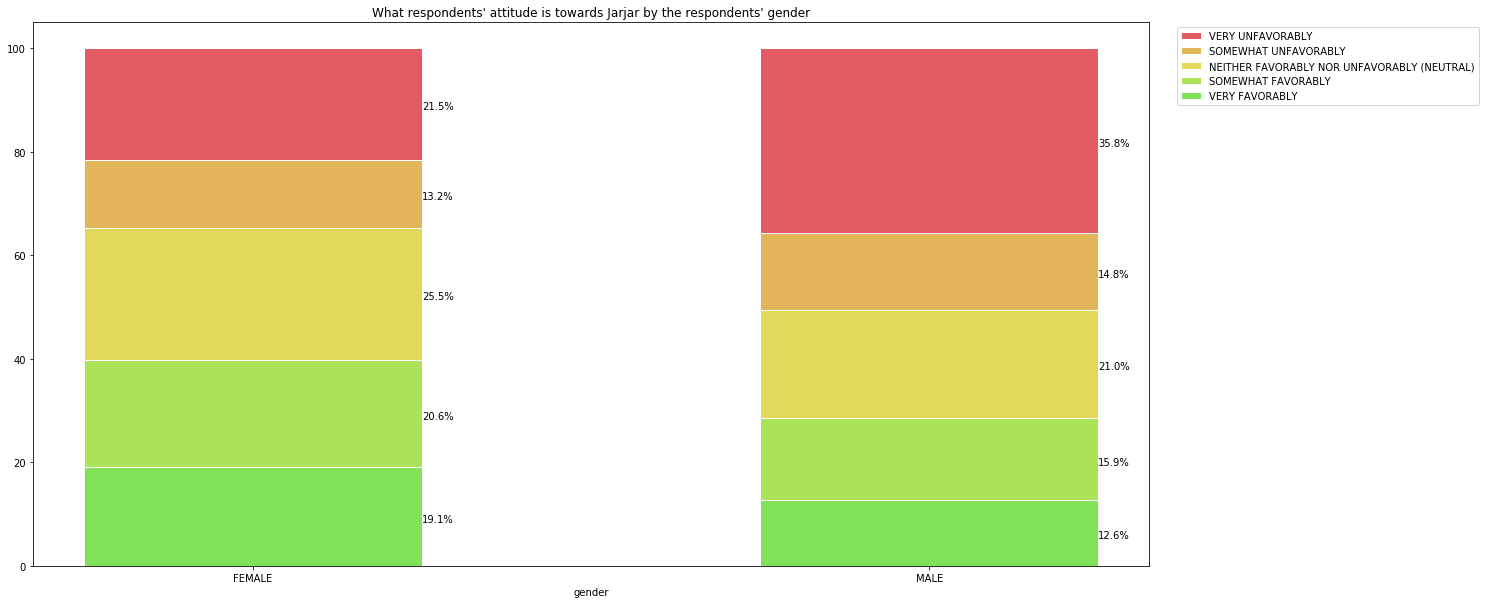

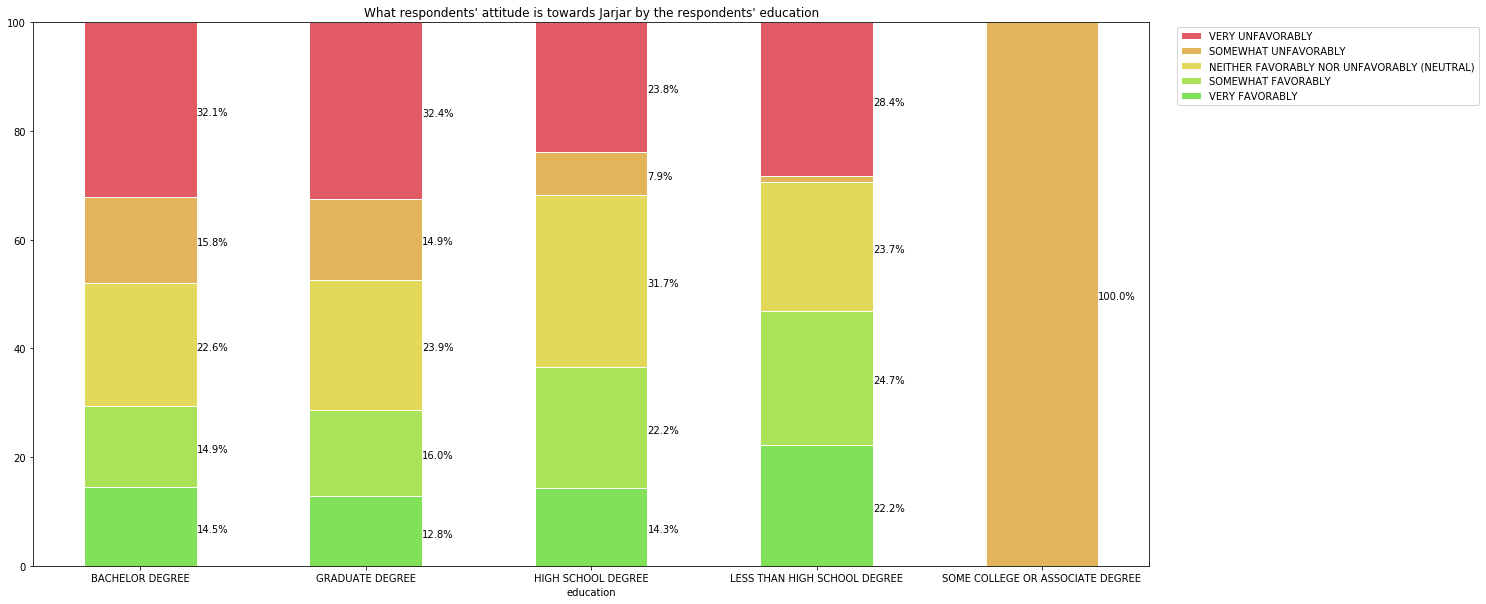

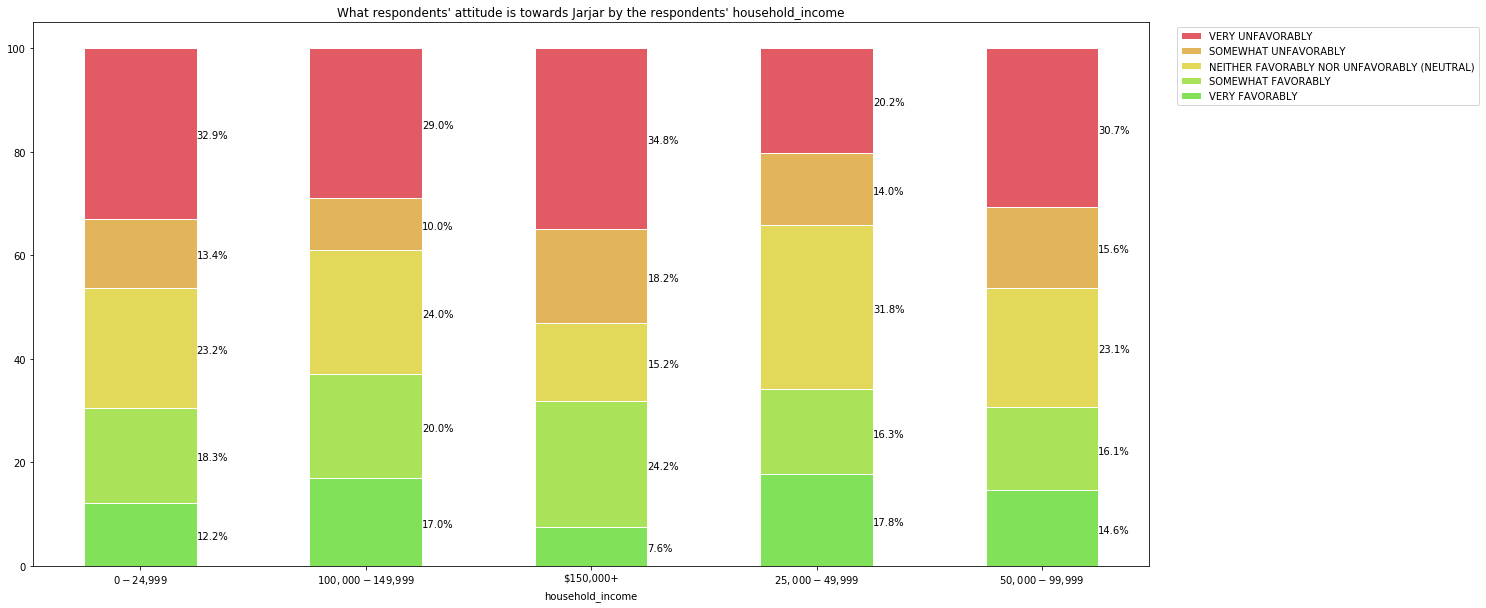

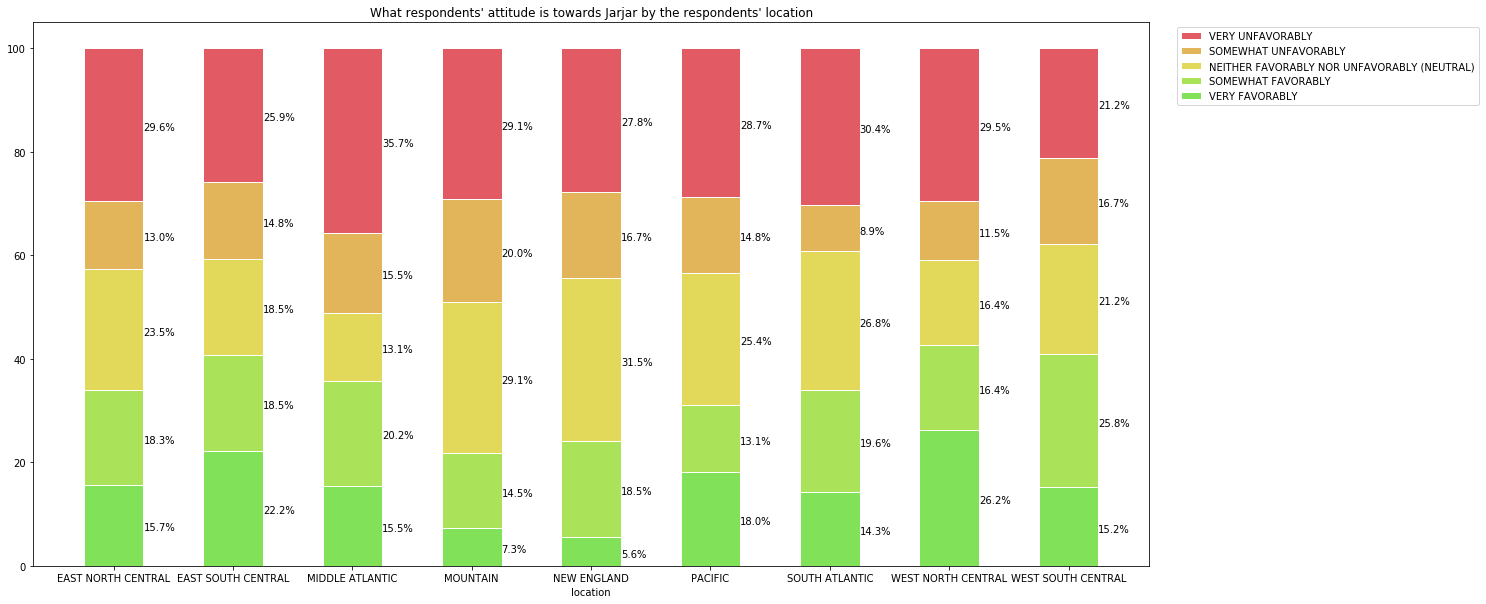

Affinity towards Padme


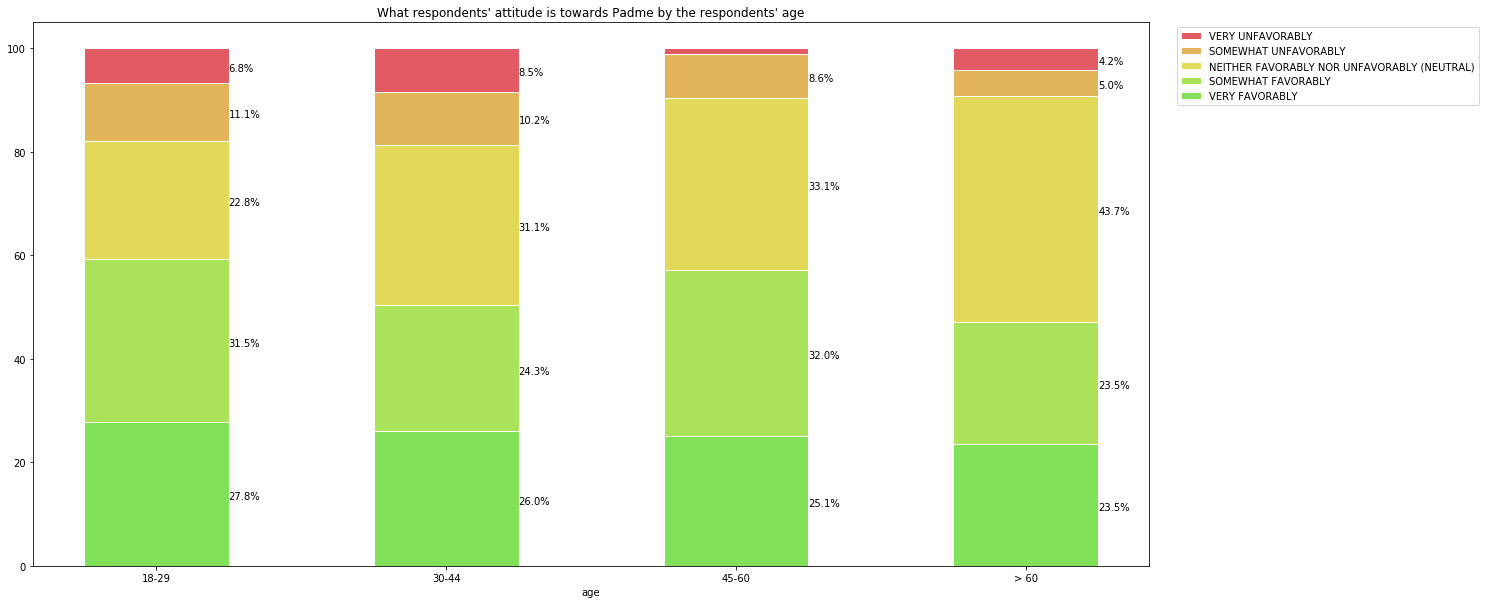

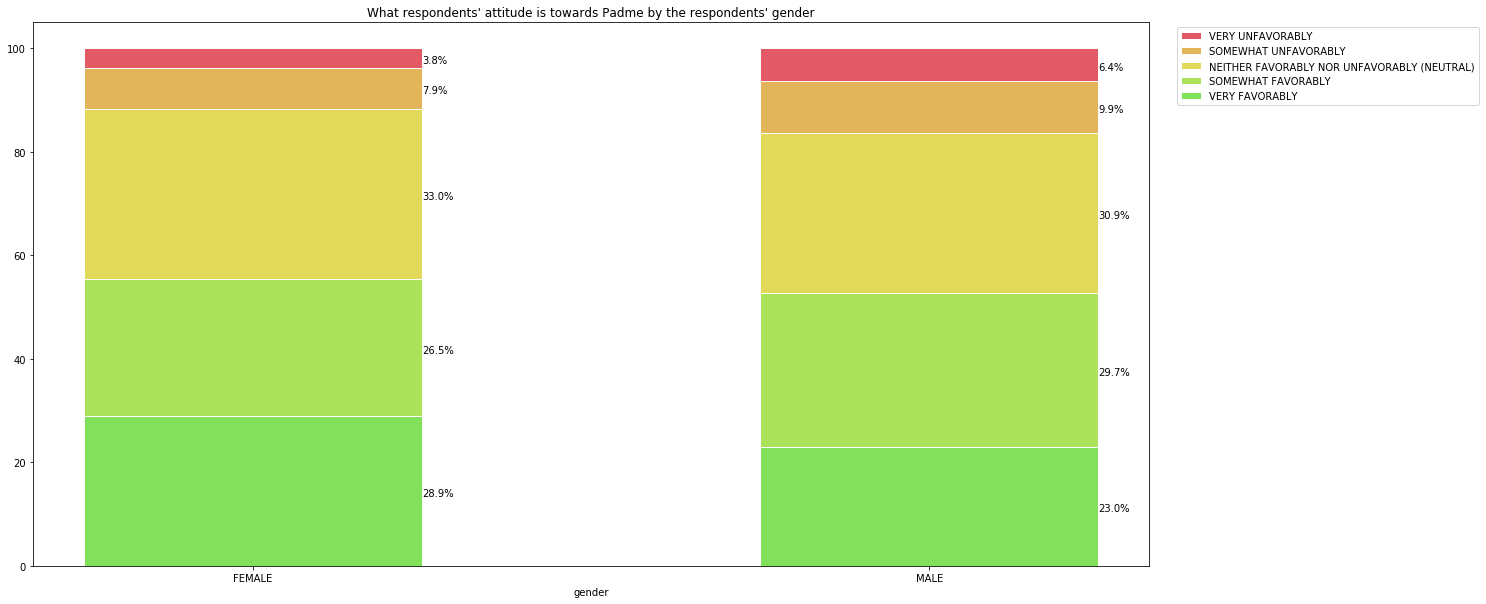

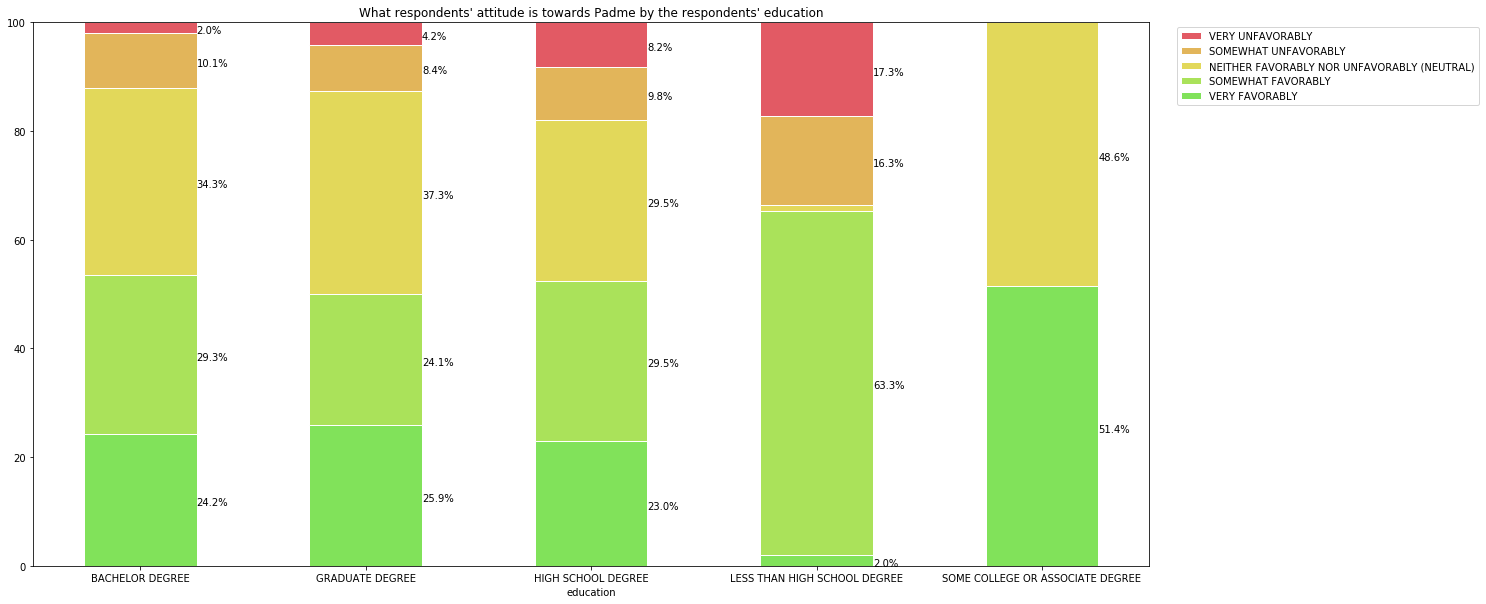

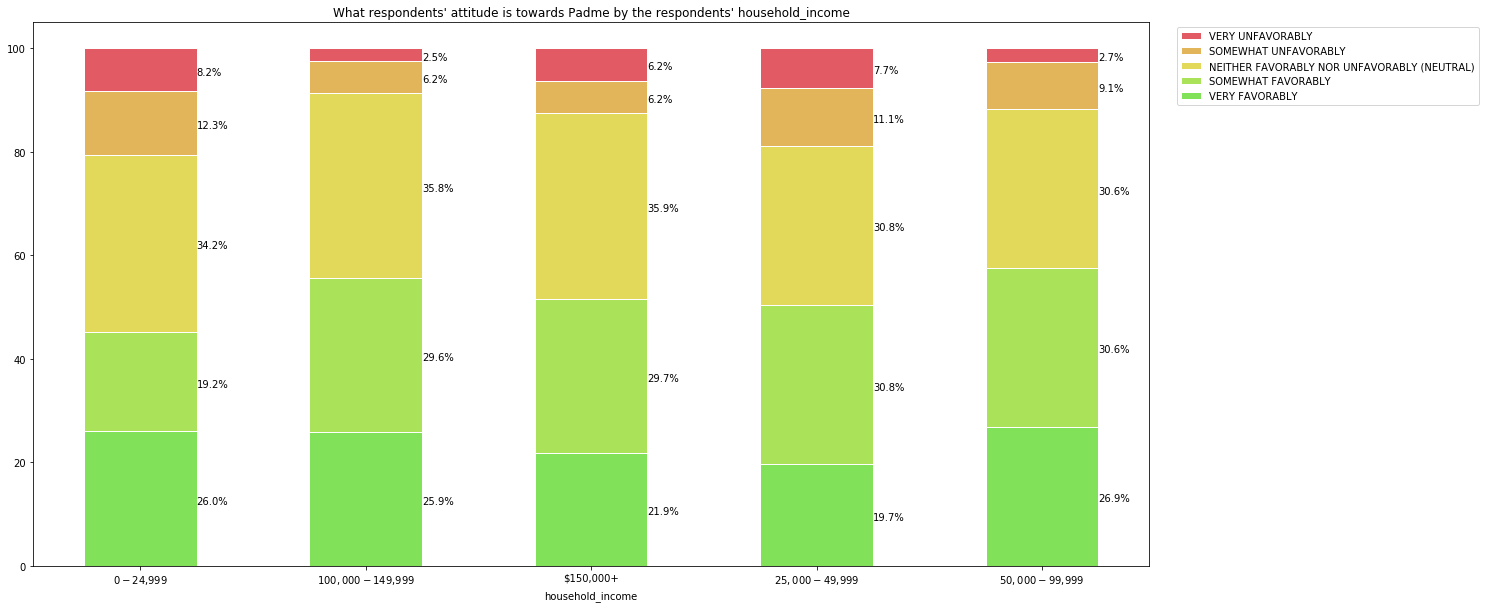

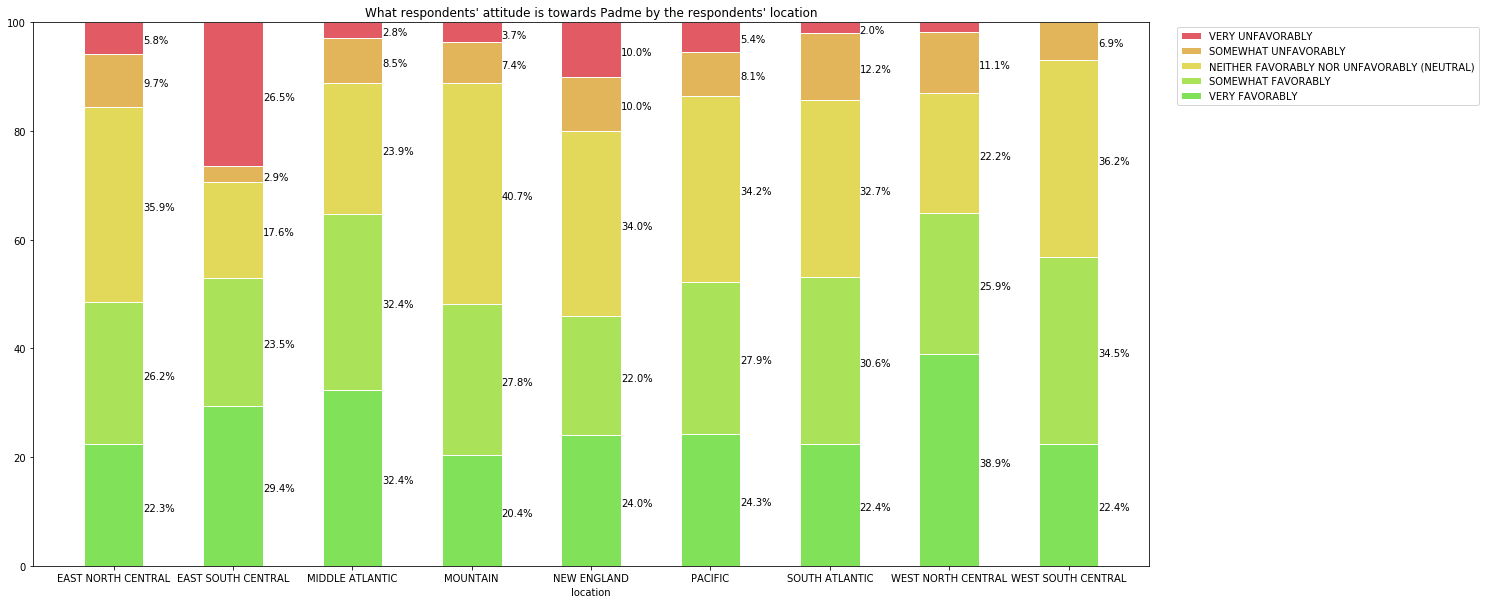

Affinity towards Yoda


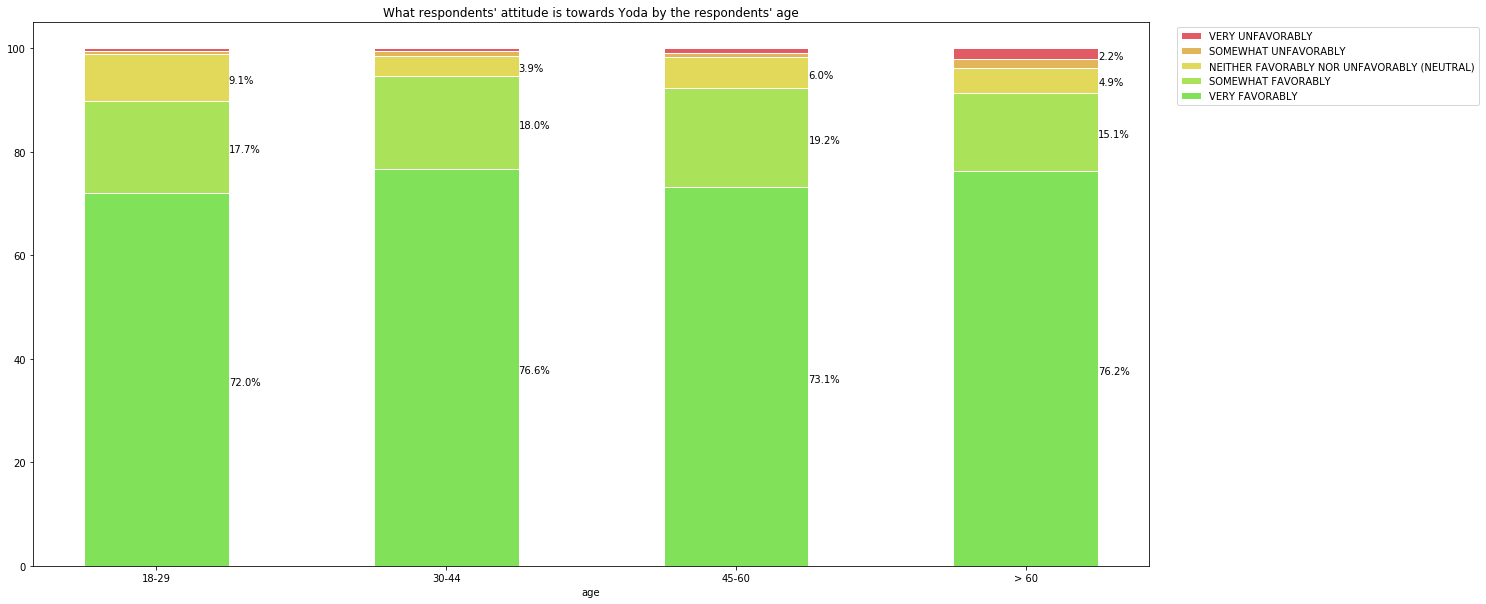

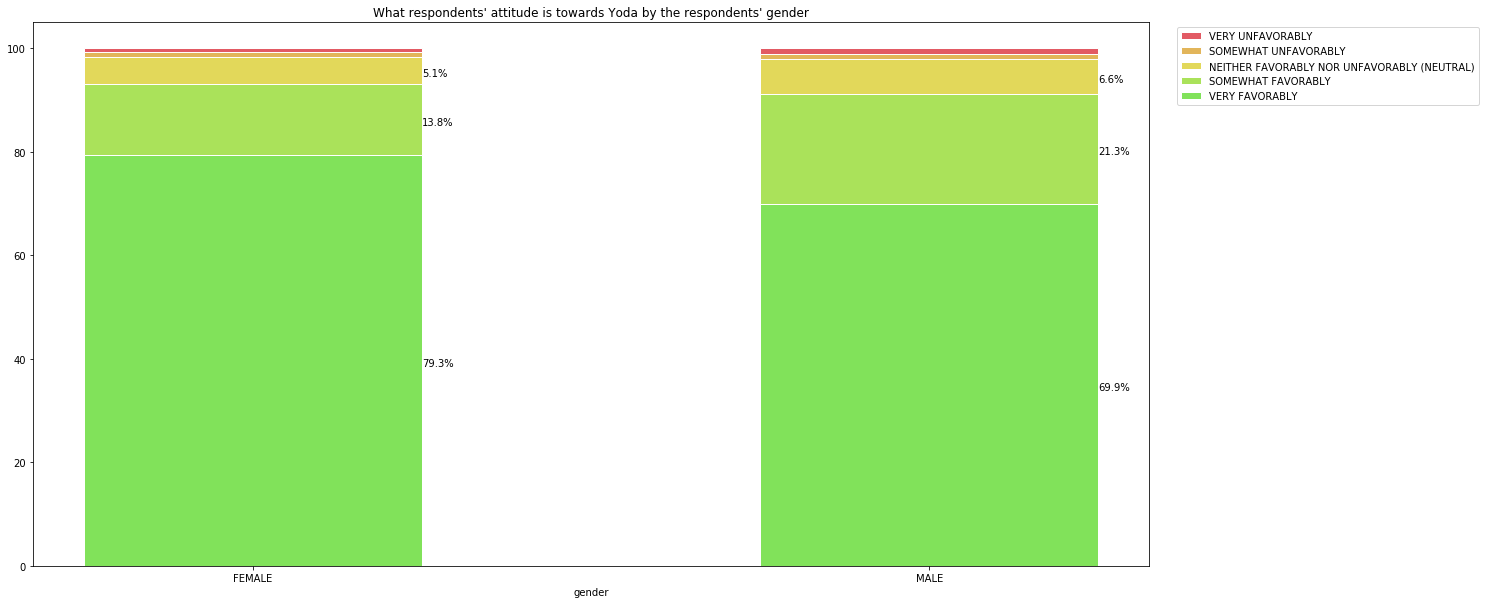

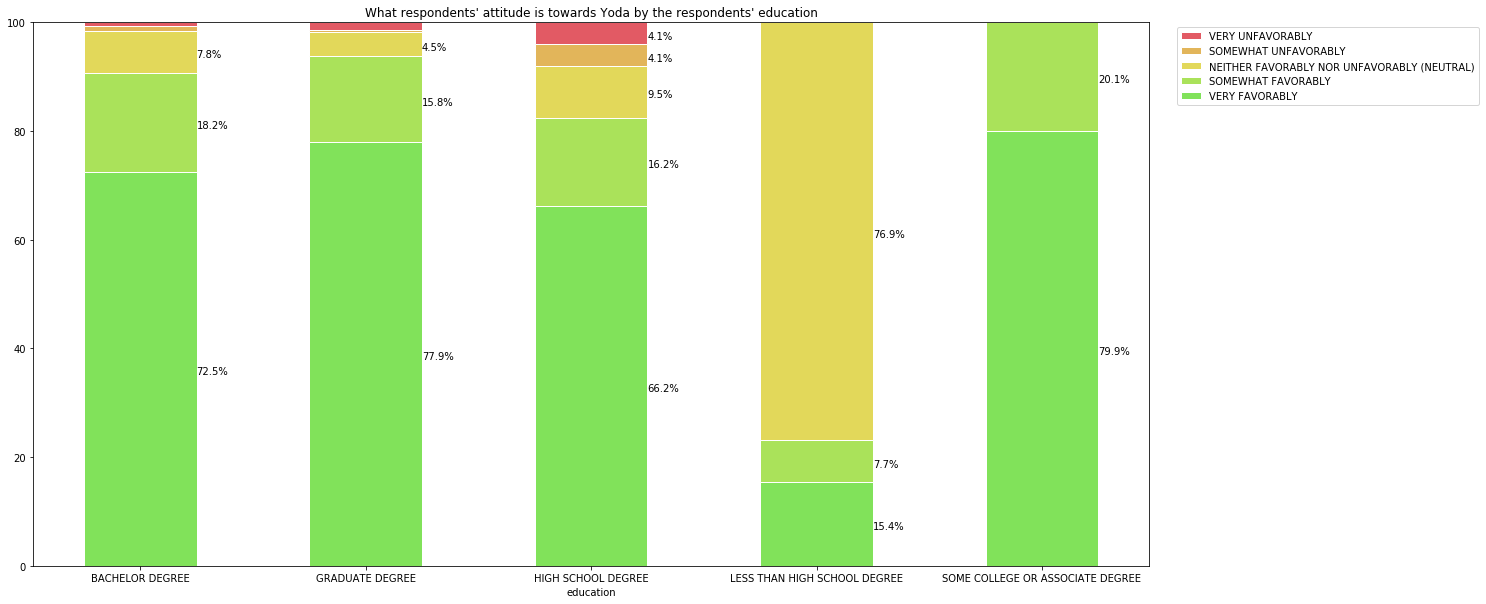

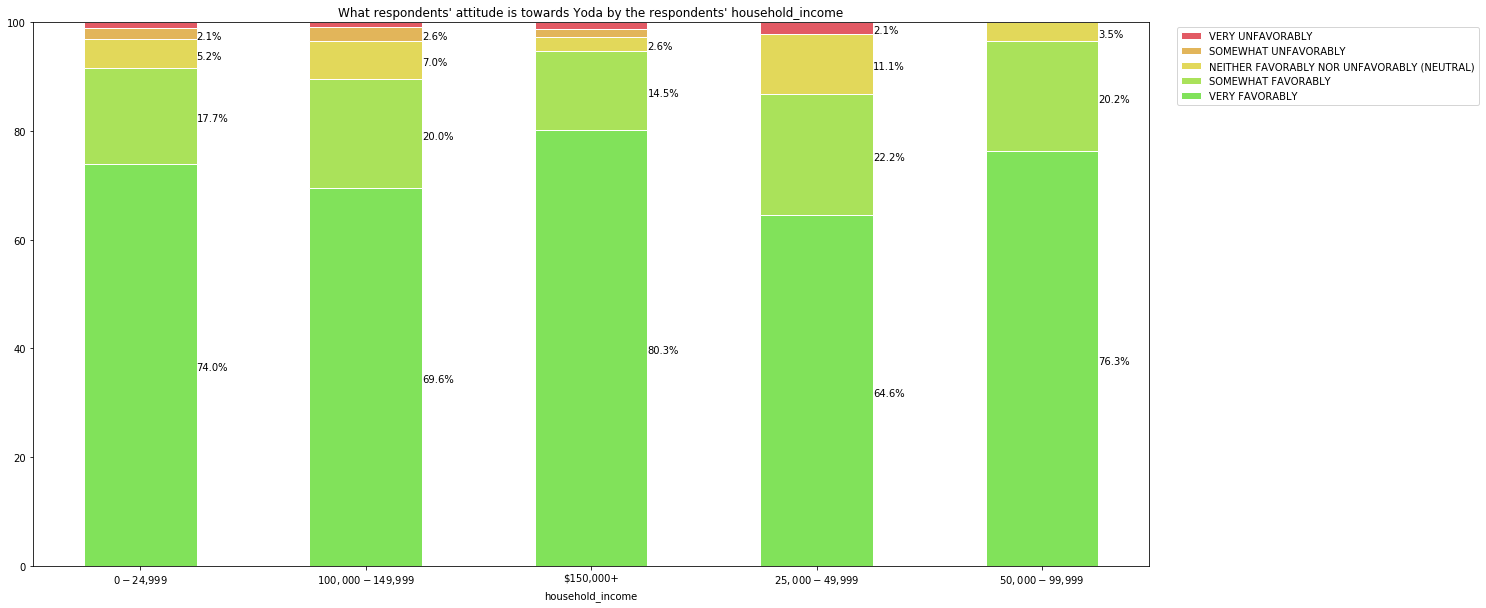

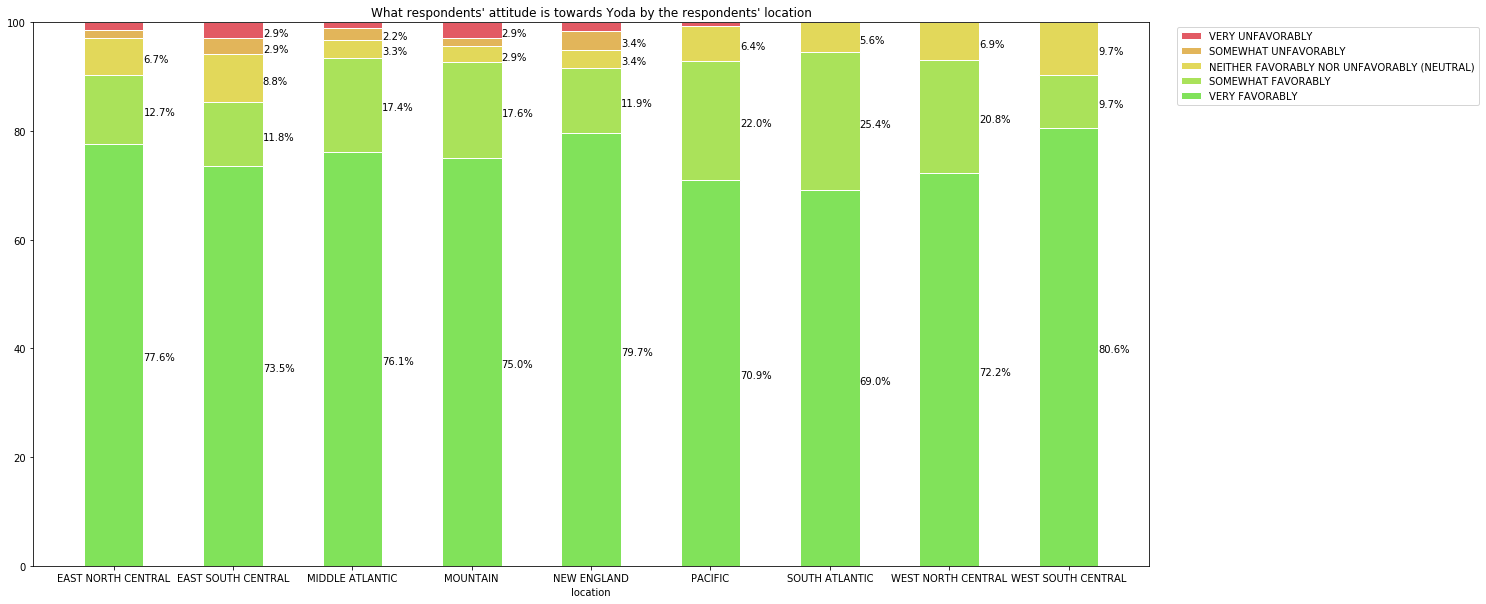

In [57]:
# For this task we loop through all characters, and within that loop we will loop through each demographic and plot a stacked percentage bar chart

affinity_columns = ['affinity_han','affinity_luke', 'affinity_leia', 'affinity_anakin', 'affinity_obiwan', 'affinity_palpatine', 'affinity_vader', 'affinity_lando','affinity_bobafett', 'affinity_c3p0', 'affinity_r2d2', 'affinity_jarjar', 'affinity_padme', 'affinity_yoda']
demographics = ['age', 'gender', 'education', 'household_income', 'location']


for affinity_column in affinity_columns:
    
    print("Affinity towards "+affinity_column.replace('affinity_', '').capitalize())
    
    for demographic in demographics:
        
        unique_segments = starwars[demographic].unique()
        
        # Removing the -1 from each the unique values of each demographic
        nan_index = np.argwhere(unique_segments==-1)
        unique_segments = np.delete(unique_segments, nan_index)
        unique_segments.sort()
        
        # Getting the value counts for every unique segment within this demographic that have affinity = 'VERY FAVORABLY', stored as an array
        very_favorably = list(starwars[demographic][starwars[demographic]!=-1][starwars[affinity_column]=='VERY FAVORABLY'].value_counts().sort_index()) 
        very_favorably = very_favorably + [0]*(len(unique_segments) - len(very_favorably))
        
        # Getting the value counts for every unique segment within this demographic that have affinity = 'SOMEHWAT FAVORABLY', stored as an array
        somewhat_favorably = list(starwars[demographic][starwars[demographic]!=-1][starwars[affinity_column]=='SOMEWHAT FAVORABLY'].value_counts().sort_index())
        somewhat_favorably = somewhat_favorably + [0]*(len(unique_segments) - len(somewhat_favorably))
        
        # Getting the value counts for every unique segment within this demographic that have affinity = 'NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)', stored as an array
        neither_favorably = list(starwars[demographic][starwars[demographic]!=-1][starwars[affinity_column]=='NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)'].value_counts().sort_index())
        neither_favorably = neither_favorably + [0]*(len(unique_segments) - len(neither_favorably))
        
        # Getting the value counts for every unique segment within this demographic that have affinity = 'SOMEWHAT UNFAVORABLY', stored as an array
        somewhat_unfavorably = list(starwars[demographic][starwars[demographic]!=-1][starwars[affinity_column]=='SOMEWHAT UNFAVORABLY'].value_counts().sort_index())
        somewhat_unfavorably = somewhat_unfavorably + [0]*(len(unique_segments) - len(somewhat_unfavorably))
        
        # Getting the value counts for every unique segment within this demographic that have affinity = 'VERY UNFAVORABLY', stored as an array
        very_unfavorably = list(starwars[demographic][starwars[demographic]!=-1][starwars[affinity_column]=='VERY UNFAVORABLY'].value_counts().sort_index())
        very_unfavorably = very_unfavorably + [0]*(len(unique_segments) - len(very_unfavorably))
        
        
        num_unique_segments = list(range(len(unique_segments)))
        affinity_data = {'very_favorably': very_favorably, 'somewhat_favorably': somewhat_favorably, 'neither_favorably': neither_favorably, 'somewhat_unfavorably': somewhat_unfavorably, 'very_unfavorably': very_unfavorably}
        
        temp_df = pd.DataFrame(affinity_data)
        
        totals = [i+j+k+l+m for i,j,k,l,m in zip(temp_df['very_favorably'], temp_df['somewhat_favorably'], temp_df['neither_favorably'], temp_df['somewhat_unfavorably'], temp_df['very_unfavorably'])]
        
        very_favorably_percentage = [i / j * 100 for i,j in zip(temp_df['very_favorably'], totals)]
        somewhat_favorably_percentage = [i / j * 100 for i,j in zip(temp_df['somewhat_favorably'], totals)]
        neither_favorably_percentage = [i / j * 100 for i,j in zip(temp_df['neither_favorably'], totals)]
        somewhat_unfavorably_percentage = [i / j * 100 for i,j in zip(temp_df['somewhat_unfavorably'], totals)]
        very_unfavorably_percentage = [i / j * 100 for i,j in zip(temp_df['very_unfavorably'], totals)]
        
        barWidth = 0.5
        
        plt.figure(figsize = (20,10))
        
        
        plt.bar(num_unique_segments, very_favorably_percentage, color=(0.505, 0.886, 0.352), edgecolor='white', width=barWidth, label = 'VERY FAVORABLY')

        plt.bar(num_unique_segments, somewhat_favorably_percentage, bottom=very_favorably_percentage, color=(0.666, 0.886, 0.352), edgecolor='white', width=barWidth, label ='SOMEWHAT FAVORABLY' )

        plt.bar(num_unique_segments, neither_favorably_percentage, bottom=[i+j for i,j in zip(very_favorably_percentage, somewhat_favorably_percentage)], color=(0.886, 0.847, 0.352), edgecolor='white', width=barWidth, label ='NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)')

        plt.bar(num_unique_segments, somewhat_unfavorably_percentage, bottom=[i+j+k for i,j,k in zip(very_favorably_percentage, somewhat_favorably_percentage, neither_favorably_percentage)], color=(0.886, 0.709, 0.352), edgecolor='white', width=barWidth, label ='SOMEWHAT UNFAVORABLY')

        plt.bar(num_unique_segments, very_unfavorably_percentage, bottom=[i+j+k+m for i,j,k,m in zip(very_favorably_percentage, somewhat_favorably_percentage, neither_favorably_percentage, somewhat_unfavorably_percentage)], color=(0.886, 0.352, 0.392), edgecolor='white', width=barWidth, label ='VERY UNFAVORABLY')
        
        
        current_handles, current_labels = plt.gca().get_legend_handles_labels()
        reversed_handles = list(reversed(current_handles))
        reversed_labels = list(reversed(current_labels))
        
        
        plt.legend(bbox_to_anchor=(1.3, 1.0), loc = 'upper right',  handles = reversed_handles,  labels =reversed_labels)
        
        plt.xticks(num_unique_segments, unique_segments)
        plt.xlabel(demographic)
        
        
        for index, value in enumerate(very_favorably_percentage):
            if(value>2):
                plt.text(index+0.25, (value/2) -1, str(round(value,1))+'%')
            
        for index, value in enumerate(somewhat_favorably_percentage):
            if(value>2):
                plt.text(index+0.25, (value/2)+very_favorably_percentage[index] -1, str(round(value,1))+'%')
        
        for index, value in enumerate(neither_favorably_percentage):
            if(value>2):
                plt.text(index+0.25, (value/2)+very_favorably_percentage[index]+somewhat_favorably_percentage[index] -1, str(round(value,1))+'%')
                
        for index, value in enumerate(somewhat_unfavorably_percentage):
            if(value>2):
                plt.text(index+0.25, (value/2)+very_favorably_percentage[index]+somewhat_favorably_percentage[index]+neither_favorably_percentage[index] -1, str(round(value,1))+'%')
        
        for index, value in enumerate(very_unfavorably_percentage):
            if(value>2):
                plt.text(index+0.25, (value/2)+very_favorably_percentage[index]+somewhat_favorably_percentage[index]+neither_favorably_percentage[index]+somewhat_unfavorably_percentage[index] -1, str(round(value,1))+'%')
        
        plt.title("What respondents' attitude is towards " + affinity_column.replace('affinity_', '').capitalize() + " by the respondents' "+demographic)
        plt.show()